In [1]:
import pandas as pd
pd.__version__

'1.1.5'

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

# Read Raw Matrix

https://github.com/ucsffrancislab/genomics/blob/master/data/20200603-TCGA-GBMLGG-WGS/20201029-hkle-chimera/create_count_matrix.bash

In [4]:
cm=pd.read_csv("count_matrix2.csv.gz")
cm.rename(columns={"subject": "sample"},inplace=True)

In [5]:
cm['subject']=cm['sample'].astype(str).str[0:7]

In [6]:
cm.shape

(274, 311)

In [7]:
cm.head()

sample  raw pair count  HERVK113 unpaired reads aligned  \
0  02-2483-01A       566024474                             5217   
1  02-2483-10A       579304076                             4735   
2  02-2485-01A       575060540                             5140   
3  02-2485-10A       478851061                             3895   
4  06-0125-01A      1066268796                             8464   

   HERVK113 unpaired human Q00 aligned  \
0                                 5099   
1                                 4646   
2                                 5047   
3                                 3849   
4                                 8384   

   uniq HERVK113 unpaired human Q00 aligned  \
0                                      2469   
1                                      2212   
2                                      2419   
3                                      1947   
4                                      3521   

   r10 uniq HERVK113 unpaired human Q00 aligned  \
0                                          2451   
1                                          2202   
2                                          2402   
3                                          1935   
4                                          3497   

   r100 uniq HERVK113 unpaired human Q00 aligned  \
0                                           2441   
1                                           2192   
2                                           2392   
3                                           1928   
4                                           3483   

   r1000 uniq HERVK113 unpaired human Q00 aligned  \
0                                            2420   
1                                            2175   
2                                            2374   
3                                            1914   
4                                            3450   

   r10000 uniq HERVK113 unpaired human Q00 aligned  \
0                                             2286   
1                                             2037   
2                                             2229   
3                                             1783   
4                                             3292   

   r100000 uniq HERVK113 unpaired human Q00 aligned  ...  \
0                                              2286  ...   
1                                              2037  ...   
2                                              2229  ...   
3                                              1783  ...   
4                                              3292  ...   

   r10000 uniq SVA_F paired human Q10 aligned  \
0                                        1187   
1                                        1090   
2                                        1184   
3                                        1108   
4                                        1810   

   r100000 uniq SVA_F paired human Q10 aligned  \
0                                         1187   
1                                         1090   
2                                         1184   
3                                         1108   
4                                         1810   

   SVA_F paired human Q20 aligned  uniq SVA_F paired human Q20 aligned  \
0                            2170                                 1474   
1                            1878                                 1321   
2                            2217                                 1443   
3                            1860                                 1325   
4                            5507                                 2700   

   r10 uniq SVA_F paired human Q20 aligned  \
0                                     1359   
1                                     1222   
2                                     1326   
3                                     1231   
4                                     2293   

   r100 uniq SVA_F paired human Q20 aligned  \
0                                      1303   
1                               

# Really only interested in the paired / Q20 data so dump the rest

In [8]:
cm = cm[cm.columns.drop(list(cm.filter(regex='unpaired')))]
cm = cm[cm.columns.drop(list(cm.filter(regex='Q00')))]
cm = cm[cm.columns.drop(list(cm.filter(regex='Q10')))]

In [9]:
list(cm)

['sample',
 'raw pair count',
 'HERVK113 paired reads aligned',
 'HERVK113 paired human Q20 aligned',
 'uniq HERVK113 paired human Q20 aligned',
 'r10 uniq HERVK113 paired human Q20 aligned',
 'r100 uniq HERVK113 paired human Q20 aligned',
 'r1000 uniq HERVK113 paired human Q20 aligned',
 'r10000 uniq HERVK113 paired human Q20 aligned',
 'r100000 uniq HERVK113 paired human Q20 aligned',
 'SVA_A paired reads aligned',
 'SVA_A paired human Q20 aligned',
 'uniq SVA_A paired human Q20 aligned',
 'r10 uniq SVA_A paired human Q20 aligned',
 'r100 uniq SVA_A paired human Q20 aligned',
 'r1000 uniq SVA_A paired human Q20 aligned',
 'r10000 uniq SVA_A paired human Q20 aligned',
 'r100000 uniq SVA_A paired human Q20 aligned',
 'SVA_B paired reads aligned',
 'SVA_B paired human Q20 aligned',
 'uniq SVA_B paired human Q20 aligned',
 'r10 uniq SVA_B paired human Q20 aligned',
 'r100 uniq SVA_B paired human Q20 aligned',
 'r1000 uniq SVA_B paired human Q20 aligned',
 'r10000 uniq SVA_B paired human 

In [10]:
cm[['subject','sample']].head()

subject       sample
0  02-2483  02-2483-01A
1  02-2483  02-2483-10A
2  02-2485  02-2485-01A
3  02-2485  02-2485-10A
4  06-0125  06-0125-01A

# Note that this subject only has a normal sample?

In [11]:
cm[cm['subject']=='CS-5390']

sample  raw pair count  HERVK113 paired reads aligned  \
84  CS-5390-10A       529225224                           2814   

    HERVK113 paired human Q20 aligned  uniq HERVK113 paired human Q20 aligned  \
84                               1161                                     580   

    r10 uniq HERVK113 paired human Q20 aligned  \
84                                         568   

    r100 uniq HERVK113 paired human Q20 aligned  \
84                                          559   

    r1000 uniq HERVK113 paired human Q20 aligned  \
84                                           553   

    r10000 uniq HERVK113 paired human Q20 aligned  \
84                                            459   

    r100000 uniq HERVK113 paired human Q20 aligned  ...  \
84                                             459  ...   

    r100000 uniq SVA_E paired human Q20 aligned  SVA_F paired reads aligned  \
84                                         1420                        4288   

    SVA_F paired human Q20 aligned  uniq SVA_F paired human Q20 aligned  \
84                            1290                                  958   

    r10 uniq SVA_F paired human Q20 aligned  \
84                                      921   

    r100 uniq SVA_F paired human Q20 aligned  \
84                                       901   

    r1000 uniq SVA_F paired human Q20 aligned  \
84                                        894   

    r10000 uniq SVA_F paired human Q20 aligned  \
84                                         835   

    r100000 uniq SVA_F paired human Q20 aligned  subject  
84                                          835  CS-5390  

[1 rows x 59 columns]

In [12]:
cm.shape

(274, 59)

In [13]:
cm=cm[(cm['sample'].str.contains("-01.$") | cm['sample'].str.contains("-10.$") )]

In [14]:
cm.shape

(246, 59)

In [15]:
cm[cm['subject']=='CS-5390']

sample  raw pair count  HERVK113 paired reads aligned  \
84  CS-5390-10A       529225224                           2814   

    HERVK113 paired human Q20 aligned  uniq HERVK113 paired human Q20 aligned  \
84                               1161                                     580   

    r10 uniq HERVK113 paired human Q20 aligned  \
84                                         568   

    r100 uniq HERVK113 paired human Q20 aligned  \
84                                          559   

    r1000 uniq HERVK113 paired human Q20 aligned  \
84                                           553   

    r10000 uniq HERVK113 paired human Q20 aligned  \
84                                            459   

    r100000 uniq HERVK113 paired human Q20 aligned  ...  \
84                                             459  ...   

    r100000 uniq SVA_E paired human Q20 aligned  SVA_F paired reads aligned  \
84                                         1420                        4288   

    SVA_F paired human Q20 aligned  uniq SVA_F paired human Q20 aligned  \
84                            1290                                  958   

    r10 uniq SVA_F paired human Q20 aligned  \
84                                      921   

    r100 uniq SVA_F paired human Q20 aligned  \
84                                       901   

    r1000 uniq SVA_F paired human Q20 aligned  \
84                                        894   

    r10000 uniq SVA_F paired human Q20 aligned  \
84                                         835   

    r100000 uniq SVA_F paired human Q20 aligned  subject  
84                                          835  CS-5390  

[1 rows x 59 columns]

In [16]:
cm[cm['subject']=='FG-5963']

sample  raw pair count  HERVK113 paired reads aligned  \
194  FG-5963-01A       214570635                            186   

     HERVK113 paired human Q20 aligned  \
194                                 75   

     uniq HERVK113 paired human Q20 aligned  \
194                                      68   

     r10 uniq HERVK113 paired human Q20 aligned  \
194                                          68   

     r100 uniq HERVK113 paired human Q20 aligned  \
194                                           68   

     r1000 uniq HERVK113 paired human Q20 aligned  \
194                                            68   

     r10000 uniq HERVK113 paired human Q20 aligned  \
194                                             68   

     r100000 uniq HERVK113 paired human Q20 aligned  ...  \
194                                              68  ...   

     r100000 uniq SVA_E paired human Q20 aligned  SVA_F paired reads aligned  \
194                                          193                         312   

     SVA_F paired human Q20 aligned  uniq SVA_F paired human Q20 aligned  \
194                              79                                   76   

     r10 uniq SVA_F paired human Q20 aligned  \
194                                       76   

     r100 uniq SVA_F paired human Q20 aligned  \
194                                        75   

     r1000 uniq SVA_F paired human Q20 aligned  \
194                                         75   

     r10000 uniq SVA_F paired human Q20 aligned  \
194                                          74   

     r100000 uniq SVA_F paired human Q20 aligned  subject  
194                                           74  FG-5963  

[1 rows x 59 columns]

# Get rid of these 2 isolated samples

In [17]:
cm=cm[((cm['subject']!='CS-5390') & (cm['subject']!='FG-5963'))]

In [18]:
cm.shape

(244, 59)

In [19]:
cm[cm['subject']=='CS-5390']

Empty DataFrame
Columns: [sample, raw pair count, HERVK113 paired reads aligned, HERVK113 paired human Q20 aligned, uniq HERVK113 paired human Q20 aligned, r10 uniq HERVK113 paired human Q20 aligned, r100 uniq HERVK113 paired human Q20 aligned, r1000 uniq HERVK113 paired human Q20 aligned, r10000 uniq HERVK113 paired human Q20 aligned, r100000 uniq HERVK113 paired human Q20 aligned, SVA_A paired reads aligned, SVA_A paired human Q20 aligned, uniq SVA_A paired human Q20 aligned, r10 uniq SVA_A paired human Q20 aligned, r100 uniq SVA_A paired human Q20 aligned, r1000 uniq SVA_A paired human Q20 aligned, r10000 uniq SVA_A paired human Q20 aligned, r100000 uniq SVA_A paired human Q20 aligned, SVA_B paired reads aligned, SVA_B paired human Q20 aligned, uniq SVA_B paired human Q20 aligned, r10 uniq SVA_B paired human Q20 aligned, r100 uniq SVA_B paired human Q20 aligned, r1000 uniq SVA_B paired human Q20 aligned, r10000 uniq SVA_B paired human Q20 aligned, r100000 uniq SVA_B paired human Q20 aligned, SVA_C paired reads aligned, SVA_C paired human Q20 aligned, uniq SVA_C paired human Q20 aligned, r10 uniq SVA_C paired human Q20 aligned, r100 uniq SVA_C paired human Q20 aligned, r1000 uniq SVA_C paired human Q20 aligned, r10000 uniq SVA_C paired human Q20 aligned, r100000 uniq SVA_C paired human Q20 aligned, SVA_D paired reads aligned, SVA_D paired human Q20 aligned, uniq SVA_D paired human Q20 aligned, r10 uniq SVA_D paired human Q20 aligned, r100 uniq SVA_D paired human Q20 aligned, r1000 uniq SVA_D paired human Q20 aligned, r10000 uniq SVA_D paired human Q20 aligned, r100000 uniq SVA_D paired human Q20 aligned, SVA_E paired reads aligned, SVA_E paired human Q20 aligned, uniq SVA_E paired human Q20 aligned, r10 uniq SVA_E paired human Q20 aligned, r100 uniq SVA_E paired human Q20 aligned, r1000 uniq SVA_E paired human Q20 aligned, r10000 uniq SVA_E paired human Q20 aligned, r100000 uniq SVA_E paired human Q20 aligned, SVA_F paired reads aligned, SVA_F paired human Q20 aligned, uniq SVA_F paired human Q20 aligned, r10 uniq SVA_F paired human Q20 aligned, r100 uniq SVA_F paired human Q20 aligned, r1000 uniq SVA_F paired human Q20 aligned, r10000 uniq SVA_F paired human Q20 aligned, r100000 uniq SVA_F paired human Q20 aligned, subject]
Index: []

[0 rows x 59 columns]

In [20]:
cm[cm['subject']=='FG-5963']

Empty DataFrame
Columns: [sample, raw pair count, HERVK113 paired reads aligned, HERVK113 paired human Q20 aligned, uniq HERVK113 paired human Q20 aligned, r10 uniq HERVK113 paired human Q20 aligned, r100 uniq HERVK113 paired human Q20 aligned, r1000 uniq HERVK113 paired human Q20 aligned, r10000 uniq HERVK113 paired human Q20 aligned, r100000 uniq HERVK113 paired human Q20 aligned, SVA_A paired reads aligned, SVA_A paired human Q20 aligned, uniq SVA_A paired human Q20 aligned, r10 uniq SVA_A paired human Q20 aligned, r100 uniq SVA_A paired human Q20 aligned, r1000 uniq SVA_A paired human Q20 aligned, r10000 uniq SVA_A paired human Q20 aligned, r100000 uniq SVA_A paired human Q20 aligned, SVA_B paired reads aligned, SVA_B paired human Q20 aligned, uniq SVA_B paired human Q20 aligned, r10 uniq SVA_B paired human Q20 aligned, r100 uniq SVA_B paired human Q20 aligned, r1000 uniq SVA_B paired human Q20 aligned, r10000 uniq SVA_B paired human Q20 aligned, r100000 uniq SVA_B paired human Q20 aligned, SVA_C paired reads aligned, SVA_C paired human Q20 aligned, uniq SVA_C paired human Q20 aligned, r10 uniq SVA_C paired human Q20 aligned, r100 uniq SVA_C paired human Q20 aligned, r1000 uniq SVA_C paired human Q20 aligned, r10000 uniq SVA_C paired human Q20 aligned, r100000 uniq SVA_C paired human Q20 aligned, SVA_D paired reads aligned, SVA_D paired human Q20 aligned, uniq SVA_D paired human Q20 aligned, r10 uniq SVA_D paired human Q20 aligned, r100 uniq SVA_D paired human Q20 aligned, r1000 uniq SVA_D paired human Q20 aligned, r10000 uniq SVA_D paired human Q20 aligned, r100000 uniq SVA_D paired human Q20 aligned, SVA_E paired reads aligned, SVA_E paired human Q20 aligned, uniq SVA_E paired human Q20 aligned, r10 uniq SVA_E paired human Q20 aligned, r100 uniq SVA_E paired human Q20 aligned, r1000 uniq SVA_E paired human Q20 aligned, r10000 uniq SVA_E paired human Q20 aligned, r100000 uniq SVA_E paired human Q20 aligned, SVA_F paired reads aligned, SVA_F paired human Q20 aligned, uniq SVA_F paired human Q20 aligned, r10 uniq SVA_F paired human Q20 aligned, r100 uniq SVA_F paired human Q20 aligned, r1000 uniq SVA_F paired human Q20 aligned, r10000 uniq SVA_F paired human Q20 aligned, r100000 uniq SVA_F paired human Q20 aligned, subject]
Index: []

[0 rows x 59 columns]

# Read Metadata

In [21]:
mt=pd.read_csv("metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['submitter','days_to_death','gender','disease_type','center_name'])

In [22]:
mt.shape

(127, 5)

In [23]:
mt.head()

submitter  days_to_death  gender             disease_type  \
0   02-2483            NaN    male  Glioblastoma Multiforme   
1   02-2485            NaN    male  Glioblastoma Multiforme   
2   06-0125         1448.0  female  Glioblastoma Multiforme   
3   06-0152          375.0    male  Glioblastoma Multiforme   
4   06-0157           97.0  female  Glioblastoma Multiforme   

                          center_name  
0  Broad Institute of MIT and Harvard  
1  Broad Institute of MIT and Harvard  
2  Broad Institute of MIT and Harvard  
3  Broad Institute of MIT and Harvard  
4  Broad Institute of MIT and Harvard

In [24]:
list(mt)

['submitter', 'days_to_death', 'gender', 'disease_type', 'center_name']

In [25]:
for m in list(mt):
    print(m)
    print(mt[m].value_counts())
    print()

submitter
DU-5872    2
CS-6186    2
DU-7018    1
DU-6399    1
CS-5390    1
          ..
06-0211    1
HT-7602    1
HT-7476    1
IK-7675    1
DU-5852    1
Name: submitter, Length: 125, dtype: int64

days_to_death
538.0     2
543.0     1
639.0     1
234.0     1
460.0     1
         ..
4068.0    1
354.0     1
214.0     1
2660.0    1
1448.0    1
Name: days_to_death, Length: 66, dtype: int64

gender
male      73
female    54
Name: gender, dtype: int64

disease_type
Brain Lower Grade Glioma    92
Glioblastoma Multiforme     35
Name: disease_type, dtype: int64

center_name
Broad Institute of MIT and Harvard    75
Harvard Medical School                52
Name: center_name, dtype: int64



# Read Metadata 2

In [26]:
mt2=pd.read_csv("TCGA.Glioma.metadata.tsv",sep="\t")

In [27]:
mt2.shape

(1114, 18)

In [28]:
mt2.head()

case_submitter_id project_id primary_diagnosis   race  \
0      TCGA-02-0001   TCGA-GBM      Glioblastoma  white   
1      TCGA-02-0003   TCGA-GBM      Glioblastoma  white   
2      TCGA-02-0004   TCGA-GBM      Glioblastoma  white   
3      TCGA-02-0006   TCGA-GBM      Glioblastoma  white   
4      TCGA-02-0007   TCGA-GBM      Glioblastoma  white   

                ethnicity  gender RE_names IDH     x1p19q TERT  \
0  not hispanic or latino  female      NaN  WT  non-codel  NaN   
1  not hispanic or latino    male      NaN  WT  non-codel  NaN   
2  not hispanic or latino    male      NaN  WT        NaN  NaN   
3  not hispanic or latino  female      NaN  WT  non-codel  NaN   
4  not hispanic or latino  female      NaN  WT  non-codel  NaN   

         IDH_1p19q_status                           WHO_groups  \
0  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
1  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
2         IDH-WT:1p19q-NA                                  NaN   
3  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
4  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   

                     Triple_group     Tissue_sample_location          MGMT  \
0  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
1  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
2         IDH-WT:1p19q-NA:TERT-NA  MD Anderson Cancer Center           NaN   
3  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
4  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   

    Age  Survival_months  Vital_status  
0  44.0        11.762054           1.0  
1  50.0         4.731106           1.0  
2  59.0        11.334941           1.0  
3  56.0        18.333034           1.0  
4  40.0        23.162705           1.0

In [29]:
mt2['primary_diagnosis'].unique()

array(['Glioblastoma', 'Astrocytoma, NOS', 'Astrocytoma, anaplastic',
       'Oligodendroglioma, NOS', 'Mixed glioma',
       'Oligodendroglioma, anaplastic'], dtype=object)

In [30]:
mt2['subject2']=mt2['case_submitter_id'].astype(str).str[5:12]

In [31]:
mt2[['subject2','case_submitter_id']].head()

subject2 case_submitter_id
0  02-0001      TCGA-02-0001
1  02-0003      TCGA-02-0003
2  02-0004      TCGA-02-0004
3  02-0006      TCGA-02-0006
4  02-0007      TCGA-02-0007

In [32]:
list(mt2)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject2']

In [33]:
#for m in list(mt2):
for m in 'primary_diagnosis','race','ethnicity','IDH','x1p19q','TERT','Tissue_sample_location','MGMT','WHO_groups','Triple_group':
    print(m)
    print(mt2[m].value_counts())
    print()

primary_diagnosis
Glioblastoma                     599
Mixed glioma                     131
Astrocytoma, anaplastic          130
Oligodendroglioma, NOS           112
Oligodendroglioma, anaplastic     78
Astrocytoma, NOS                  64
Name: primary_diagnosis, dtype: int64

race
white                               982
black or african american            72
not reported                         38
asian                                21
american indian or alaska native      1
Name: race, dtype: int64

ethnicity
not hispanic or latino    939
not reported              130
hispanic or latino         45
Name: ethnicity, dtype: int64

IDH
WT        535
Mutant    456
Name: IDH, dtype: int64

x1p19q
non-codel    917
codel        171
Name: x1p19q, dtype: int64

TERT
WT        167
Mutant    162
Name: TERT, dtype: int64

Tissue_sample_location
Henry Ford Hospital                                               242
Case Western - St Joes                                            104
MD Anderson

In [34]:
#mt2.loc[mt2['TERT'].isna(), 'TERT'] = 'NAN' 
#mt2.loc[mt2['IDH'].isna(), 'IDH'] = 'NAN' 
#mt2.loc[mt2['x1p19q'].isna(), 'x1p19q'] = 'NAN' 

# Merge Metadata

In [35]:
meta=mt2.merge(mt,left_on='subject2',right_on='submitter',suffixes=["_mt2","_mt"],how='inner')

In [36]:
meta.head()

case_submitter_id project_id primary_diagnosis                       race  \
0      TCGA-02-2483   TCGA-GBM      Glioblastoma                      asian   
1      TCGA-02-2485   TCGA-GBM      Glioblastoma  black or african american   
2      TCGA-06-0125   TCGA-GBM      Glioblastoma                      white   
3      TCGA-06-0152   TCGA-GBM      Glioblastoma                      white   
4      TCGA-06-0157   TCGA-GBM      Glioblastoma                      white   

                ethnicity gender_mt2                   RE_names     IDH  \
0  not hispanic or latino       male  02-2483-01A-01R-1849-01+1  Mutant   
1  not hispanic or latino       male  02-2485-01A-01R-1849-01+1      WT   
2  not hispanic or latino     female  06-0125-01A-01R-1849-01+1      WT   
3  not hispanic or latino       male                        NaN      WT   
4  not hispanic or latino     female  06-0157-01A-01R-1849-01+1      WT   

      x1p19q    TERT  ...          MGMT   Age Survival_months Vital_status  \
0  non-codel      WT  ...    Methylated  43.0       15.310383          0.0   
1  non-codel  Mutant  ...  Unmethylated  53.0       15.441803          0.0   
2  non-codel  Mutant  ...    Methylated  63.0       47.573895          1.0   
3  non-codel     NaN  ...           NaN  68.0       12.320588          1.0   
4  non-codel  Mutant  ...           NaN  63.0        3.186925          1.0   

  subject2  submitter  days_to_death  gender_mt             disease_type  \
0  02-2483    02-2483            NaN       male  Glioblastoma Multiforme   
1  02-2485    02-2485            NaN       male  Glioblastoma Multiforme   
2  06-0125    06-0125         1448.0     female  Glioblastoma Multiforme   
3  06-0152    06-0152          375.0       male  Glioblastoma Multiforme   
4  06-0157    06-0157           97.0     female  Glioblastoma Multiforme   

                          center_name  
0  Broad Institute of MIT and Harvard  
1  Broad Institute of MIT and Harvard  
2  Broad Institute of MIT and Harvard  
3  Broad Institute of MIT and Harvard  
4  Broad Institute of MIT and Harvard  

[5 rows x 24 columns]

In [37]:
meta.shape

(127, 24)

In [38]:
meta['project_id'].unique()

array(['TCGA-GBM', 'TCGA-LGG'], dtype=object)

In [39]:
meta['TERT'].unique()

array(['WT', 'Mutant', nan], dtype=object)

In [40]:
meta['IDH'].unique()

array(['Mutant', 'WT', nan], dtype=object)

In [41]:
list(meta)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender_mt2',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject2',
 'submitter',
 'days_to_death',
 'gender_mt',
 'disease_type',
 'center_name']

# Merge

In [42]:
cm.shape

(244, 59)

In [43]:
meta.shape

(127, 24)

In [44]:
merged=cm.merge(meta,left_on='subject',right_on='submitter',suffixes=["_cm","_meta"],how='inner')

In [45]:
merged.shape

(248, 83)

In [46]:
merged[merged['subject']=='CS-6186']

sample  raw pair count  HERVK113 paired reads aligned  \
78  CS-6186-01A       903668222                          11796   
79  CS-6186-01A       903668222                          11796   
80  CS-6186-10A       519547041                           6900   
81  CS-6186-10A       519547041                           6900   

    HERVK113 paired human Q20 aligned  uniq HERVK113 paired human Q20 aligned  \
78                               3763                                    1169   
79                               3763                                    1169   
80                               2420                                    1020   
81                               2420                                    1020   

    r10 uniq HERVK113 paired human Q20 aligned  \
78                                        1134   
79                                        1134   
80                                         974   
81                                         974   

    r100 uniq HERVK113 paired human Q20 aligned  \
78                                         1111   
79                                         1111   
80                                          959   
81                                          959   

    r1000 uniq HERVK113 paired human Q20 aligned  \
78                                          1100   
79                                          1100   
80                                           950   
81                                           950   

    r10000 uniq HERVK113 paired human Q20 aligned  \
78                                            895   
79                                            895   
80                                            786   
81                                            786   

    r100000 uniq HERVK113 paired human Q20 aligned  ...          MGMT   Age  \
78                                             895  ...  Unmethylated  58.0   
79                                             895  ...  Unmethylated  58.0   
80                                             786  ...  Unmethylated  58.0   
81                                             786  ...  Unmethylated  58.0   

    Survival_months  Vital_status  subject2  submitter  days_to_death  \
78        17.675936           1.0   CS-6186    CS-6186          538.0   
79        17.675936           1.0   CS-6186    CS-6186          538.0   
80        17.675936           1.0   CS-6186    CS-6186          538.0   
81        17.675936           1.0   CS-6186    CS-6186          538.0   

    gender_mt              disease_type                         center_name  
78       male  Brain Lower Grade Glioma  Broad Institute of MIT and Harvard  
79       male  Brain Lower Grade Glioma              Harvard Medical School  
80       male  Brain Lower Grade Glioma  Broad Institute of MIT and Harvard  
81       male  Brain Lower Grade Glioma              Harvard Medical School  

[4 rows x 83 columns]

In [47]:
merged[merged['subject']=='DU-5872']

sample  raw pair count  HERVK113 paired reads aligned  \
114  DU-5872-01A       925093747                          12504   
115  DU-5872-01A       925093747                          12504   
116  DU-5872-10A       527966091                           6132   
117  DU-5872-10A       527966091                           6132   

     HERVK113 paired human Q20 aligned  \
114                               3941   
115                               3941   
116                               1860   
117                               1860   

     uniq HERVK113 paired human Q20 aligned  \
114                                    1148   
115                                    1148   
116                                     810   
117                                     810   

     r10 uniq HERVK113 paired human Q20 aligned  \
114                                        1129   
115                                        1129   
116                                         793   
117                                         793   

     r100 uniq HERVK113 paired human Q20 aligned  \
114                                         1120   
115                                         1120   
116                                          784   
117                                          784   

     r1000 uniq HERVK113 paired human Q20 aligned  \
114                                          1108   
115                                          1108   
116                                           776   
117                                           776   

     r10000 uniq HERVK113 paired human Q20 aligned  \
114                                            892   
115                                            892   
116                                            639   
117                                            639   

     r100000 uniq HERVK113 paired human Q20 aligned  ...        MGMT   Age  \
114                                             892  ...  Methylated  43.0   
115                                             892  ...  Methylated  43.0   
116                                             639  ...  Methylated  43.0   
117                                             639  ...  Methylated  43.0   

     Survival_months  Vital_status  subject2  submitter  days_to_death  \
114        17.478807           0.0   DU-5872    DU-5872            NaN   
115        17.478807           0.0   DU-5872    DU-5872            NaN   
116        17.478807           0.0   DU-5872    DU-5872            NaN   
117        17.478807           0.0   DU-5872    DU-5872            NaN   

     gender_mt              disease_type                         center_name  
114     female  Brain Lower Grade Glioma  Broad Institute of MIT and Harvard  
115     female  Brain Lower Grade Glioma              Harvard Medical School  
116     female  Brain Lower Grade Glioma  Broad Institute of MIT and Harvard  
117     female  Brain Lower Grade Glioma              Harvard Medical School  

[4 rows x 83 columns]

Looks like there are a couple duplicate merges?

* CS-6186
* DU-5872

1 of each gets trimmed away later by the center selection.

In [48]:
merged.head()

sample  raw pair count  HERVK113 paired reads aligned  \
0  02-2483-01A       566024474                           3558   
1  02-2483-10A       579304076                           3338   
2  02-2485-01A       575060540                           3782   
3  02-2485-10A       478851061                           2564   
4  06-0125-01A      1066268796                           5920   

   HERVK113 paired human Q20 aligned  uniq HERVK113 paired human Q20 aligned  \
0                               1328                                     596   
1                               1308                                     586   
2                               1523                                     622   
3                               1061                                     520   
4                               2514                                     816   

   r10 uniq HERVK113 paired human Q20 aligned  \
0                                         580   
1                                         569   
2                                         598   
3                                         508   
4                                         761   

   r100 uniq HERVK113 paired human Q20 aligned  \
0                                          573   
1                                          562   
2                                          591   
3                                          503   
4                                          742   

   r1000 uniq HERVK113 paired human Q20 aligned  \
0                                           568   
1                                           557   
2                                           587   
3                                           498   
4                                           734   

   r10000 uniq HERVK113 paired human Q20 aligned  \
0                                            470   
1                                            460   
2                                            469   
3                                            410   
4                                            568   

   r100000 uniq HERVK113 paired human Q20 aligned  ...          MGMT   Age  \
0                                             470  ...    Methylated  43.0   
1                                             460  ...    Methylated  43.0   
2                                             469  ...  Unmethylated  53.0   
3                                             410  ...  Unmethylated  53.0   
4                                             568  ...    Methylated  63.0   

   Survival_months  Vital_status  subject2  submitter  days_to_death  \
0        15.310383           0.0   02-2483    02-2483            NaN   
1        15.310383           0.0   02-2483    02-2483            NaN   
2        15.441803           0.0   02-2485    02-2485            NaN   
3        15.441803           0.0   02-2485    02-2485            NaN   
4        47.573895           1.0   06-0125    06-0125         1448.0   

   gender_mt             disease_type                         center_name  
0       male  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
1       male  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
2       male  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
3       male  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
4     female  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  

[5 rows x 83 columns]

In [49]:
merged['IDH'].unique()

array(['Mutant', 'WT', nan], dtype=object)

In [50]:
merged['TERT'].unique()

array(['WT', 'Mutant', nan], dtype=object)

In [51]:
merged['x1p19q'].unique()

array(['non-codel', 'codel'], dtype=object)

# Select ONLY those from Broad (Harvard Medical School's are too low)

In [52]:
df=merged[merged['center_name'] == 'Broad Institute of MIT and Harvard'].copy()

In [53]:
df.shape

(146, 83)

In [54]:
#df.to_csv('testingagain')

In [55]:
df['sample']

0      02-2483-01A
1      02-2483-10A
2      02-2485-01A
3      02-2485-10A
4      06-0125-01A
          ...     
243    TQ-A7RK-10A
244    TQ-A7RV-01A
245    TQ-A7RV-10A
246    TQ-A8XE-01A
247    TQ-A8XE-10A
Name: sample, Length: 146, dtype: object

In [56]:
df[df['subject']=='CS-6186']

sample  raw pair count  HERVK113 paired reads aligned  \
78  CS-6186-01A       903668222                          11796   
80  CS-6186-10A       519547041                           6900   

    HERVK113 paired human Q20 aligned  uniq HERVK113 paired human Q20 aligned  \
78                               3763                                    1169   
80                               2420                                    1020   

    r10 uniq HERVK113 paired human Q20 aligned  \
78                                        1134   
80                                         974   

    r100 uniq HERVK113 paired human Q20 aligned  \
78                                         1111   
80                                          959   

    r1000 uniq HERVK113 paired human Q20 aligned  \
78                                          1100   
80                                           950   

    r10000 uniq HERVK113 paired human Q20 aligned  \
78                                            895   
80                                            786   

    r100000 uniq HERVK113 paired human Q20 aligned  ...          MGMT   Age  \
78                                             895  ...  Unmethylated  58.0   
80                                             786  ...  Unmethylated  58.0   

    Survival_months  Vital_status  subject2  submitter  days_to_death  \
78        17.675936           1.0   CS-6186    CS-6186          538.0   
80        17.675936           1.0   CS-6186    CS-6186          538.0   

    gender_mt              disease_type                         center_name  
78       male  Brain Lower Grade Glioma  Broad Institute of MIT and Harvard  
80       male  Brain Lower Grade Glioma  Broad Institute of MIT and Harvard  

[2 rows x 83 columns]

In [57]:
df[df['subject']=='DU-5872']

sample  raw pair count  HERVK113 paired reads aligned  \
114  DU-5872-01A       925093747                          12504   
116  DU-5872-10A       527966091                           6132   

     HERVK113 paired human Q20 aligned  \
114                               3941   
116                               1860   

     uniq HERVK113 paired human Q20 aligned  \
114                                    1148   
116                                     810   

     r10 uniq HERVK113 paired human Q20 aligned  \
114                                        1129   
116                                         793   

     r100 uniq HERVK113 paired human Q20 aligned  \
114                                         1120   
116                                          784   

     r1000 uniq HERVK113 paired human Q20 aligned  \
114                                          1108   
116                                           776   

     r10000 uniq HERVK113 paired human Q20 aligned  \
114                                            892   
116                                            639   

     r100000 uniq HERVK113 paired human Q20 aligned  ...        MGMT   Age  \
114                                             892  ...  Methylated  43.0   
116                                             639  ...  Methylated  43.0   

     Survival_months  Vital_status  subject2  submitter  days_to_death  \
114        17.478807           0.0   DU-5872    DU-5872            NaN   
116        17.478807           0.0   DU-5872    DU-5872            NaN   

     gender_mt              disease_type                         center_name  
114     female  Brain Lower Grade Glioma  Broad Institute of MIT and Harvard  
116     female  Brain Lower Grade Glioma  Broad Institute of MIT and Harvard  

[2 rows x 83 columns]

In [58]:
df.shape

(146, 83)

In [59]:
df['sample'].shape

(146,)

In [60]:
df['sample'].unique().shape

(146,)

In [61]:
df['subject'].shape

(146,)

In [62]:
df['subject'].unique().shape

(73,)

# Normalize

In [63]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    df['normalized '+hkle+' paired human Q20 aligned']=\
        1000000000*df[hkle+' paired human Q20 aligned']/df['raw pair count']
    #    df[hkle+' paired human Q20 aligned']
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+":"+s)
        df['normalized '+s+'uniq '+hkle+' paired human Q20 aligned']=\
            1000000000*df[s+'uniq '+hkle+' paired human Q20 aligned']/df['raw pair count']        
        #    df[s+'uniq '+hkle+' paired human Q20 aligned']

HERVK113:
HERVK113:r10 
HERVK113:r100 
HERVK113:r1000 
HERVK113:r10000 
SVA_A:
SVA_A:r10 
SVA_A:r100 
SVA_A:r1000 
SVA_A:r10000 
SVA_B:
SVA_B:r10 
SVA_B:r100 
SVA_B:r1000 
SVA_B:r10000 
SVA_C:
SVA_C:r10 
SVA_C:r100 
SVA_C:r1000 
SVA_C:r10000 
SVA_D:
SVA_D:r10 
SVA_D:r100 
SVA_D:r1000 
SVA_D:r10000 
SVA_E:
SVA_E:r10 
SVA_E:r100 
SVA_E:r1000 
SVA_E:r10000 
SVA_F:
SVA_F:r10 
SVA_F:r100 
SVA_F:r1000 
SVA_F:r10000 


In [64]:
df[['subject','sample','r1000 uniq HERVK113 paired human Q20 aligned','raw pair count','normalized r1000 uniq HERVK113 paired human Q20 aligned']]

subject       sample  r1000 uniq HERVK113 paired human Q20 aligned  \
0    02-2483  02-2483-01A                                           568   
1    02-2483  02-2483-10A                                           557   
2    02-2485  02-2485-01A                                           587   
3    02-2485  02-2485-10A                                           498   
4    06-0125  06-0125-01A                                           734   
..       ...          ...                                           ...   
243  TQ-A7RK  TQ-A7RK-10A                                           796   
244  TQ-A7RV  TQ-A7RV-01A                                           934   
245  TQ-A7RV  TQ-A7RV-10A                                           891   
246  TQ-A8XE  TQ-A8XE-01A                                          1009   
247  TQ-A8XE  TQ-A8XE-10A                                           883   

     raw pair count  normalized r1000 uniq HERVK113 paired human Q20 aligned  
0         566024474                                        1003.490178        
1         579304076                                         961.498500        
2         575060540                                        1020.762092        
3         478851061                                        1039.989342        
4        1066268796                                         688.381769        
..              ...                                                ...        
243       372900517                                        2134.617582        
244       626661130                                        1490.438700        
245       362586651                                        2457.343638        
246       724443745                                        1392.792756        
247       371365326                                        2377.712560        

[146 rows x 5 columns]

# Are the number of HERVK113 sites correlated to the sequencing depth?

"HERVK113 paired reads aligned" is the number of raw reads that aligned over the end of HERVK113

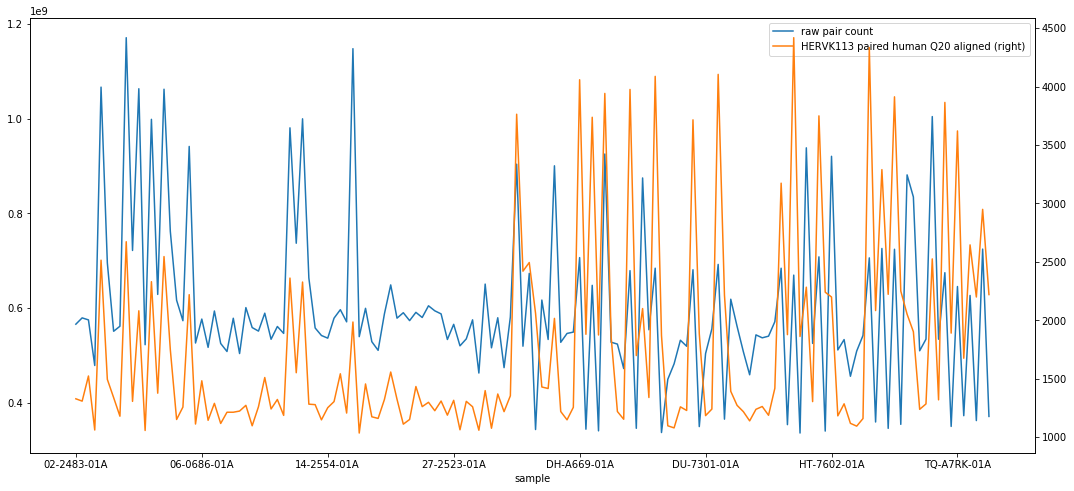

In [65]:
temp=df[['sample','raw pair count','HERVK113 paired human Q20 aligned']]
temp.set_index('sample',inplace=True)
temp.plot(secondary_y='HERVK113 paired human Q20 aligned')

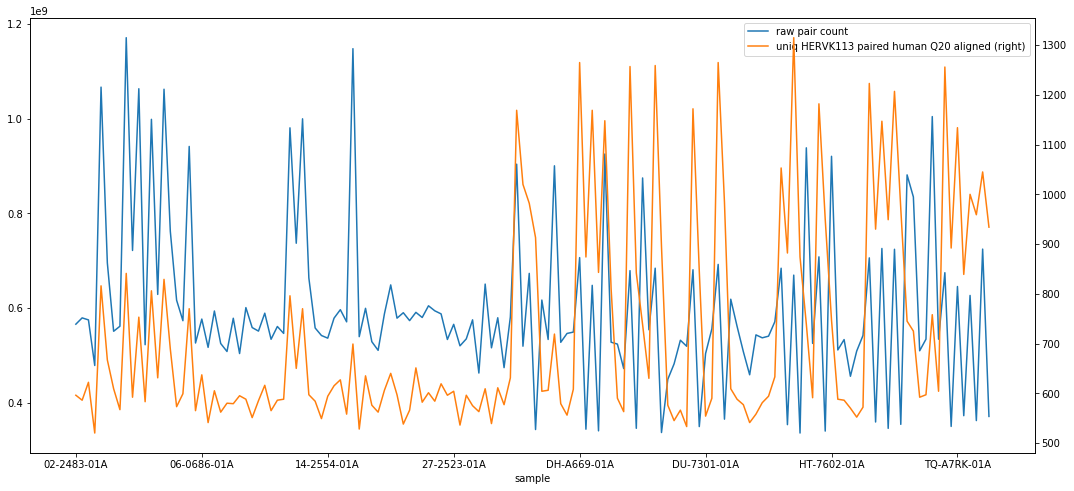

In [66]:
temp=df[['sample','raw pair count','uniq HERVK113 paired human Q20 aligned']]
temp.set_index('sample',inplace=True)
temp.plot(secondary_y='uniq HERVK113 paired human Q20 aligned')

# Normalization inverts the relationship

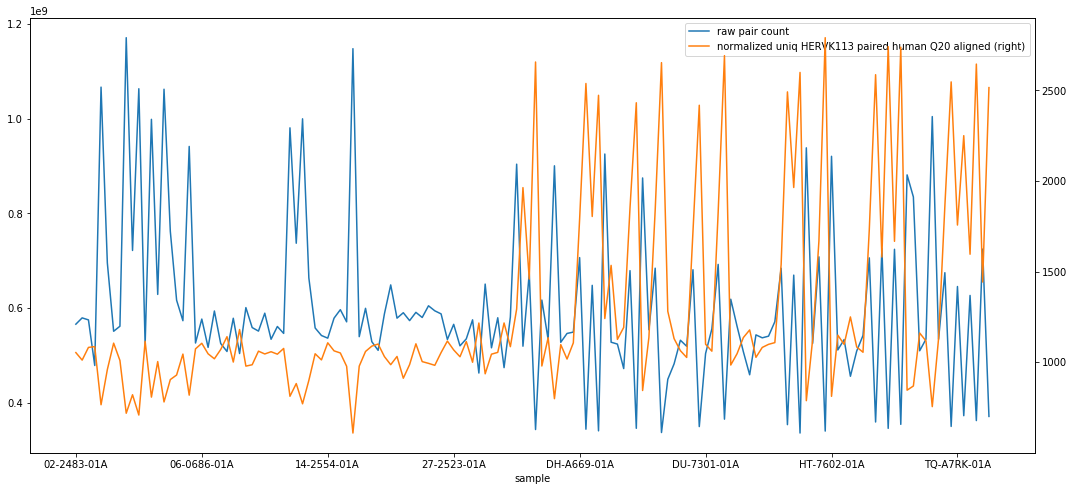

In [67]:
temp=df[['sample','raw pair count','normalized uniq HERVK113 paired human Q20 aligned']]
temp.set_index('sample',inplace=True)
temp.plot(secondary_y='normalized uniq HERVK113 paired human Q20 aligned')

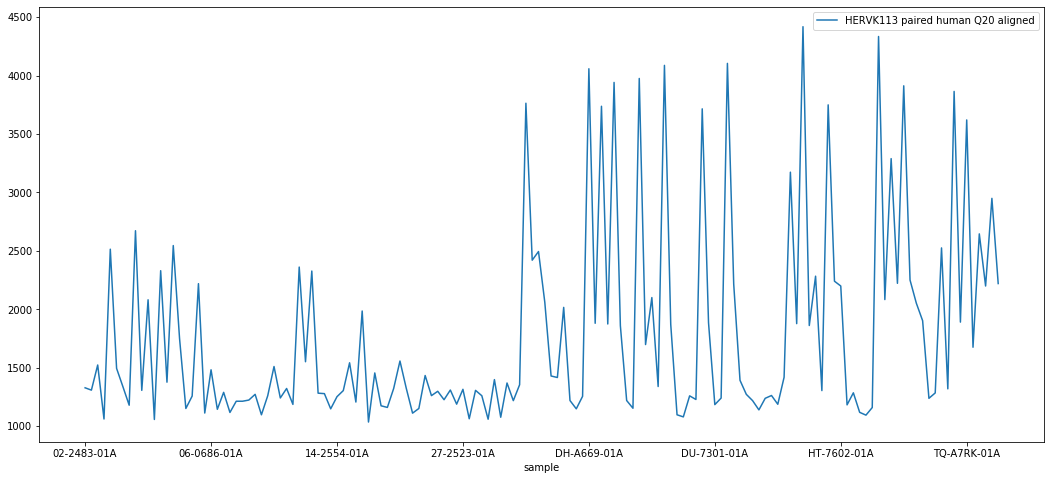

In [68]:
df.plot(x='sample',y='HERVK113 paired human Q20 aligned')

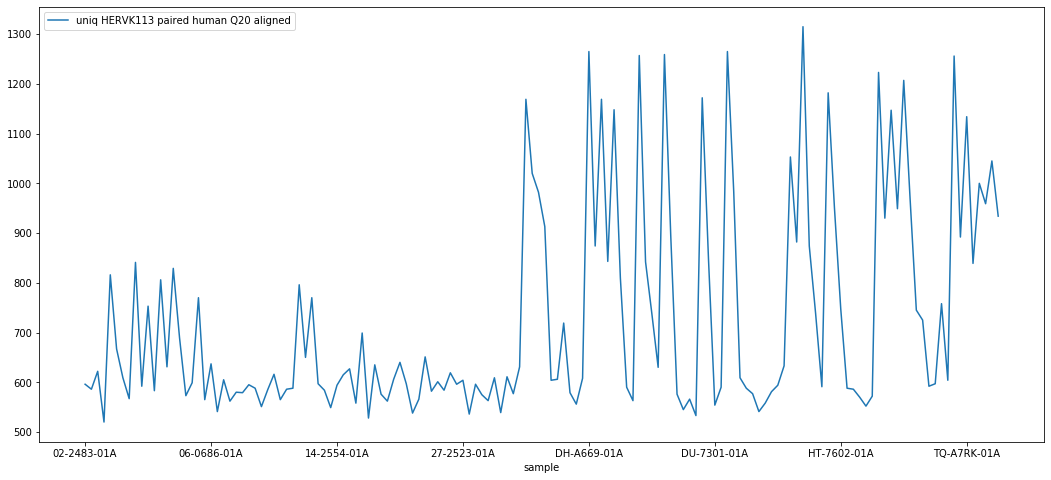

In [69]:
df.plot(x='sample',y='uniq HERVK113 paired human Q20 aligned')

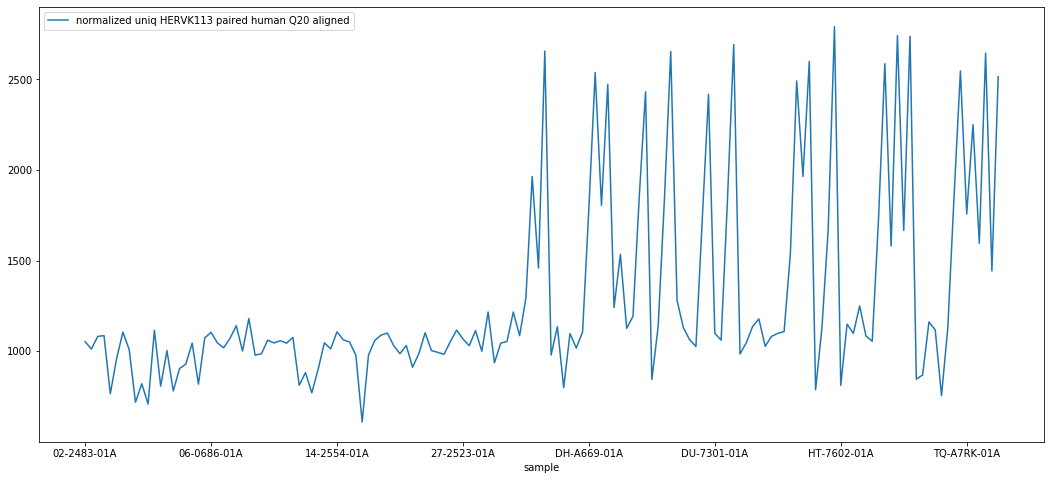

In [70]:
df.plot(x='sample',y='normalized uniq HERVK113 paired human Q20 aligned')

In [71]:
df['IDH'].unique()

array(['Mutant', 'WT', nan], dtype=object)

In [72]:
df[df['IDH'].isna()]

sample  raw pair count  HERVK113 paired reads aligned  \
36  14-1402-01A       999397926                           5520   
37  14-1402-10A       663610781                           3618   

    HERVK113 paired human Q20 aligned  uniq HERVK113 paired human Q20 aligned  \
36                               2327                                     770   
37                               1282                                     597   

    r10 uniq HERVK113 paired human Q20 aligned  \
36                                         733   
37                                         578   

    r100 uniq HERVK113 paired human Q20 aligned  \
36                                          711   
37                                          569   

    r1000 uniq HERVK113 paired human Q20 aligned  \
36                                           703   
37                                           565   

    r10000 uniq HERVK113 paired human Q20 aligned  \
36                                            556   
37                                            472   

    r100000 uniq HERVK113 paired human Q20 aligned  ...  \
36                                             556  ...   
37                                             472  ...   

    normalized r10 uniq SVA_E paired human Q20 aligned  \
36                                        3201.927797    
37                                        3486.983735    

    normalized r100 uniq SVA_E paired human Q20 aligned  \
36                                        2905.749476     
37                                        3285.058143     

    normalized r1000 uniq SVA_E paired human Q20 aligned  \
36                                        2878.733210      
37                                        3268.482162      

    normalized r10000 uniq SVA_E paired human Q20 aligned  \
36                                        2445.472355       
37                                        2891.755310       

    normalized SVA_F paired human Q20 aligned  \
36                                4993.006159   
37                                3309.168662   

    normalized uniq SVA_F paired human Q20 aligned  \
36                                     2555.538623   
37                                     2296.526885   

    normalized r10 uniq SVA_F paired human Q20 aligned  \
36                                        2181.313312    
37                                        2124.739441    

    normalized r100 uniq SVA_F paired human Q20 aligned  \
36                                        1998.203066     
37                                        2044.873349     

    normalized r1000 uniq SVA_F paired human Q20 aligned  \
36                                        1972.187403      
37                                        2031.311182      

    normalized r10000 uniq SVA_F paired human Q20 aligned  
36                                        1721.036191      
37                                        1847.468479      

[2 rows x 125 columns]

In [73]:
df['TERT'].unique()

array(['WT', 'Mutant'], dtype=object)

In [74]:
df[df['TERT'].isna()]

Empty DataFrame
Columns: [sample, raw pair count, HERVK113 paired reads aligned, HERVK113 paired human Q20 aligned, uniq HERVK113 paired human Q20 aligned, r10 uniq HERVK113 paired human Q20 aligned, r100 uniq HERVK113 paired human Q20 aligned, r1000 uniq HERVK113 paired human Q20 aligned, r10000 uniq HERVK113 paired human Q20 aligned, r100000 uniq HERVK113 paired human Q20 aligned, SVA_A paired reads aligned, SVA_A paired human Q20 aligned, uniq SVA_A paired human Q20 aligned, r10 uniq SVA_A paired human Q20 aligned, r100 uniq SVA_A paired human Q20 aligned, r1000 uniq SVA_A paired human Q20 aligned, r10000 uniq SVA_A paired human Q20 aligned, r100000 uniq SVA_A paired human Q20 aligned, SVA_B paired reads aligned, SVA_B paired human Q20 aligned, uniq SVA_B paired human Q20 aligned, r10 uniq SVA_B paired human Q20 aligned, r100 uniq SVA_B paired human Q20 aligned, r1000 uniq SVA_B paired human Q20 aligned, r10000 uniq SVA_B paired human Q20 aligned, r100000 uniq SVA_B paired human Q20 aligned, SVA_C paired reads aligned, SVA_C paired human Q20 aligned, uniq SVA_C paired human Q20 aligned, r10 uniq SVA_C paired human Q20 aligned, r100 uniq SVA_C paired human Q20 aligned, r1000 uniq SVA_C paired human Q20 aligned, r10000 uniq SVA_C paired human Q20 aligned, r100000 uniq SVA_C paired human Q20 aligned, SVA_D paired reads aligned, SVA_D paired human Q20 aligned, uniq SVA_D paired human Q20 aligned, r10 uniq SVA_D paired human Q20 aligned, r100 uniq SVA_D paired human Q20 aligned, r1000 uniq SVA_D paired human Q20 aligned, r10000 uniq SVA_D paired human Q20 aligned, r100000 uniq SVA_D paired human Q20 aligned, SVA_E paired reads aligned, SVA_E paired human Q20 aligned, uniq SVA_E paired human Q20 aligned, r10 uniq SVA_E paired human Q20 aligned, r100 uniq SVA_E paired human Q20 aligned, r1000 uniq SVA_E paired human Q20 aligned, r10000 uniq SVA_E paired human Q20 aligned, r100000 uniq SVA_E paired human Q20 aligned, SVA_F paired reads aligned, SVA_F paired human Q20 aligned, uniq SVA_F paired human Q20 aligned, r10 uniq SVA_F paired human Q20 aligned, r100 uniq SVA_F paired human Q20 aligned, r1000 uniq SVA_F paired human Q20 aligned, r10000 uniq SVA_F paired human Q20 aligned, r100000 uniq SVA_F paired human Q20 aligned, subject, case_submitter_id, project_id, primary_diagnosis, race, ethnicity, gender_mt2, RE_names, IDH, x1p19q, TERT, IDH_1p19q_status, WHO_groups, Triple_group, Tissue_sample_location, MGMT, Age, Survival_months, Vital_status, subject2, submitter, days_to_death, gender_mt, disease_type, center_name, normalized HERVK113 paired human Q20 aligned, normalized uniq HERVK113 paired human Q20 aligned, normalized r10 uniq HERVK113 paired human Q20 aligned, normalized r100 uniq HERVK113 paired human Q20 aligned, normalized r1000 uniq HERVK113 paired human Q20 aligned, normalized r10000 uniq HERVK113 paired human Q20 aligned, normalized SVA_A paired human Q20 aligned, normalized uniq SVA_A paired human Q20 aligned, normalized r10 uniq SVA_A paired human Q20 aligned, normalized r100 uniq SVA_A paired human Q20 aligned, normalized r1000 uniq SVA_A paired human Q20 aligned, normalized r10000 uniq SVA_A paired human Q20 aligned, normalized SVA_B paired human Q20 aligned, normalized uniq SVA_B paired human Q20 aligned, normalized r10 uniq SVA_B paired human Q20 aligned, normalized r100 uniq SVA_B paired human Q20 aligned, normalized r1000 uniq SVA_B paired human Q20 aligned, ...]
Index: []

[0 rows x 125 columns]

In [75]:
df['x1p19q'].unique()

array(['non-codel', 'codel'], dtype=object)

#for s in "", "uniq ","r10 uniq ","r100 uniq ","r1000 uniq ","r10000 uniq ":
for s in "", "uniq ": #,"r10 uniq ","r100 uniq ","r1000 uniq ","r10000 uniq ":
    groups = df.groupby('disease_type')
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.bar(group['sample'],group['normalized '+s+'HERVK113 paired human Q20 aligned'], label=name)
    ax.legend()
    plt.title('normalized '+s+'HERVK113 paired human Q20 aligned')
    plt.xticks(rotation=90)

groups = df.groupby('disease_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['normalized HERVK113 paired human Q20 aligned'], label=name)
ax.legend()

groups = df.groupby('disease_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['normalized uniq HERVK113 paired human Q20 aligned'], label=name)
ax.legend()

groups = df.groupby('disease_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['normalized r10 uniq HERVK113 paired human Q20 aligned'], label=name)
ax.legend()

groups = df.groupby('disease_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['normalized r100 uniq HERVK113 paired human Q20 aligned'], label=name)
ax.legend()

groups = df.groupby('disease_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['normalized r1000 uniq HERVK113 paired human Q20 aligned'], label=name)
ax.legend()

groups = df.groupby('disease_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['normalized r10000 uniq HERVK113 paired human Q20 aligned'], label=name)
ax.legend()

HERVK113:r1000 


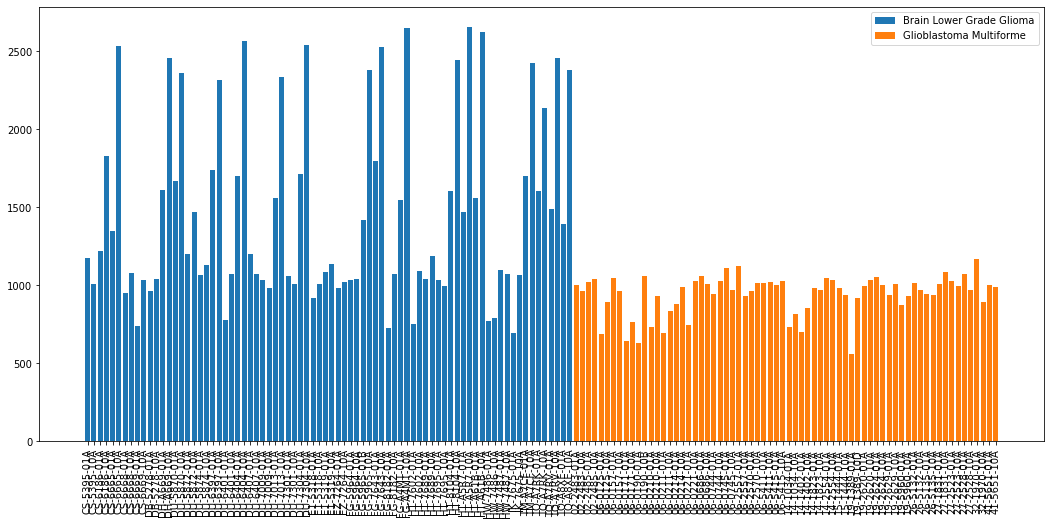

SVA_A:r1000 


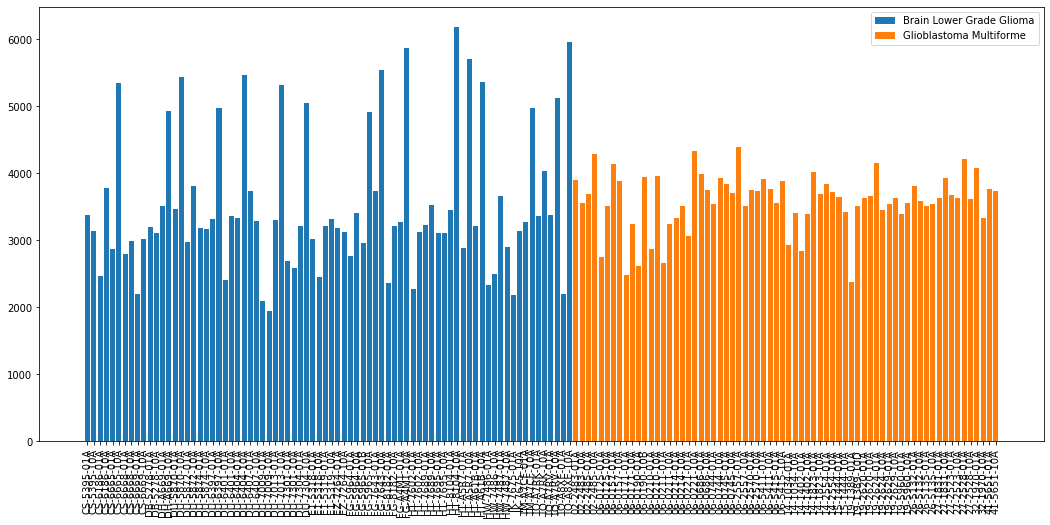

SVA_B:r1000 


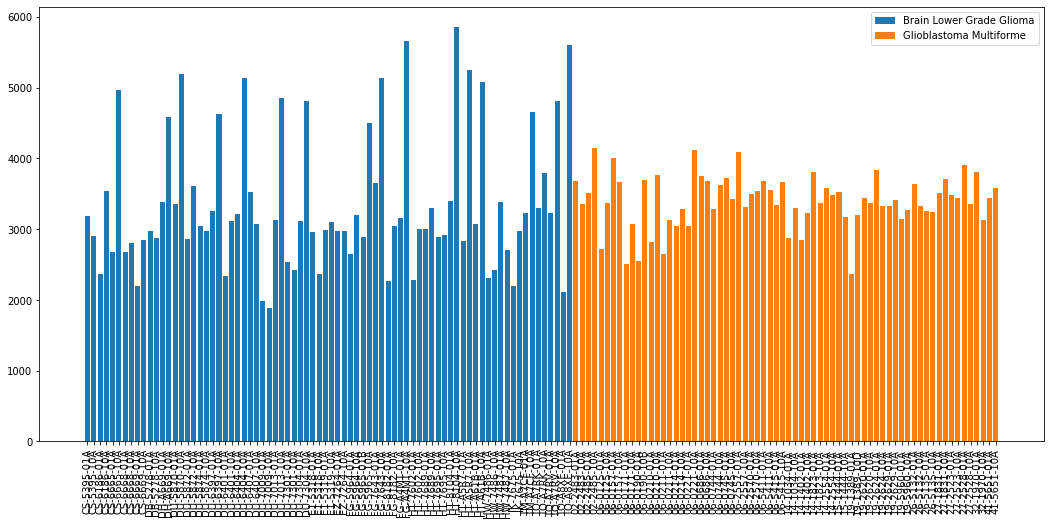

SVA_C:r1000 


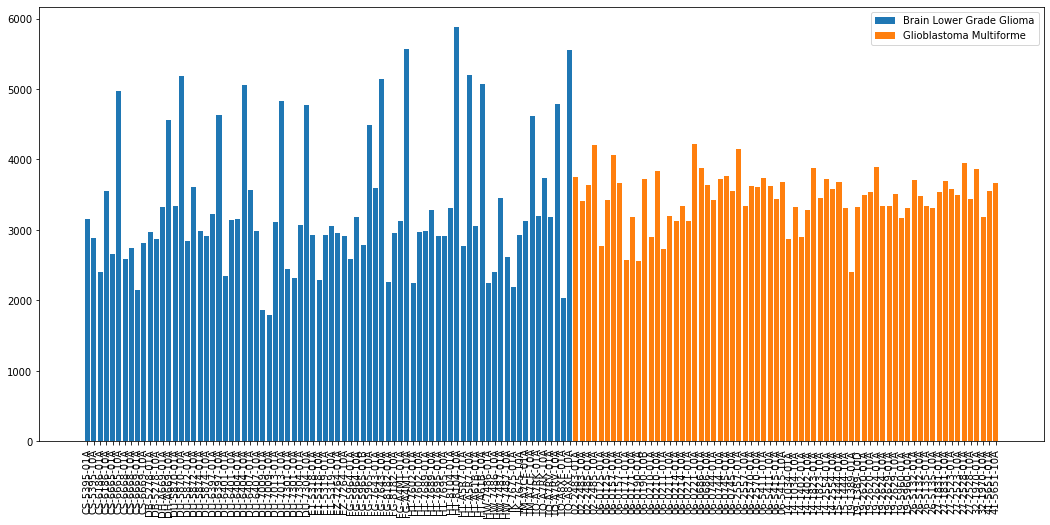

SVA_D:r1000 


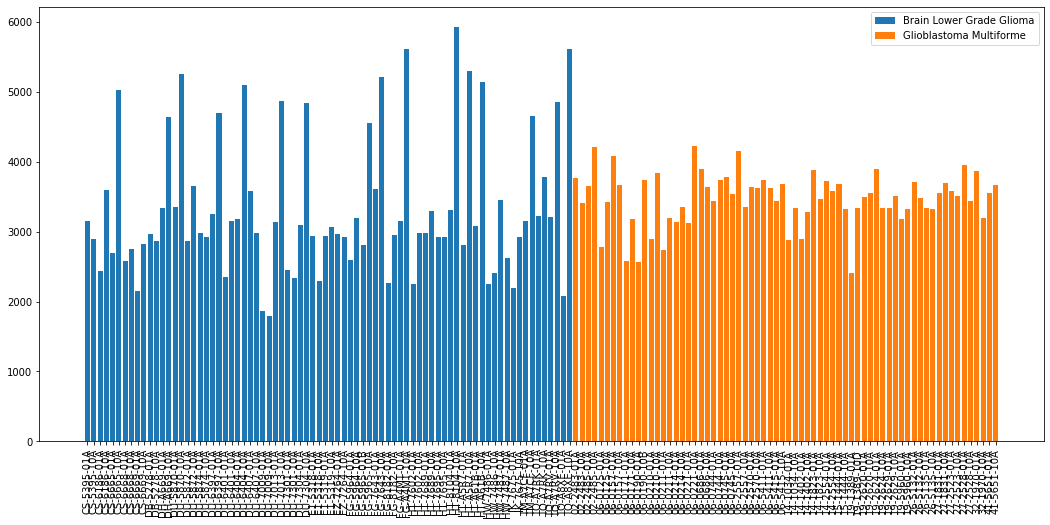

SVA_E:r1000 


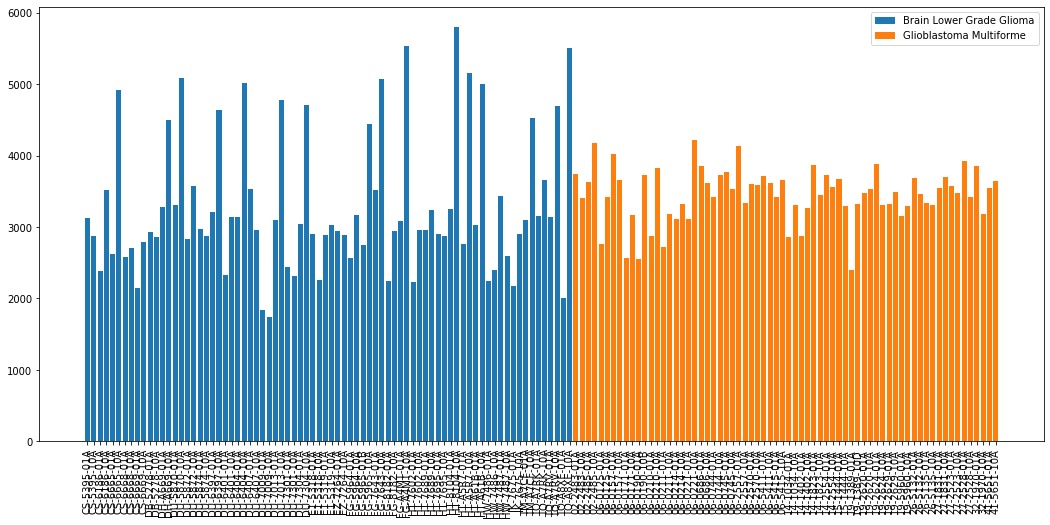

SVA_F:r1000 


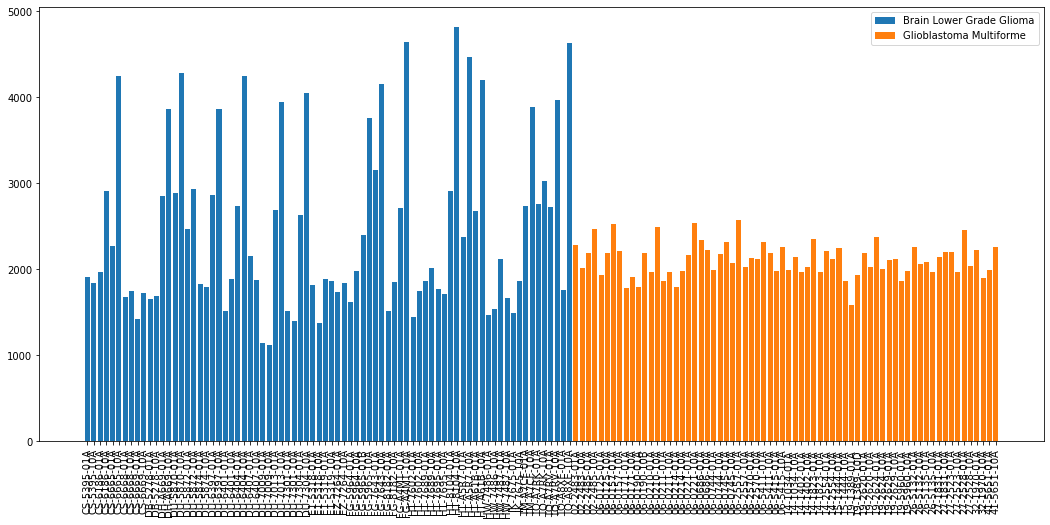

In [76]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    #for s in "","r10 ","r100 ","r1000 ","r10000 ":
        s="r1000 "
        print(hkle+":"+s)
        groups = df.groupby('disease_type')
        fig, ax = plt.subplots()
        plt.xticks(rotation=90)
        for name, group in groups:
            ax.bar(group['sample'],group['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'], label=name)
        ax.legend()
        plt.show()

# What's up with the extreme HERVK113 peaks?

In [77]:
print(pd.get_option('display.max_columns'))

20


In [78]:
pd.set_option('display.max_columns', None)

In [79]:
print(pd.get_option('display.max_rows'))

60


In [80]:
pd.set_option('display.max_rows', None)

In [81]:
c='uniq HERVK113 paired human Q20 aligned'

In [82]:
threshold=10+df[df['project_id']=='TCGA-GBM']['normalized '+c].max()
threshold

1226.2082820496141

In [83]:
#df[df['normalized uniq HERVK113 paired human Q20 aligned']>1400]

In [84]:
df[df['project_id']=='TCGA-GBM'][
    ['sample',
    'normalized '+c, c,
    'HERVK113 paired reads aligned','raw pair count']]

sample  normalized uniq HERVK113 paired human Q20 aligned  \
0   02-2483-01A                                        1052.958003   
1   02-2483-10A                                        1011.558565   
2   02-2485-01A                                        1081.625249   
3   02-2485-10A                                        1085.932647   
4   06-0125-01A                                         765.285454   
5   06-0125-10A                                         959.191222   
6   06-0157-01A                                        1105.187518   
7   06-0157-10A                                        1009.477302   
8   06-0171-01A                                         718.443982   
9   06-0171-10A                                         820.432672   
10  06-0190-01A                                         708.466904   
11  06-0190-10B                                        1115.405349   
12  06-0210-01A                                         807.368824   
13  06-0210-10A                                        1003.458329   
14  06-0211-01A                                         780.723429   
15  06-0211-10A                                         904.149908   
16  06-0214-01A                                         929.325757   
17  06-0214-10A                                        1044.745975   
18  06-0221-01A                                         818.215345   
19  06-0221-10A                                        1073.597370   
20  06-0686-01A                                        1104.377653   
21  06-0686-10A                                        1046.249158   
22  06-0744-01A                                        1018.852809   
23  06-0744-10A                                        1069.932337   
24  06-0745-01A                                        1140.857161   
25  06-0745-10A                                        1000.832058   
26  06-2557-01A                                        1180.399644   
27  06-2557-10A                                         978.388584   
28  06-2570-01A                                         985.914700   
29  06-2570-10A                                        1060.897631   
30  06-5411-01A                                        1045.473801   
31  06-5411-10A                                        1057.732439   
32  06-5415-01A                                        1044.332896   
33  06-5415-10A                                        1075.827886   
34  14-1034-01A                                         811.960984   
35  14-1034-10A                                         882.158467   
36  14-1402-01A                                         770.463876   
37  14-1402-10A                                         899.623721   
38  14-1823-01A                                        1046.582866   
39  14-1823-10A                                        1012.698034   
40  14-2554-01A                                        1107.137787   
41  14-2554-10A                                        1062.695516   
42  15-1444-01A                                        1050.918849   
43  15-1444-10A                                         977.323790   
44  19-1389-01A                                         609.190040   
45  19-1389-10D                                         978.366880   
46  19-2620-01A                                        1059.270185   
47  19-2620-10A                                        1088.704471   
48  19-2624-01A                                        1100.172926   
49  19-2624-10A                                        1030.970646   
50  19-2629-01A                                         986.313559   
51  19-2629-10A                                        1031.607600   
52  19-5960-01A                                         911.580843   
53  19-5960-10A                                         986.829775   
54  26-5132-01A                                        1101.567299   
55  26-5132-10A                                        1003.223158   
56  26-5135-01A    

In [85]:
df[df['project_id']=='TCGA-LGG'][
    ['sample',
    'normalized '+c, c,
    'HERVK113 paired reads aligned','raw pair count']]

sample  normalized uniq HERVK113 paired human Q20 aligned  \
74   CS-5395-01A                                        1216.494982   
75   CS-5395-10A                                        1085.645025   
78   CS-6186-01A                                        1293.616364   
80   CS-6186-10A                                        1963.248598   
84   CS-6665-01A                                        1458.684530   
85   CS-6665-10A                                        2656.410088   
86   CS-6668-01A                                         979.061428   
87   CS-6668-10A                                        1135.324223   
88   CS-6669-01A                                         798.670370   
89   CS-6669-10A                                        1097.078916   
94   DB-5278-01A                                        1017.464699   
95   DB-5278-10A                                        1106.819076   
102  DH-A669-01A                                        1790.579326   
103  DH-A669-10A                                        2537.807768   
112  DU-5870-01A                                        1804.075124   
113  DU-5870-10A                                        2472.634586   
114  DU-5872-01A                                        1240.955313   
116  DU-5872-10A                                        1534.189437   
118  DU-5874-01A                                        1125.932243   
119  DU-5874-10A                                        1191.949409   
122  DU-6397-01A                                        1851.291719   
123  DU-6397-10A                                        2431.509833   
126  DU-6401-01A                                         843.826792   
127  DU-6401-10A                                        1136.646199   
132  DU-6404-01A                                        1840.253523   
133  DU-6404-10A                                        2652.892194   
136  DU-6407-01A                                        1280.905905   
137  DU-6407-10A                                        1130.169295   
148  DU-7009-01A                                        1063.565585   
149  DU-7009-10A                                        1026.200696   
152  DU-7013-01A                                        1721.269254   
153  DU-7013-10A                                        2417.750417   
162  DU-7301-01A                                        1099.203250   
163  DU-7301-10A                                        1060.882430   
164  DU-7304-01A                                        1827.633820   
165  DU-7304-10A                                        2691.561959   
172  E1-5318-01A                                         984.348492   
173  E1-5318-10A                                        1046.941598   
174  E1-5319-01A                                        1135.955347   
175  E1-5319-10A                                        1178.021485   
176  EZ-7264-01A                                        1026.778401   
177  EZ-7264-10A                                        1081.469040   
178  FG-5964-01A                                        1098.526053   
179  FG-5964-10A                                        1108.081152   
180  FG-5965-01B                                        1539.298132   
181  FG-5965-10A                                        2491.466487   
194  FG-7643-01A                                        1964.023296   
195  FG-7643-10A                                        2598.800361   
196  FG-8182-01A                                         787.705757   
197  FG-8182-10A                                        1124.758136   
198  FG-A4MT-01A                                        1669.263652   
199  FG-A4MT-10A                                        2790.554814   
216  HT-7602-01A                                         811.726124   
217  HT-7602-10A                                        1149.296069   
220  HT-7689-01A                                        1098.363225   
221  HT-7689-10A                  

In [86]:
df[df['normalized '+c]>threshold][
    ['sample',
    'normalized '+c,
    c,
    'HERVK113 paired reads aligned','raw pair count']]

sample  normalized uniq HERVK113 paired human Q20 aligned  \
78   CS-6186-01A                                        1293.616364   
80   CS-6186-10A                                        1963.248598   
84   CS-6665-01A                                        1458.684530   
85   CS-6665-10A                                        2656.410088   
102  DH-A669-01A                                        1790.579326   
103  DH-A669-10A                                        2537.807768   
112  DU-5870-01A                                        1804.075124   
113  DU-5870-10A                                        2472.634586   
114  DU-5872-01A                                        1240.955313   
116  DU-5872-10A                                        1534.189437   
122  DU-6397-01A                                        1851.291719   
123  DU-6397-10A                                        2431.509833   
132  DU-6404-01A                                        1840.253523   
133  DU-6404-10A                                        2652.892194   
136  DU-6407-01A                                        1280.905905   
152  DU-7013-01A                                        1721.269254   
153  DU-7013-10A                                        2417.750417   
164  DU-7304-01A                                        1827.633820   
165  DU-7304-10A                                        2691.561959   
180  FG-5965-01B                                        1539.298132   
181  FG-5965-10A                                        2491.466487   
194  FG-7643-01A                                        1964.023296   
195  FG-7643-10A                                        2598.800361   
198  FG-A4MT-01A                                        1669.263652   
199  FG-A4MT-10A                                        2790.554814   
221  HT-7689-10A                                        1249.807848   
224  HT-8104-01A                                        1732.432120   
225  HT-8104-10A                                        2586.308824   
226  HT-A5R7-01A                                        1580.407632   
227  HT-A5R7-10A                                        2741.453202   
228  HT-A61B-01A                                        1666.937299   
229  HT-A61B-10A                                        2738.196009   
240  TM-A7CF-01A                                        1861.655743   
241  TM-A7CF-10A                                        2546.611280   
242  TQ-A7RK-01A                                        1756.801800   
243  TQ-A7RK-10A                                        2249.929839   
244  TQ-A7RV-01A                                        1595.758780   
245  TQ-A7RV-10A                                        2644.885015   
246  TQ-A8XE-01A                                        1442.486055   
247  TQ-A8XE-10A                                        2515.043637   

     uniq HERVK113 paired human Q20 aligned  HERVK113 paired reads aligned  \
78                                     1169                          11796   
80                                     1020                           6900   
84                                      982                           9324   
85                                      913                           5910   
102                                    1265                          11800   
103                                     874                           5786   
112                                    1169                          10716   
113                                     843                           5694   
114                                    1148                          12504   
116                                     810                           6132   
122                                    1257                          11506   
123                                     842                           5686   
132                                    1259                          11838   
133   

In [87]:
meta_list=list(meta)
meta_list.remove('case_submitter_id')
meta_list.remove('RE_names')
meta_list.remove('subject2')
meta_list.remove('submitter')
meta_list.remove('Survival_months')
meta_list.remove('days_to_death')
meta_list.remove('Age')

In [88]:
df[df['normalized '+c]>threshold][meta_list]

project_id              primary_diagnosis                       race  \
78    TCGA-LGG                   Mixed glioma                      white   
80    TCGA-LGG                   Mixed glioma                      white   
84    TCGA-LGG        Astrocytoma, anaplastic                      white   
85    TCGA-LGG        Astrocytoma, anaplastic                      white   
102   TCGA-LGG  Oligodendroglioma, anaplastic                      white   
103   TCGA-LGG  Oligodendroglioma, anaplastic                      white   
112   TCGA-LGG         Oligodendroglioma, NOS                      white   
113   TCGA-LGG         Oligodendroglioma, NOS                      white   
114   TCGA-LGG                   Mixed glioma  black or african american   
116   TCGA-LGG                   Mixed glioma  black or african american   
122   TCGA-LGG  Oligodendroglioma, anaplastic                      white   
123   TCGA-LGG  Oligodendroglioma, anaplastic                      white   
132   TCGA-LGG  Oligodendroglioma, anaplastic                      white   
133   TCGA-LGG  Oligodendroglioma, anaplastic                      white   
136   TCGA-LGG         Oligodendroglioma, NOS                      white   
152   TCGA-LGG        Astrocytoma, anaplastic                      white   
153   TCGA-LGG        Astrocytoma, anaplastic                      white   
164   TCGA-LGG                   Mixed glioma                      white   
165   TCGA-LGG                   Mixed glioma                      white   
180   TCGA-LGG                   Mixed glioma                      white   
181   TCGA-LGG                   Mixed glioma                      white   
194   TCGA-LGG                   Mixed glioma                      white   
195   TCGA-LGG                   Mixed glioma                      white   
198   TCGA-LGG         Oligodendroglioma, NOS                      white   
199   TCGA-LGG         Oligodendroglioma, NOS                      white   
221   TCGA-LGG         Oligodendroglioma, NOS                      white   
224   TCGA-LGG        Astrocytoma, anaplastic                      white   
225   TCGA-LGG        Astrocytoma, anaplastic                      white   
226   TCGA-LGG        Astrocytoma, anaplastic                      white   
227   TCGA-LGG        Astrocytoma, anaplastic                      white   
228   TCGA-LGG        Astrocytoma, anaplastic                      white   
229   TCGA-LGG        Astrocytoma, anaplastic                      white   
240   TCGA-LGG               Astrocytoma, NOS                      white   
241   TCGA-LGG               Astrocytoma, NOS                      white   
242   TCGA-LGG         Oligodendroglioma, NOS                      white   
243   TCGA-LGG         Oligodendroglioma, NOS                      white   
244   TCGA-LGG               Astrocytoma, NOS                      white   
245   TCGA-LGG               Astrocytoma, NOS                      white   
246   TCGA-LGG         Oligodendroglioma, NOS                      white   
247   TCGA-LGG         Oligodendroglioma, NOS                      white   

                  ethnicity gender_mt2     IDH     x1p19q    TERT  \
78   not hispanic or latino       male      WT  non-codel  Mutant   
80   not hispanic or latino       male      WT  non-codel  Mutant   
84   not hispanic or latino     female  Mutant  non-codel      WT   
85   not hispanic or latino     female  Mutant  non-codel      WT   
102  not hispanic or latino       male  Mutant      codel  Mutant   
103  not hispanic or latino       male  Mutant      codel  Mutant   
112  not hispanic or latino     female  Mutant      codel  Mutant   
113  not hispanic or latino     female  Mutant      codel  Mutant   
114  not hispanic or latino     female  Mutant  non-codel      WT   
116  not hispanic or latino     female  Mutant  non-codel      WT   
122  not hispanic or latino       male  Mutant      codel  Mutant   
123  not hispanic or latino       male  Mutant      codel  

In [89]:
for m in meta_list:
    print(m)
    print(df[df['normalized '+c]>threshold][m].value_counts())
    print()

project_id
TCGA-LGG    40
Name: project_id, dtype: int64

primary_diagnosis
Astrocytoma, anaplastic          10
Oligodendroglioma, NOS           10
Mixed glioma                     10
Oligodendroglioma, anaplastic     6
Astrocytoma, NOS                  4
Name: primary_diagnosis, dtype: int64

race
white                        38
black or african american     2
Name: race, dtype: int64

ethnicity
not hispanic or latino    34
hispanic or latino         6
Name: ethnicity, dtype: int64

gender_mt2
female    24
male      16
Name: gender_mt2, dtype: int64

IDH
Mutant    30
WT        10
Name: IDH, dtype: int64

x1p19q
non-codel    34
codel         6
Name: x1p19q, dtype: int64

TERT
WT        26
Mutant    14
Name: TERT, dtype: int64

IDH_1p19q_status
IDH-Mutant:1p19q-non-codel    24
IDH-WT:1p19q-non-codel        10
IDH-Mutant:1p19q-codel         6
Name: IDH_1p19q_status, dtype: int64

WHO_groups
oligoastrocytoma:IDH-Mutant:1p19q-non-codel     6
astrocytoma:IDH-Mutant:1p19q-non-codel          

In [90]:
for m in meta_list:
    print(m)
    print(df[m].value_counts())
    print()

project_id
TCGA-LGG    78
TCGA-GBM    68
Name: project_id, dtype: int64

primary_diagnosis
Glioblastoma                     68
Oligodendroglioma, NOS           46
Mixed glioma                     12
Astrocytoma, anaplastic          10
Oligodendroglioma, anaplastic     6
Astrocytoma, NOS                  4
Name: primary_diagnosis, dtype: int64

race
white                        132
black or african american     10
asian                          2
not reported                   2
Name: race, dtype: int64

ethnicity
not hispanic or latino    124
not reported               14
hispanic or latino          8
Name: ethnicity, dtype: int64

gender_mt2
male      82
female    64
Name: gender_mt2, dtype: int64

IDH
Mutant    74
WT        70
Name: IDH, dtype: int64

x1p19q
non-codel    118
codel         28
Name: x1p19q, dtype: int64

TERT
Mutant    94
WT        52
Name: TERT, dtype: int64

IDH_1p19q_status
IDH-WT:1p19q-non-codel        70
IDH-Mutant:1p19q-non-codel    46
IDH-Mutant:1p19q-codel     

In [91]:
pd.set_option('display.max_columns', 20)

In [92]:
pd.set_option('display.max_rows', 60)

In [93]:
tumor=df[df['sample'].str.contains("-01.$")].copy()

In [94]:
tumor.shape

(73, 125)

In [95]:
tumor.head()

sample  raw pair count  HERVK113 paired reads aligned  \
0  02-2483-01A       566024474                           3558   
2  02-2485-01A       575060540                           3782   
4  06-0125-01A      1066268796                           5920   
6  06-0157-01A       551037711                           3280   
8  06-0171-01A      1170585350                           6420   

   HERVK113 paired human Q20 aligned  uniq HERVK113 paired human Q20 aligned  \
0                               1328                                     596   
2                               1523                                     622   
4                               2514                                     816   
6                               1338                                     609   
8                               2672                                     841   

   r10 uniq HERVK113 paired human Q20 aligned  \
0                                         580   
2                                         598   
4                                         761   
6                                         591   
8                                         785   

   r100 uniq HERVK113 paired human Q20 aligned  \
0                                          573   
2                                          591   
4                                          742   
6                                          582   
8                                          761   

   r1000 uniq HERVK113 paired human Q20 aligned  \
0                                           568   
2                                           587   
4                                           734   
6                                           577   
8                                           750   

   r10000 uniq HERVK113 paired human Q20 aligned  \
0                                            470   
2                                            469   
4                                            568   
6                                            471   
8                                            583   

   r100000 uniq HERVK113 paired human Q20 aligned  ...  \
0                                             470  ...   
2                                             469  ...   
4                                             568  ...   
6                                             471  ...   
8                                             583  ...   

   normalized r10 uniq SVA_E paired human Q20 aligned  \
0                                        3966.259593    
2                                        3855.246267    
4                                        3100.531510    
6                                        4322.753148    
8                                        2902.821225    

   normalized r100 uniq SVA_E paired human Q20 aligned  \
0                                        3770.154999     
2                                        3665.701006     
4                                        2799.481717     
6                                        4048.724716     
8                                        2600.408420     

   normalized r1000 uniq SVA_E paired human Q20 aligned  \
0                                        3736.587546      
2                                        3636.138901      
4                                        2758.216325      
6                                        4028.762380      
8                                        2561.111840      

   normalized r10000 uniq SVA_E paired human Q20 aligned  \
0                                        3342.611648       
2                                        3279.654695       
4                                        2336.183905       
6                                        3578.702438       
8                                        2163.020407       

   normalized SVA_F paired human Q20 aligned  \
0                                3833.756489   
2                                3855.246267   
4                  

In [96]:
tumor[tumor['subject']=='DH-A669']['normalized r1000 uniq HERVK113 paired human Q20 aligned']

102    1610.813654
Name: normalized r1000 uniq HERVK113 paired human Q20 aligned, dtype: float64

In [97]:
normal=df[df['sample'].str.contains("-10.$")].copy()

In [98]:
normal.shape

(73, 125)

In [99]:
normal.head()

sample  raw pair count  HERVK113 paired reads aligned  \
1  02-2483-10A       579304076                           3338   
3  02-2485-10A       478851061                           2564   
5  06-0125-10A       695377506                           3778   
7  06-0157-10A       561676819                           3040   
9  06-0171-10A       721570484                           3472   

   HERVK113 paired human Q20 aligned  uniq HERVK113 paired human Q20 aligned  \
1                               1308                                     586   
3                               1061                                     520   
5                               1494                                     667   
7                               1179                                     567   
9                               1306                                     592   

   r10 uniq HERVK113 paired human Q20 aligned  \
1                                         569   
3                                         508   
5                                         636   
7                                         551   
9                                         567   

   r100 uniq HERVK113 paired human Q20 aligned  \
1                                          562   
3                                          503   
5                                          624   
7                                          547   
9                                          555   

   r1000 uniq HERVK113 paired human Q20 aligned  \
1                                           557   
3                                           498   
5                                           620   
7                                           542   
9                                           552   

   r10000 uniq HERVK113 paired human Q20 aligned  \
1                                            460   
3                                            410   
5                                            498   
7                                            446   
9                                            445   

   r100000 uniq HERVK113 paired human Q20 aligned  ...  \
1                                             460  ...   
3                                             410  ...   
5                                             498  ...   
7                                             446  ...   
9                                             445  ...   

   normalized r10 uniq SVA_E paired human Q20 aligned  \
1                                        3569.800534    
3                                        4375.055567    
5                                        3691.520042    
7                                        3902.600082    
9                                        3396.757565    

   normalized r100 uniq SVA_E paired human Q20 aligned  \
1                                        3421.346547     
3                                        4189.194017     
5                                        3441.296245     
7                                        3681.832559     
9                                        3190.263531     

   normalized r1000 uniq SVA_E paired human Q20 aligned  \
1                                        3407.536874      
3                                        4174.575693      
5                                        3418.287160      
7                                        3653.346427      
9                                        3170.861407      

   normalized r10000 uniq SVA_E paired human Q20 aligned  \
1                                        3096.819226       
3                                        3779.880943       
5                                        2998.371362       
7                                        3327.536293       
9                                        2810.536247       

   normalized SVA_F paired human Q20 aligned  \
1                                3241.820795   
3                                3884.297544   
5                  

In [100]:
normal[normal['subject']=='DH-A669']['normalized r1000 uniq HERVK113 paired human Q20 aligned']

103    2456.505002
Name: normalized r1000 uniq HERVK113 paired human Q20 aligned, dtype: float64

In [101]:
tn=normal.merge(tumor,on='subject',suffixes=["_normal","_tumor"],how='outer')

In [102]:
tn.shape

(73, 249)

In [103]:
tn.head()

sample_normal  raw pair count_normal  HERVK113 paired reads aligned_normal  \
0   02-2483-10A              579304076                                  3338   
1   02-2485-10A              478851061                                  2564   
2   06-0125-10A              695377506                                  3778   
3   06-0157-10A              561676819                                  3040   
4   06-0171-10A              721570484                                  3472   

   HERVK113 paired human Q20 aligned_normal  \
0                                      1308   
1                                      1061   
2                                      1494   
3                                      1179   
4                                      1306   

   uniq HERVK113 paired human Q20 aligned_normal  \
0                                            586   
1                                            520   
2                                            667   
3                                            567   
4                                            592   

   r10 uniq HERVK113 paired human Q20 aligned_normal  \
0                                                569   
1                                                508   
2                                                636   
3                                                551   
4                                                567   

   r100 uniq HERVK113 paired human Q20 aligned_normal  \
0                                                562    
1                                                503    
2                                                624    
3                                                547    
4                                                555    

   r1000 uniq HERVK113 paired human Q20 aligned_normal  \
0                                                557     
1                                                498     
2                                                620     
3                                                542     
4                                                552     

   r10000 uniq HERVK113 paired human Q20 aligned_normal  \
0                                                460      
1                                                410      
2                                                498      
3                                                446      
4                                                445      

   r100000 uniq HERVK113 paired human Q20 aligned_normal  ...  \
0                                                460      ...   
1                                                410      ...   
2                                                498      ...   
3                                                446      ...   
4                                                445      ...   

   normalized r10 uniq SVA_E paired human Q20 aligned_tumor  \
0                                        3966.259593          
1                                        3855.246267          
2                                        3100.531510          
3                                        4322.753148          
4                                        2902.821225          

   normalized r100 uniq SVA_E paired human Q20 aligned_tumor  \
0                                        3770.154999           
1                                        3665.701006           
2                                        2799.481717           
3                                        4048.724716           
4                                        2600.408420           

   normalized r1000 uniq SVA_E paired human Q20 aligned_tumor  \
0                                        3736.587546            
1                                        3636.138901            
2                                        2758.216325            
3                                        4028.762380            
4                                        2561.111840         

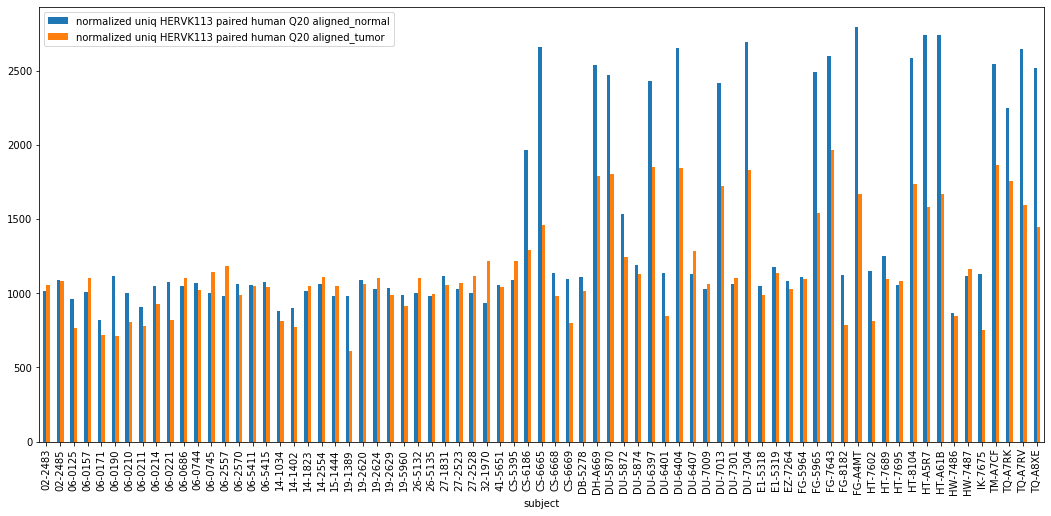

In [104]:
tn.plot(x='subject',y=['normalized uniq HERVK113 paired human Q20 aligned_normal',
                          'normalized uniq HERVK113 paired human Q20 aligned_tumor'],
            kind='bar')

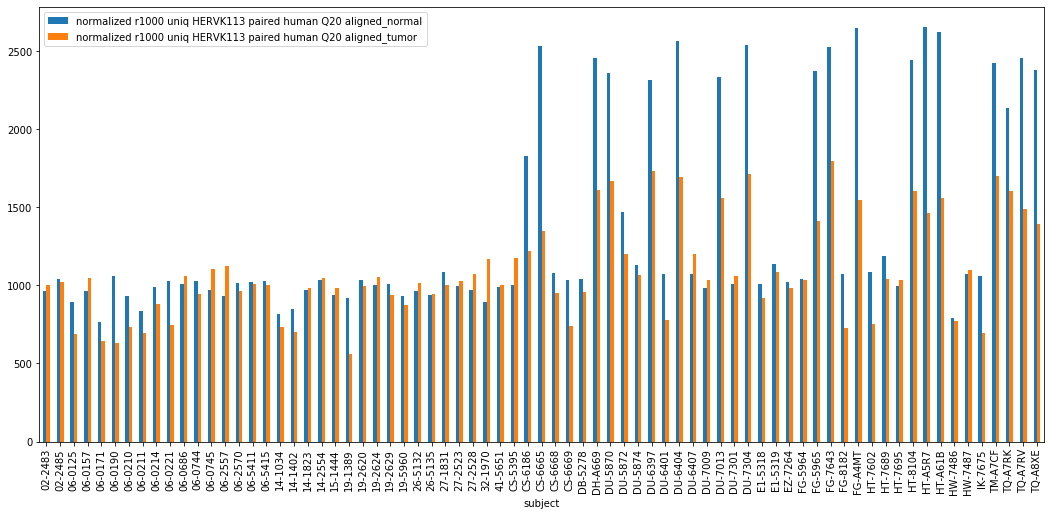

In [105]:
tn.plot(x='subject',y=['normalized r1000 uniq HERVK113 paired human Q20 aligned_normal',
                          'normalized r1000 uniq HERVK113 paired human Q20 aligned_tumor'],
            kind='bar')

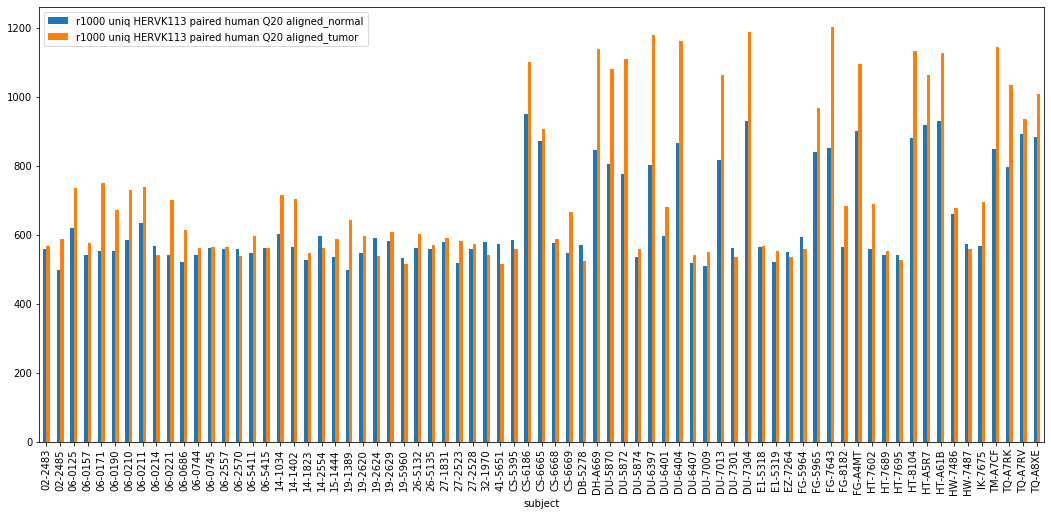

In [106]:
tn.plot(x='subject',y=['r1000 uniq HERVK113 paired human Q20 aligned_normal',
                          'r1000 uniq HERVK113 paired human Q20 aligned_tumor'],
            kind='bar')

HERVK113:


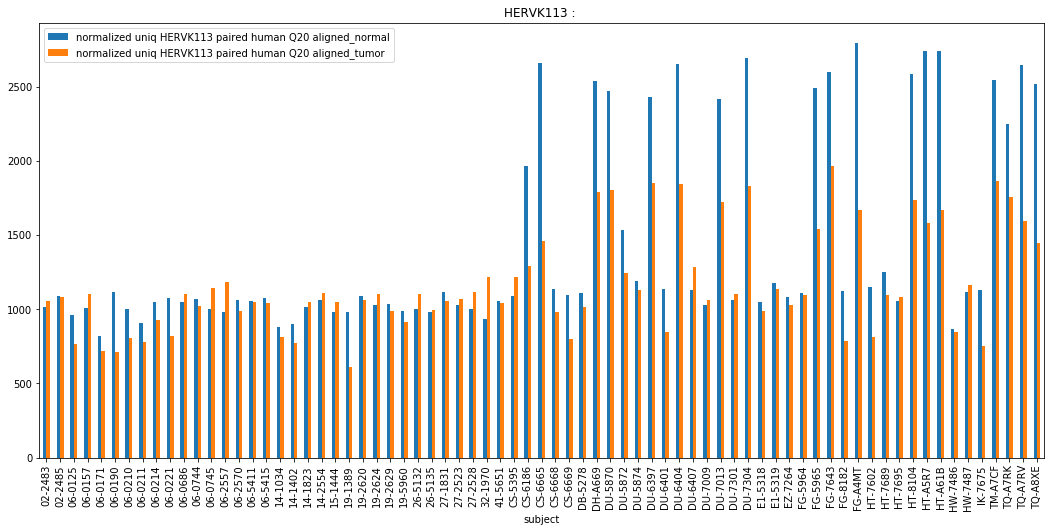

HERVK113:r10 


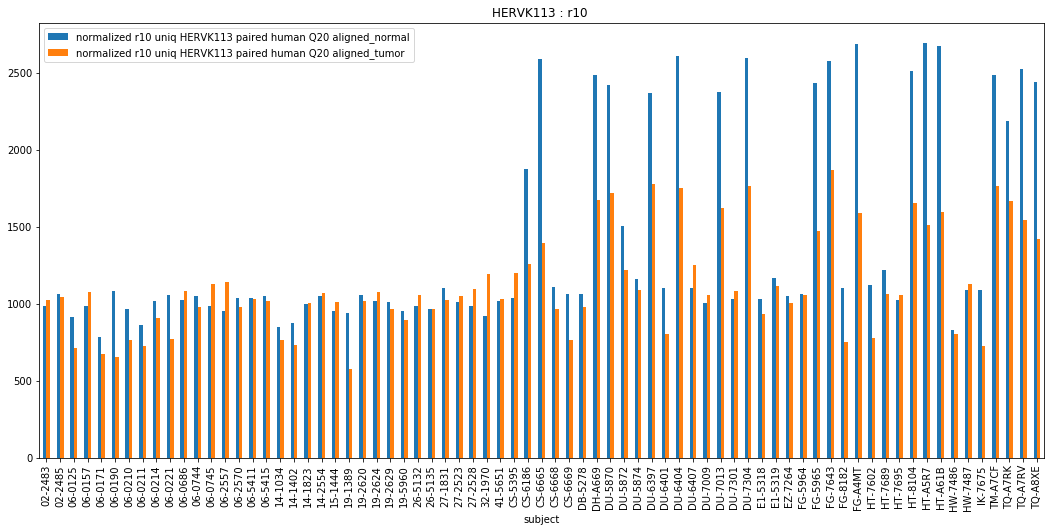

HERVK113:r100 


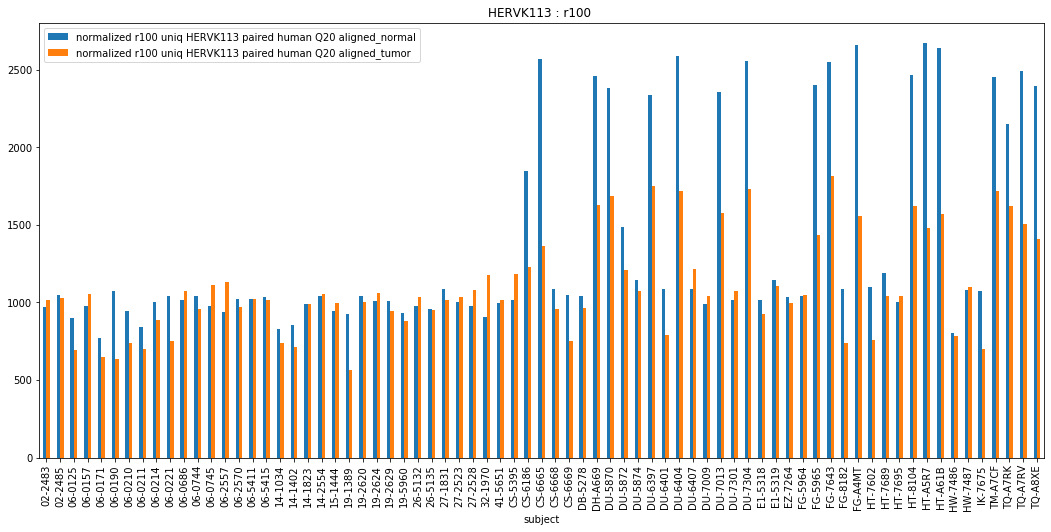

HERVK113:r1000 


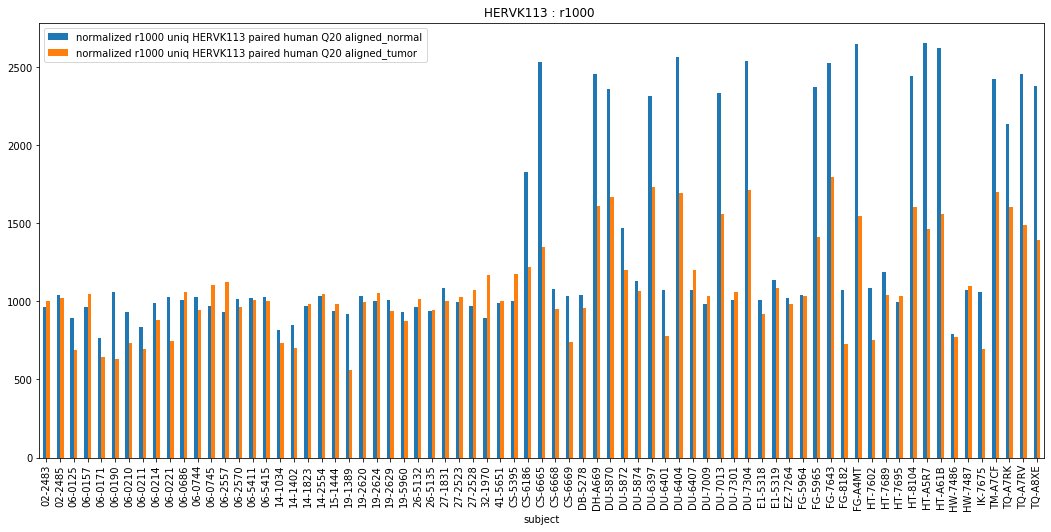

HERVK113:r10000 


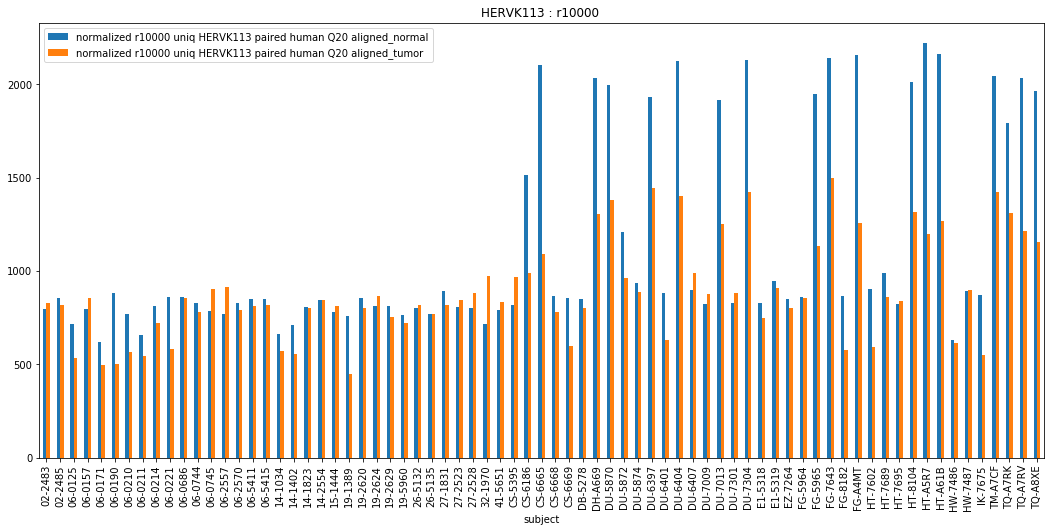

SVA_A:


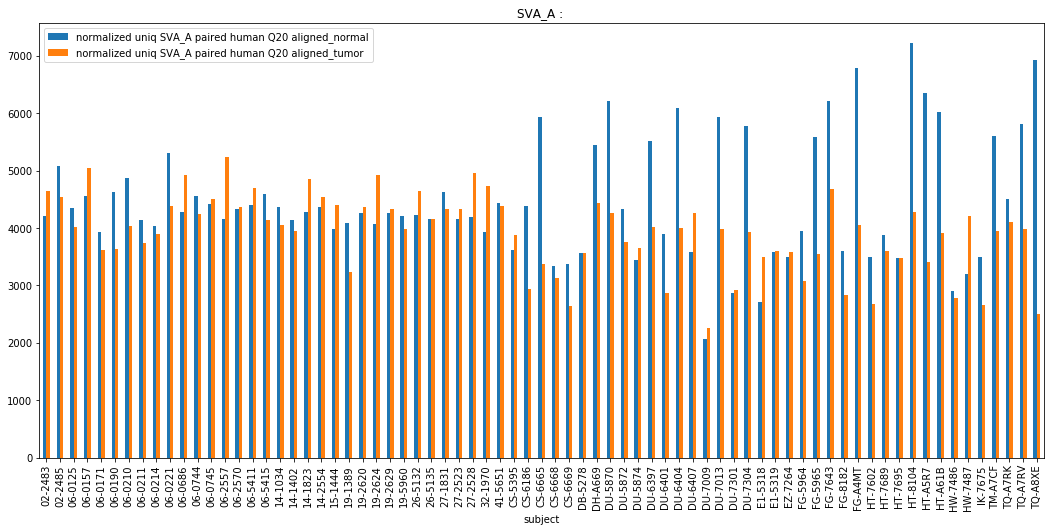

SVA_A:r10 


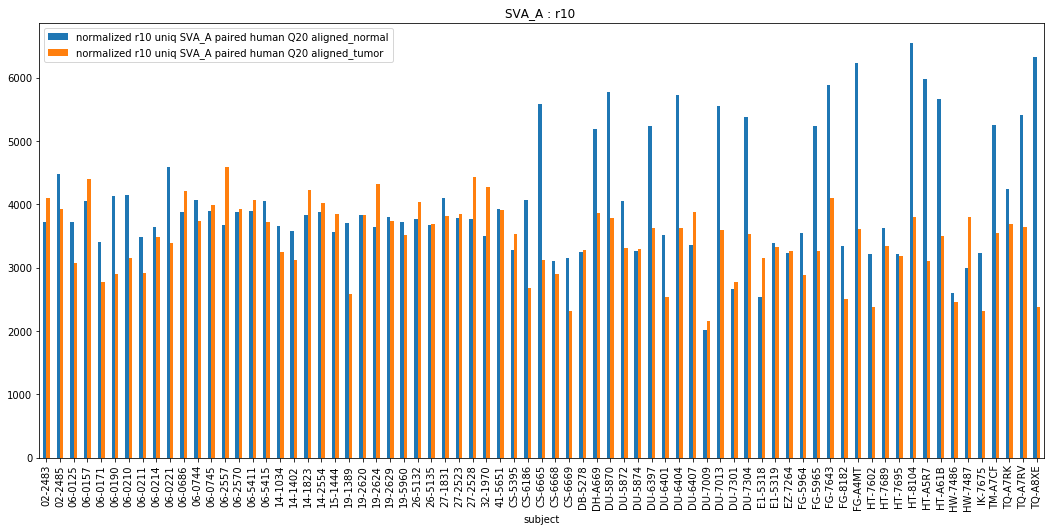

SVA_A:r100 


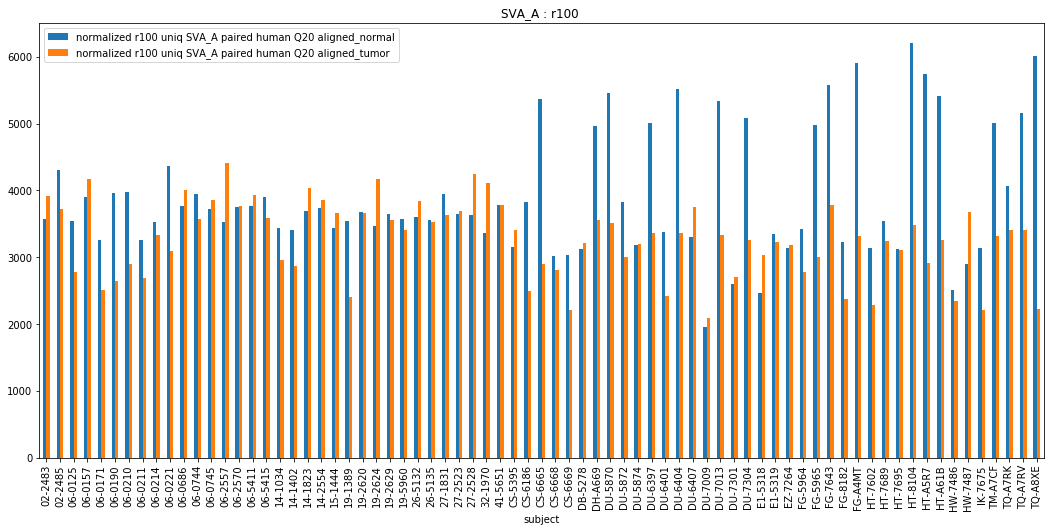

SVA_A:r1000 


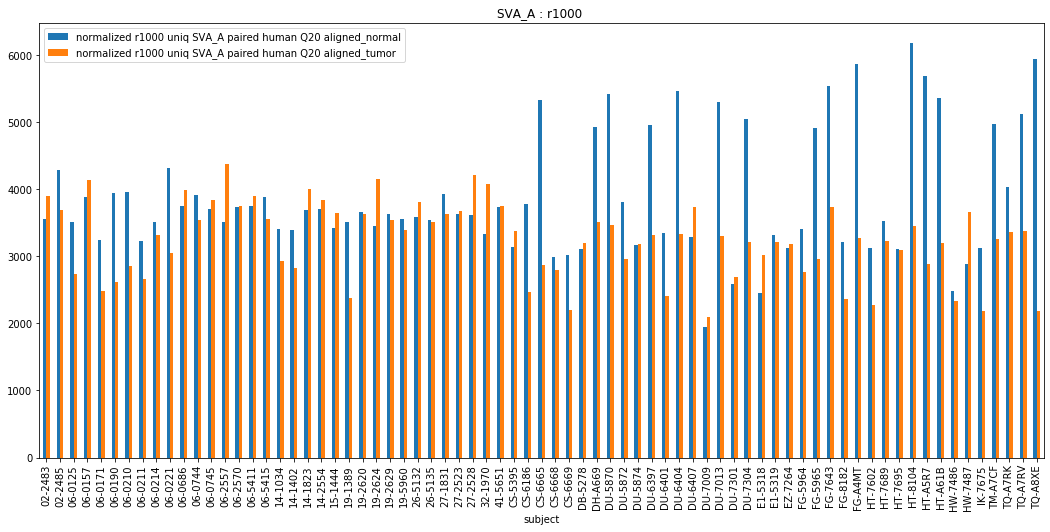

SVA_A:r10000 


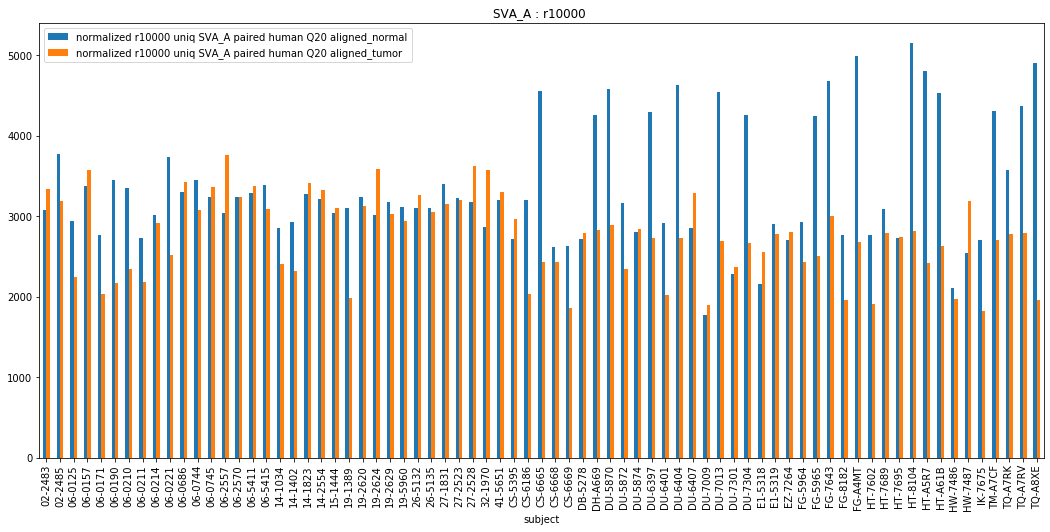

SVA_B:


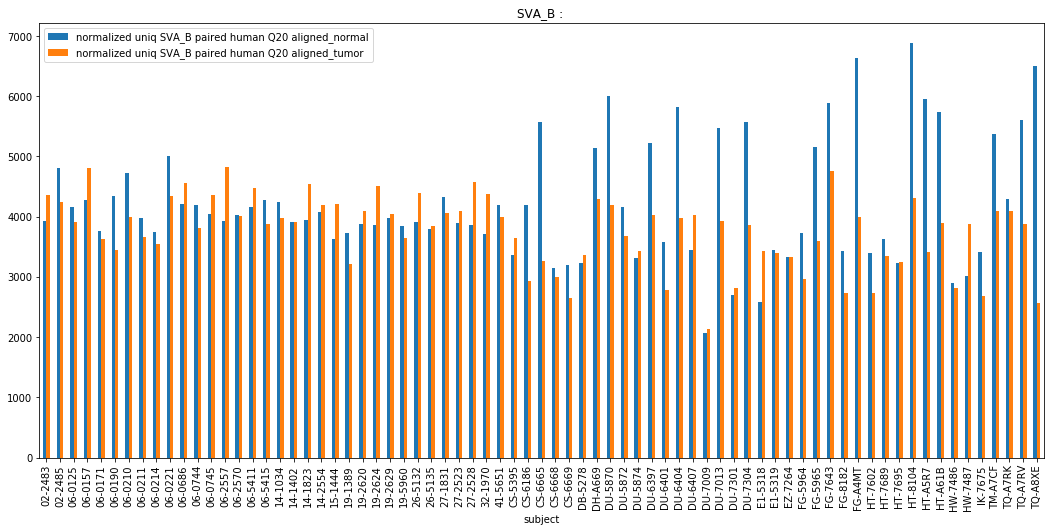

SVA_B:r10 


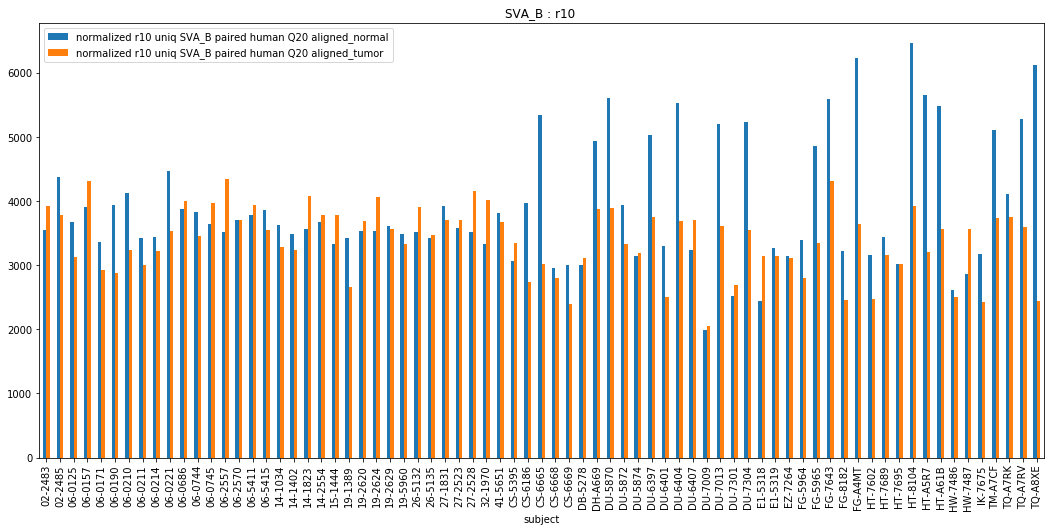

SVA_B:r100 


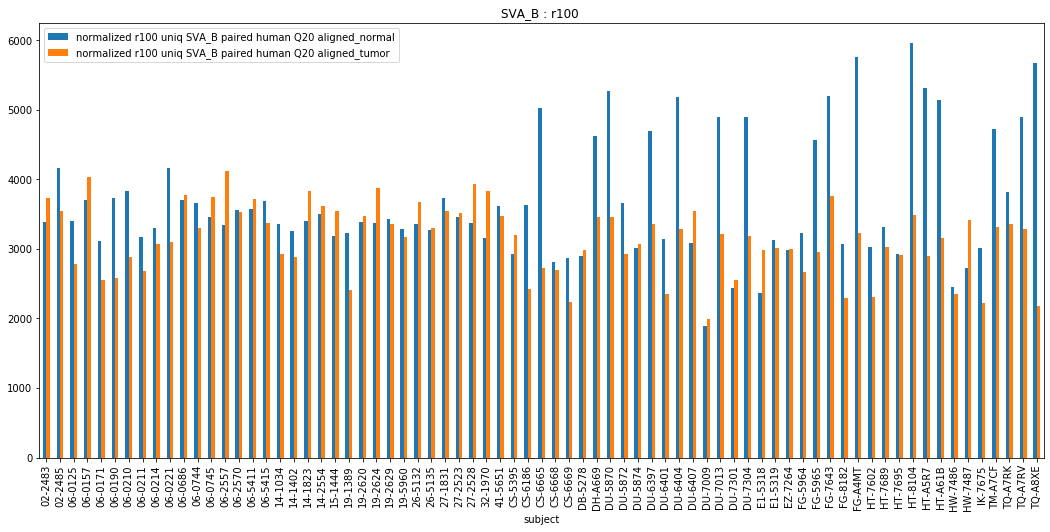

SVA_B:r1000 


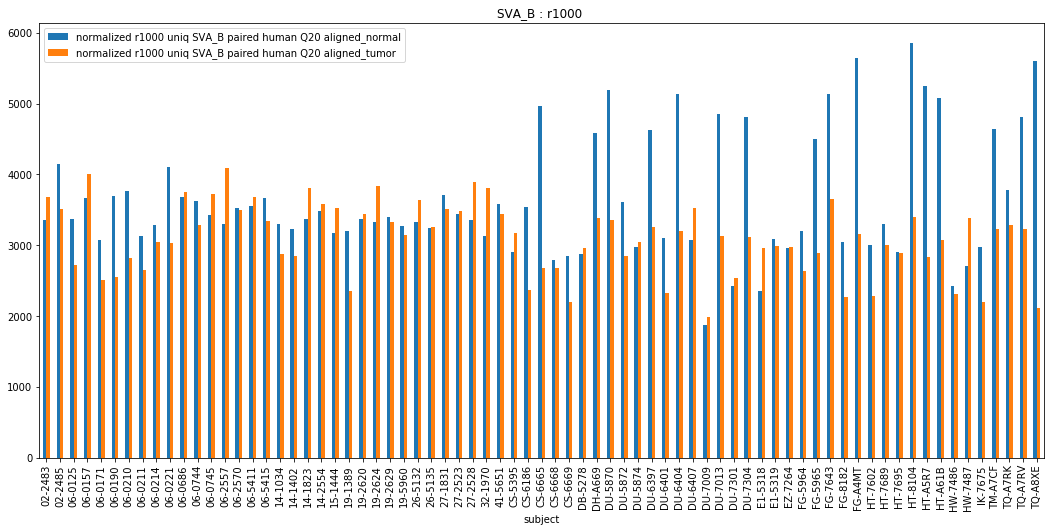

SVA_B:r10000 


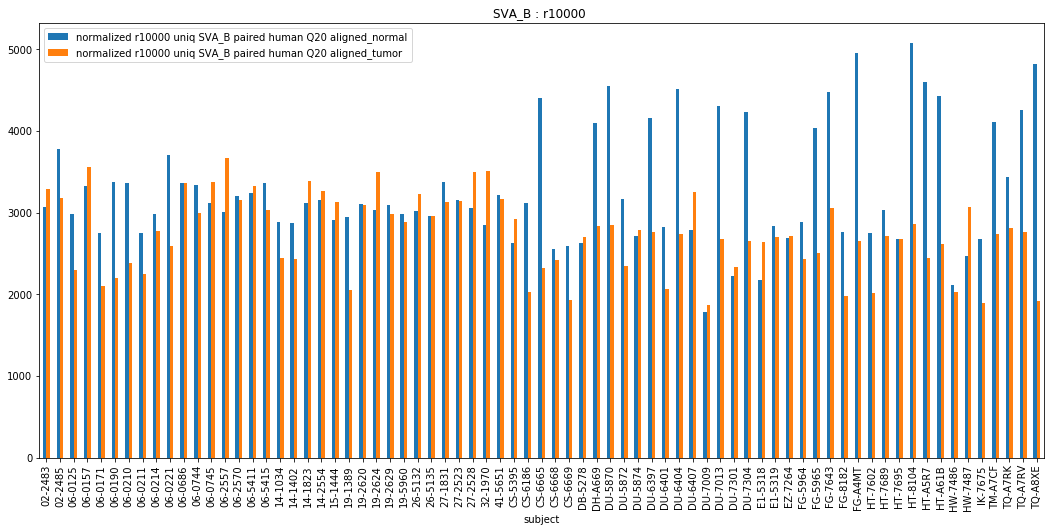

SVA_C:


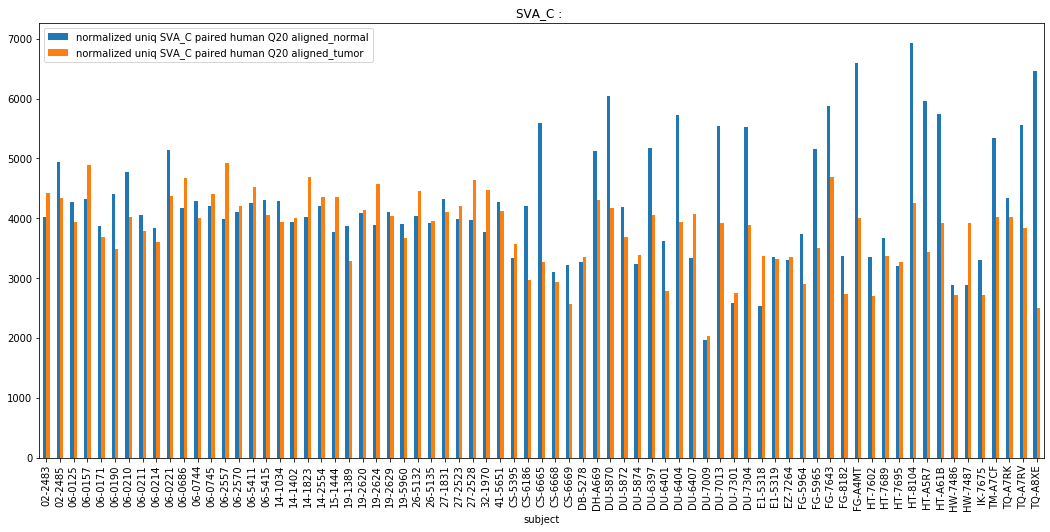

SVA_C:r10 


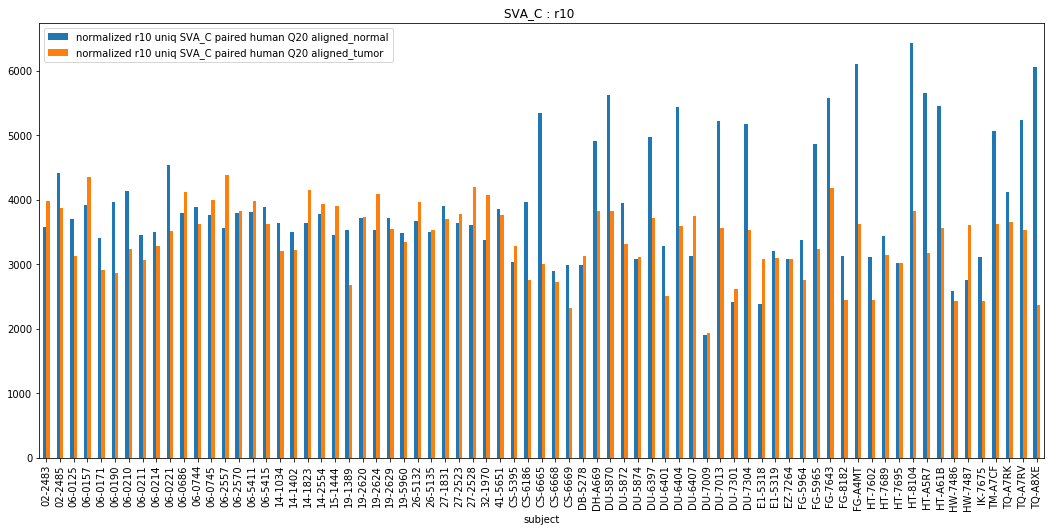

SVA_C:r100 


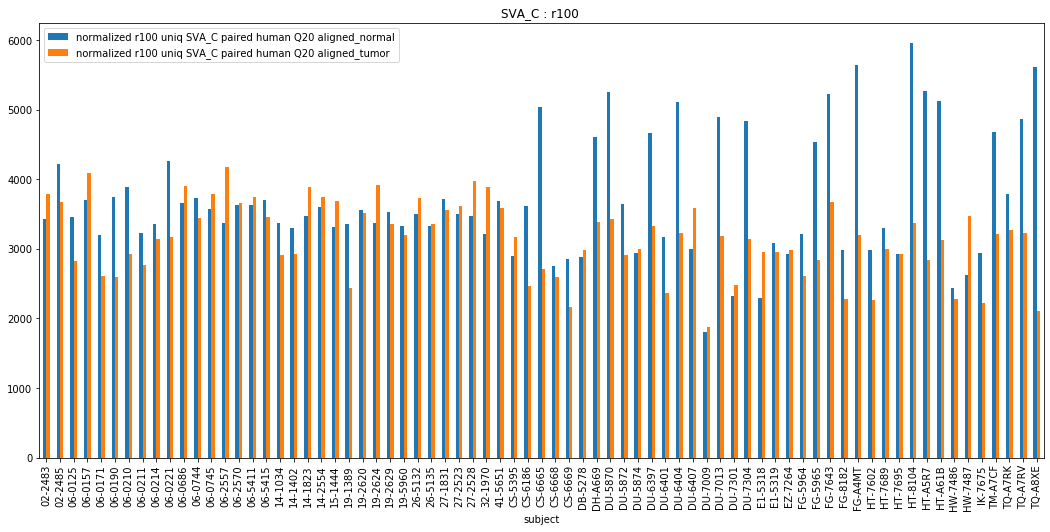

SVA_C:r1000 


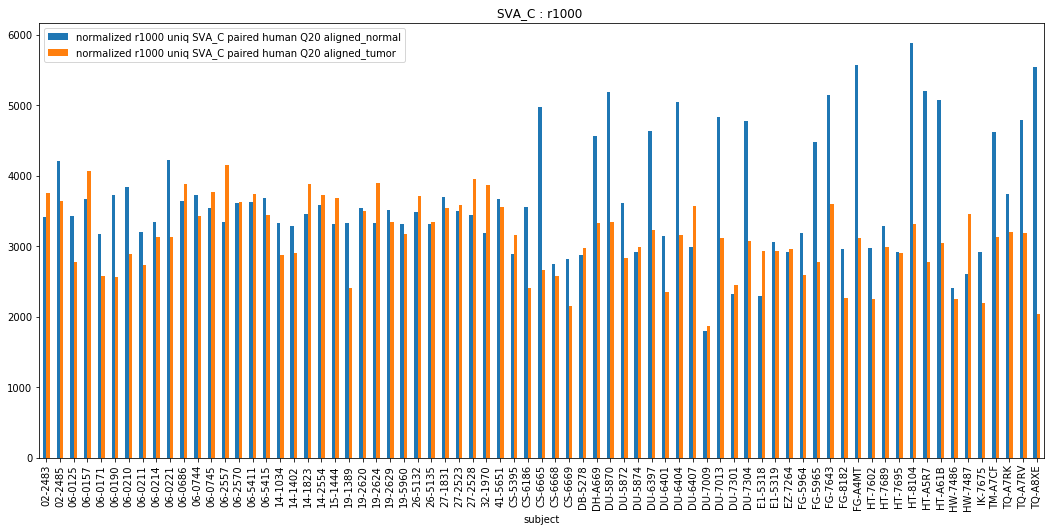

SVA_C:r10000 


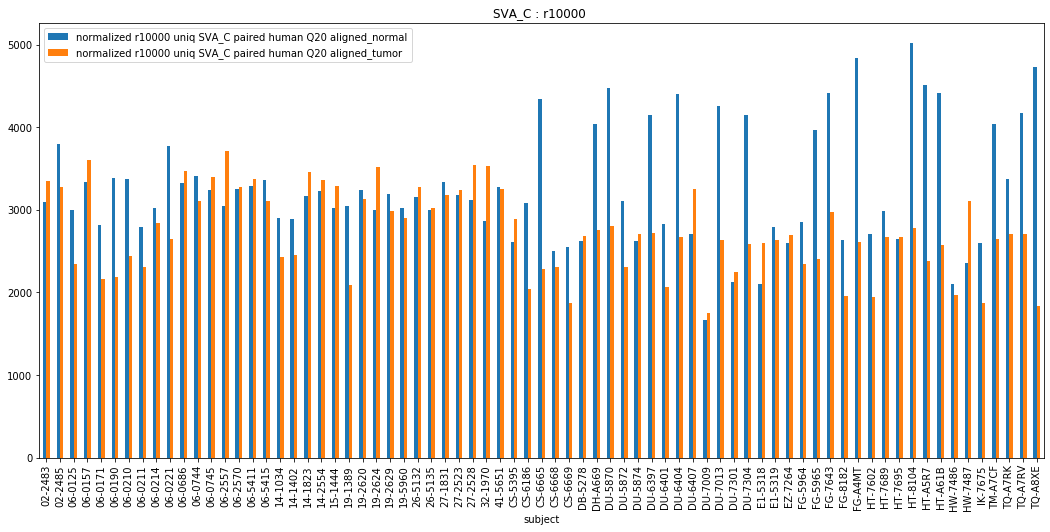

SVA_D:


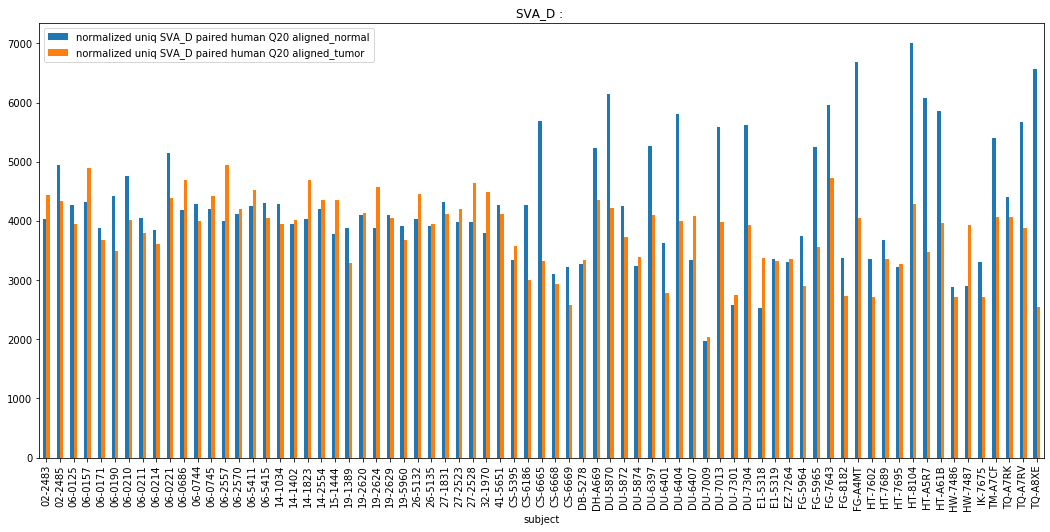

SVA_D:r10 


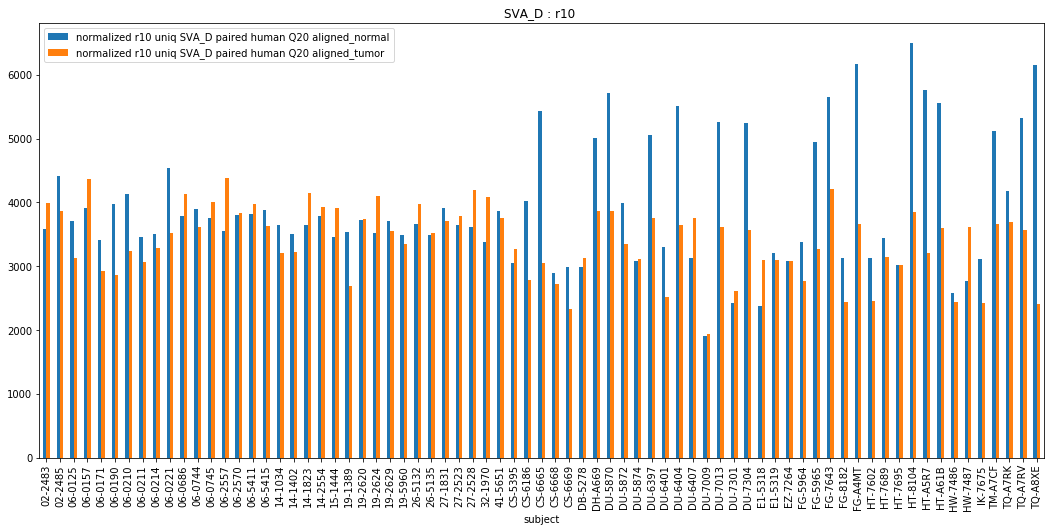

SVA_D:r100 


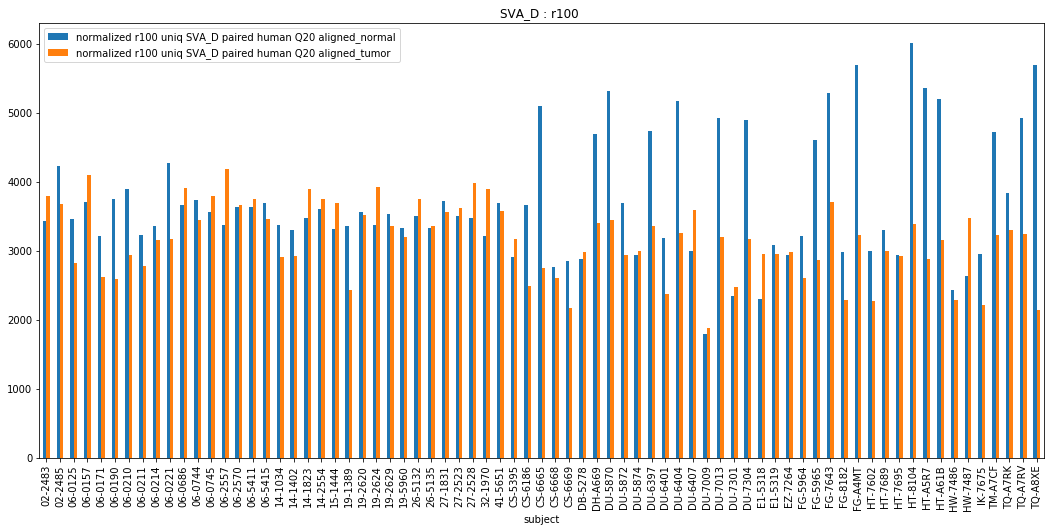

SVA_D:r1000 


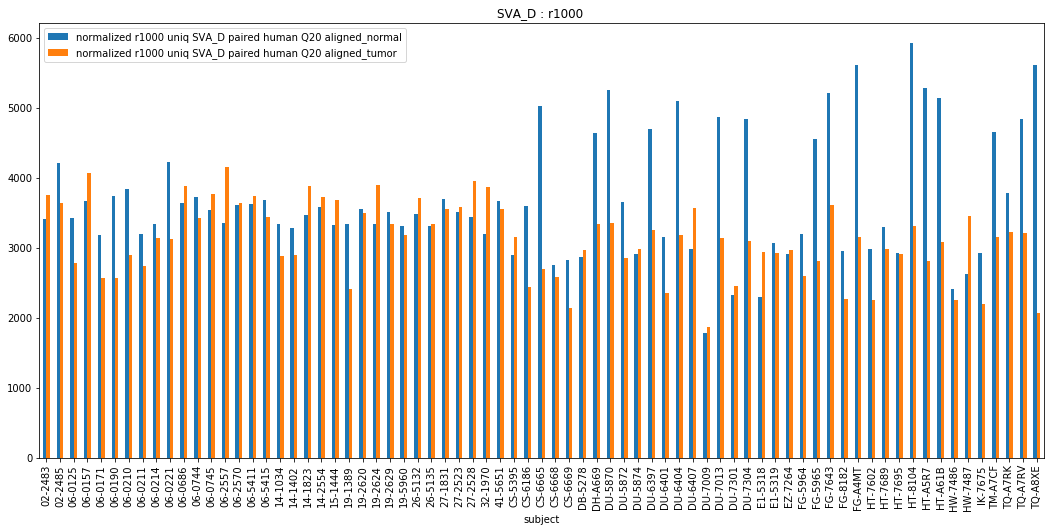

SVA_D:r10000 


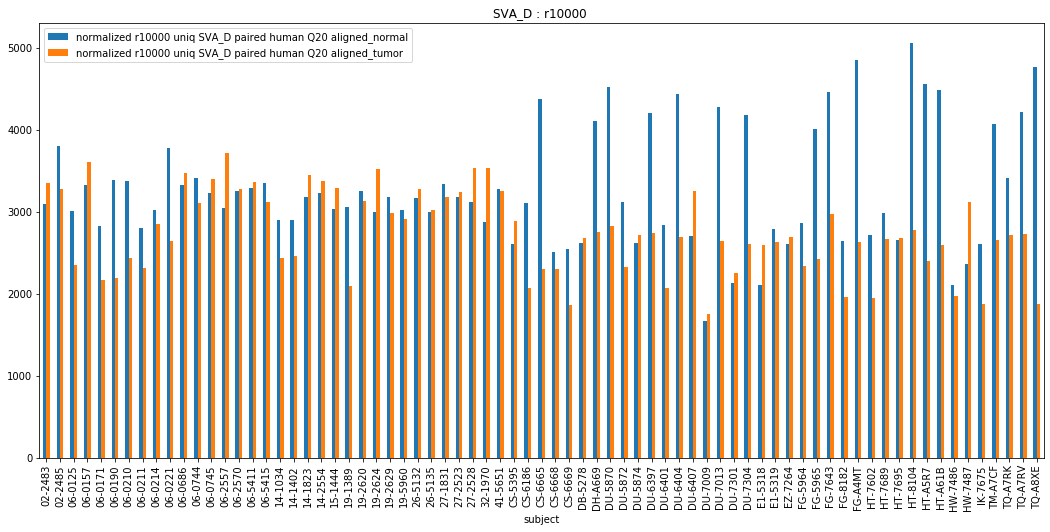

SVA_E:


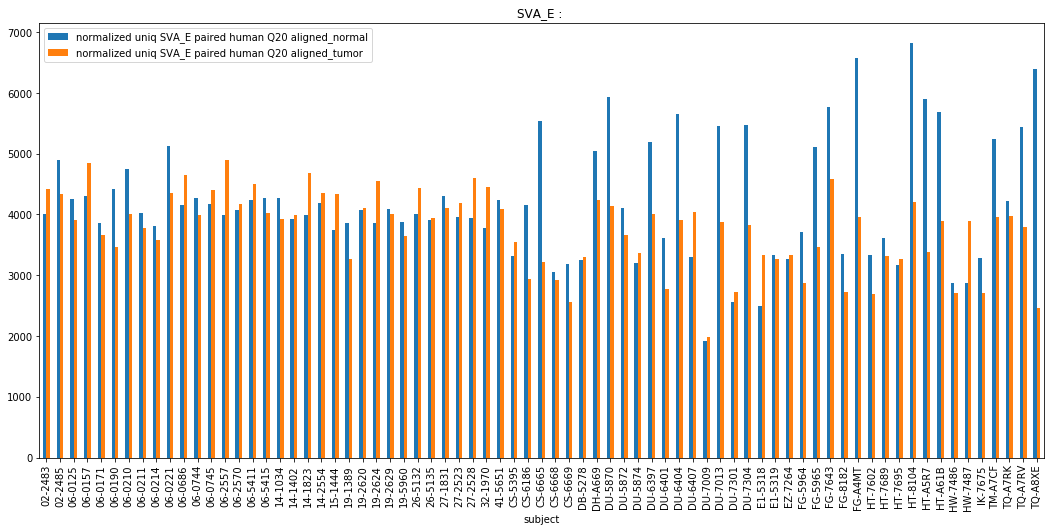

SVA_E:r10 


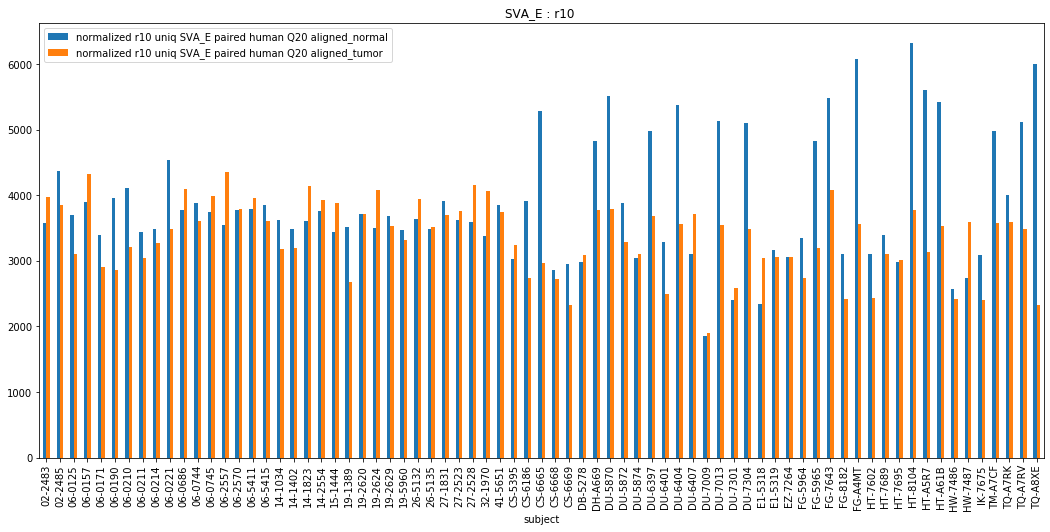

SVA_E:r100 


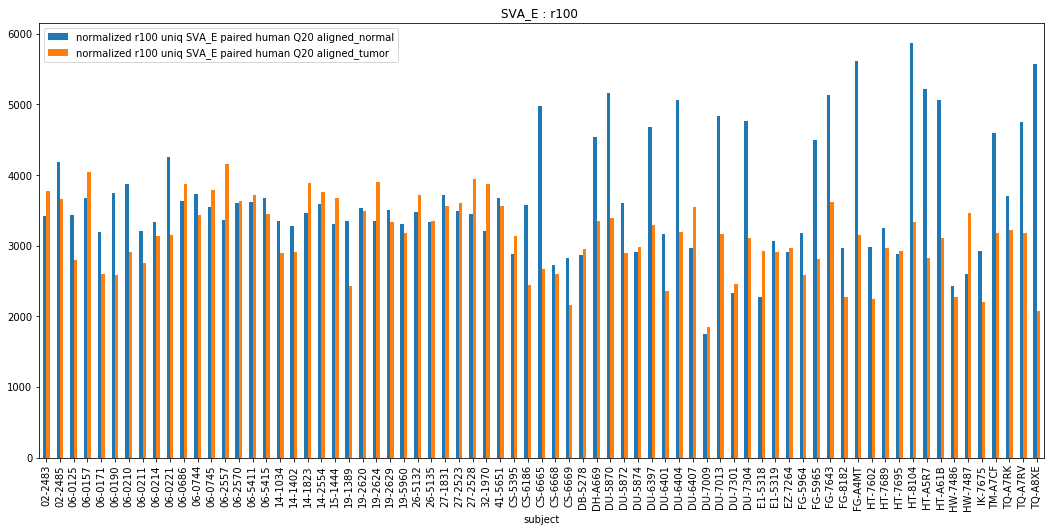

SVA_E:r1000 


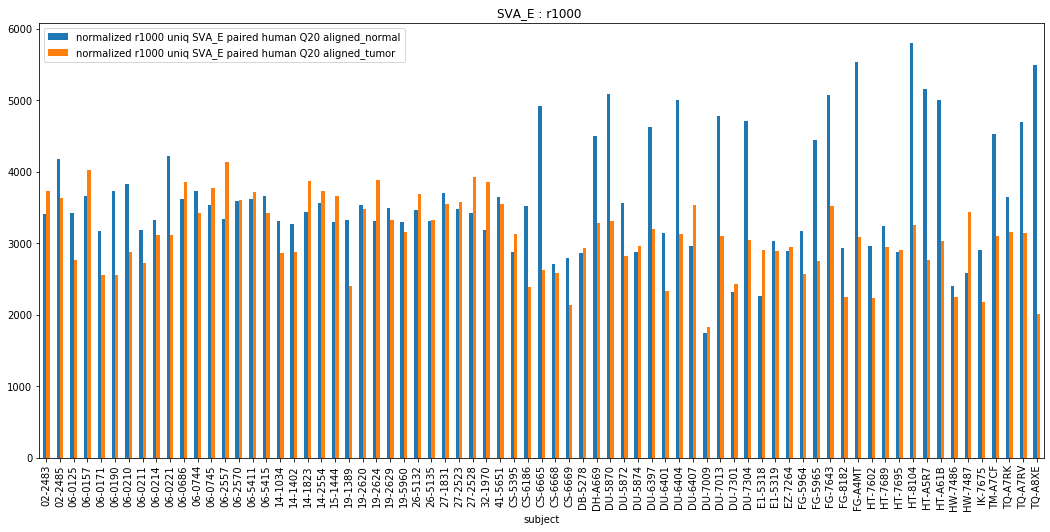

SVA_E:r10000 


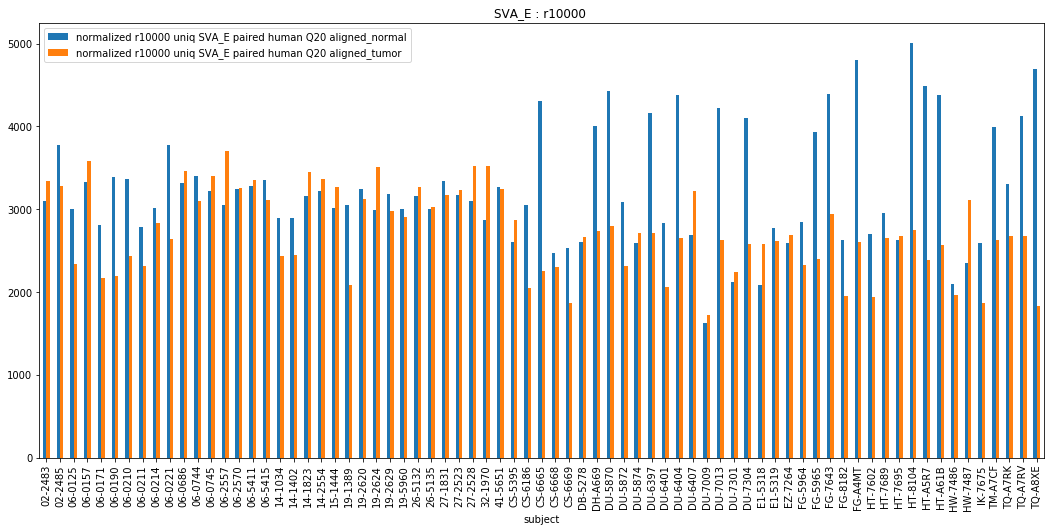

SVA_F:


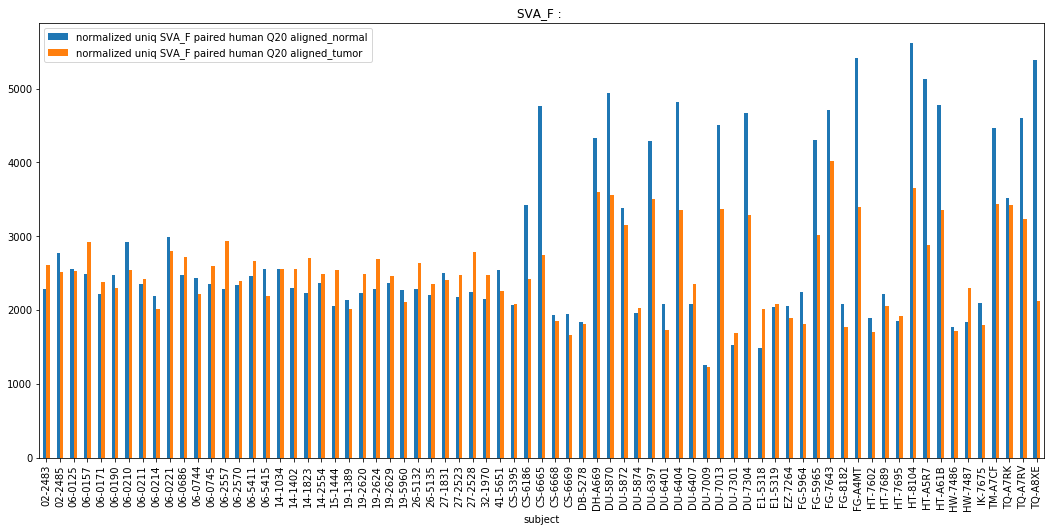

SVA_F:r10 


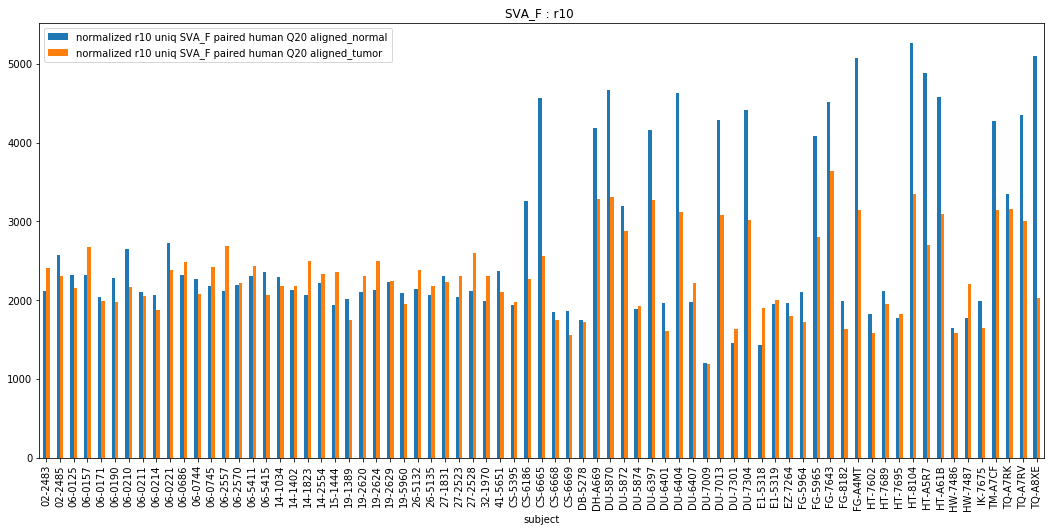

SVA_F:r100 


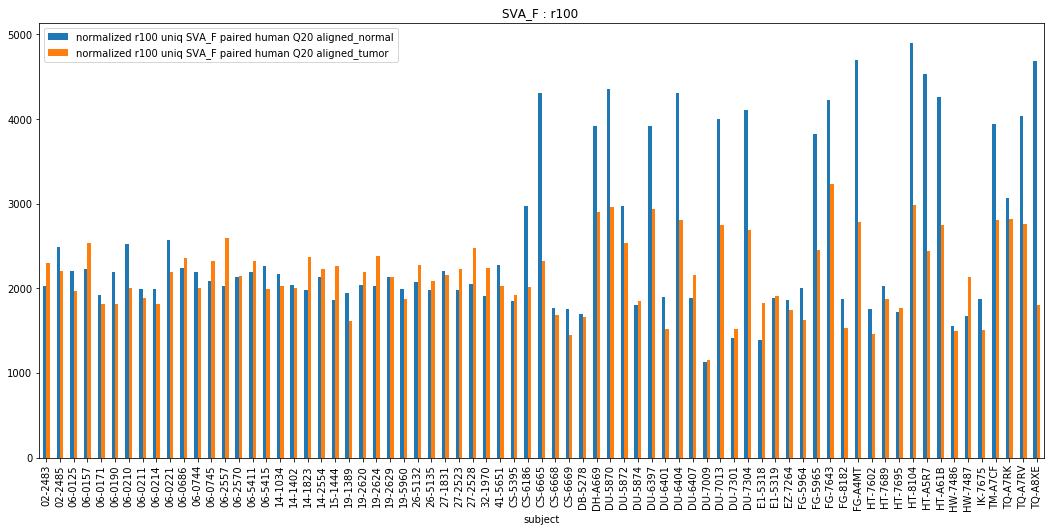

SVA_F:r1000 


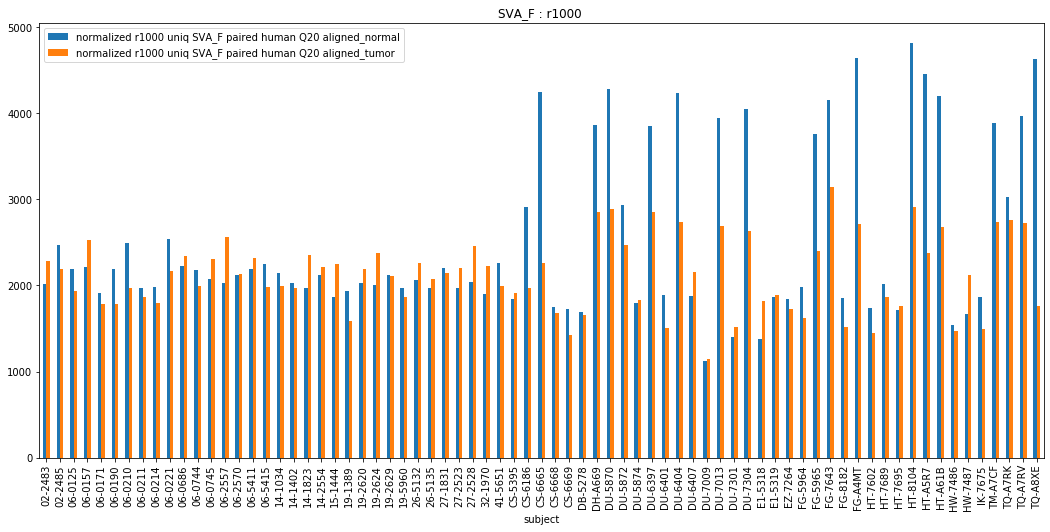

SVA_F:r10000 


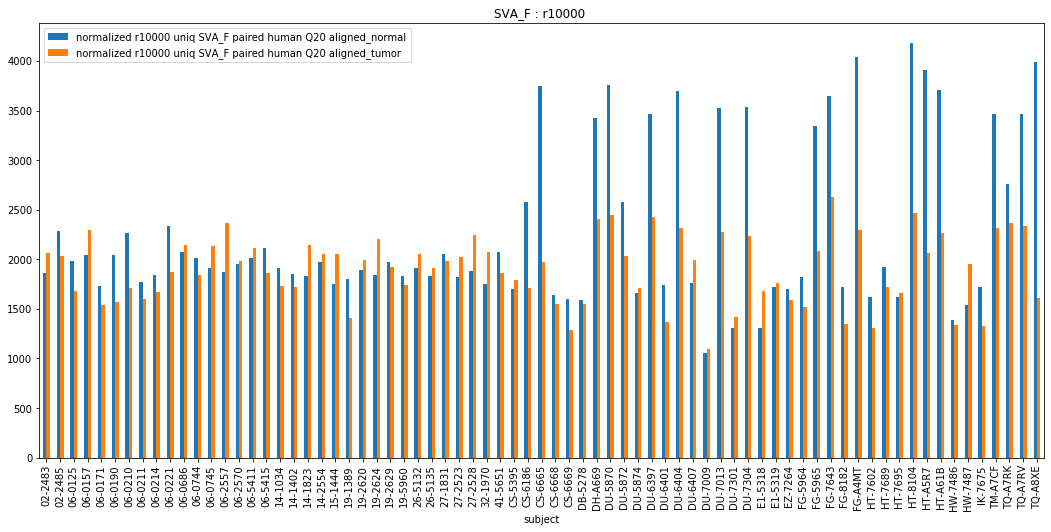

In [107]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+":"+s)
        tn.plot(x='subject',y=['normalized '+s+'uniq '+hkle+' paired human Q20 aligned_normal',
                          'normalized '+s+'uniq '+hkle+' paired human Q20 aligned_tumor'],
                title=hkle+" : "+s,
            kind='bar')
        plt.show()

In [108]:
df.loc[df['sample'].str.contains("-01.$"), 'tn'] = 'tumor'  
df.loc[df['sample'].str.contains("-10.$"), 'tn'] = 'normal'  

In [109]:
import numpy as np
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)                 

In [110]:
df[['tn','sample']].head() 

tn       sample
0   tumor  02-2483-01A
1  normal  02-2483-10A
2   tumor  02-2485-01A
3  normal  02-2485-10A
4   tumor  06-0125-01A

HERVK113:


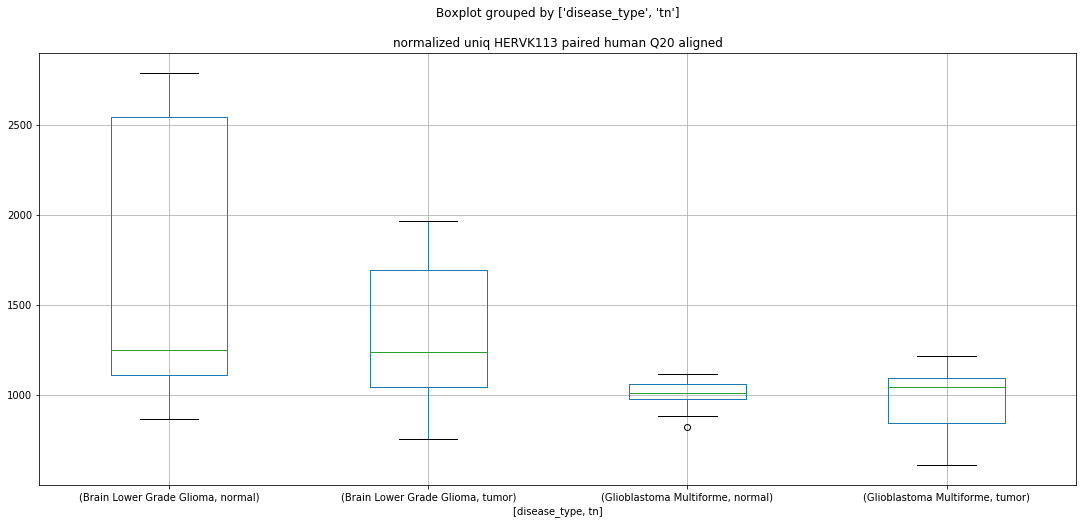

HERVK113:r10 


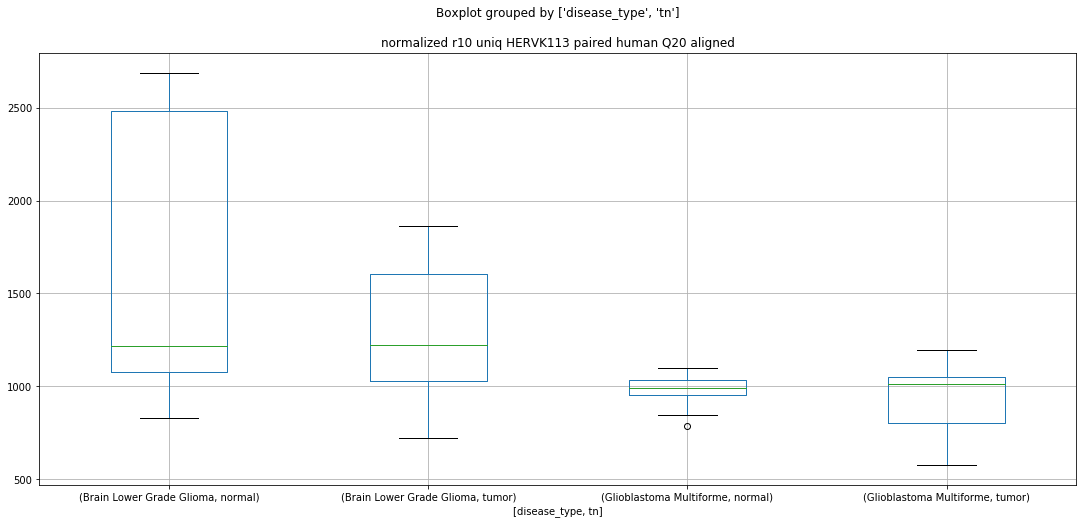

HERVK113:r100 


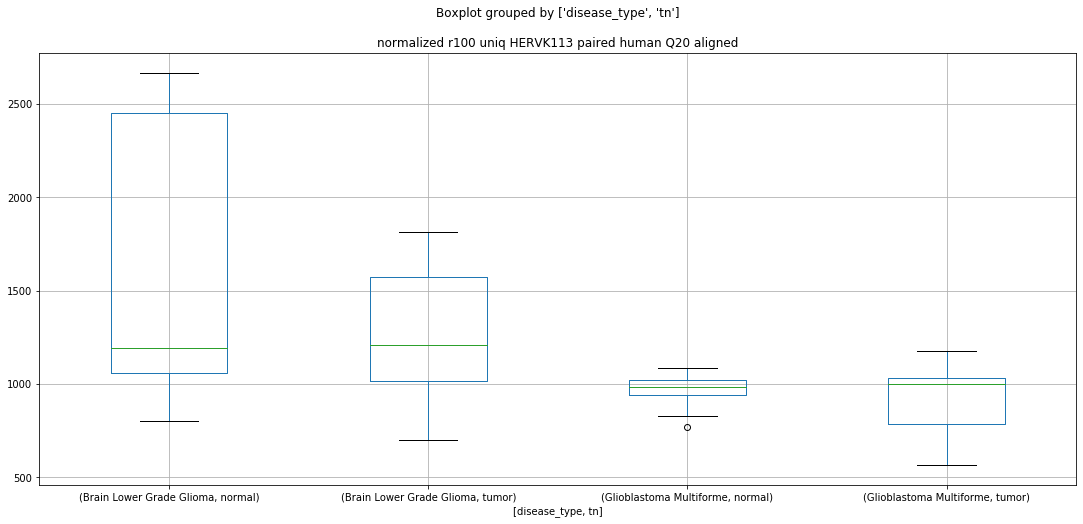

HERVK113:r1000 


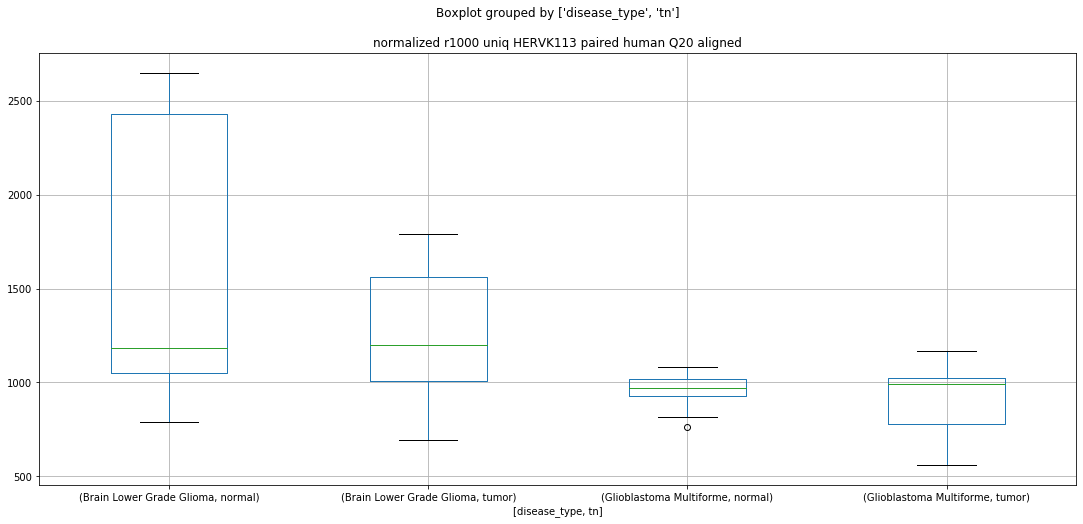

HERVK113:r10000 


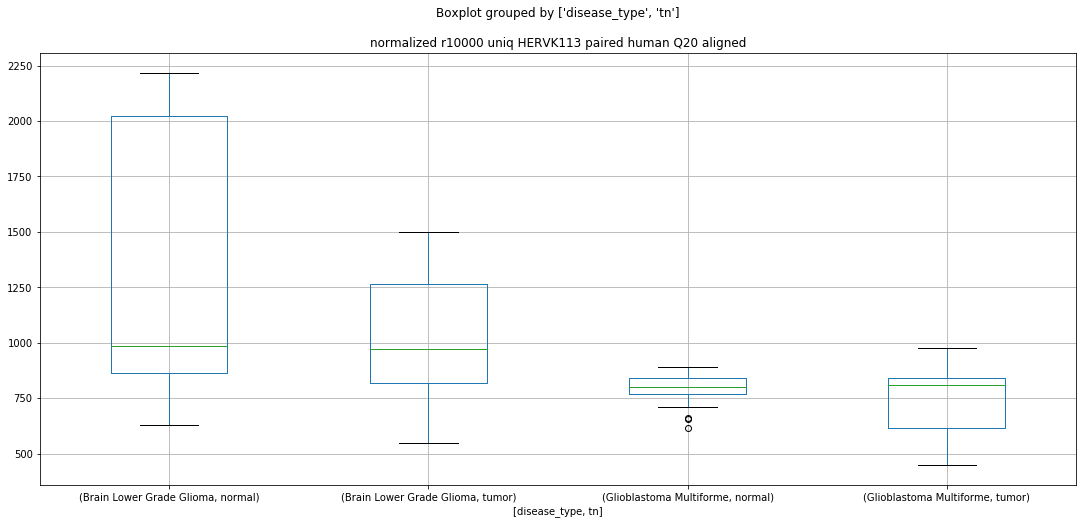

SVA_A:


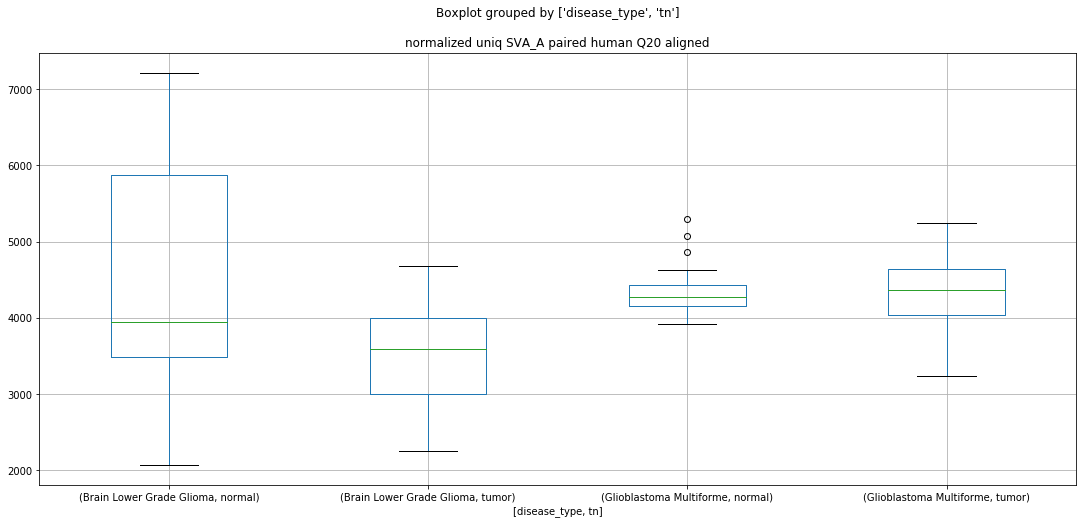

SVA_A:r10 


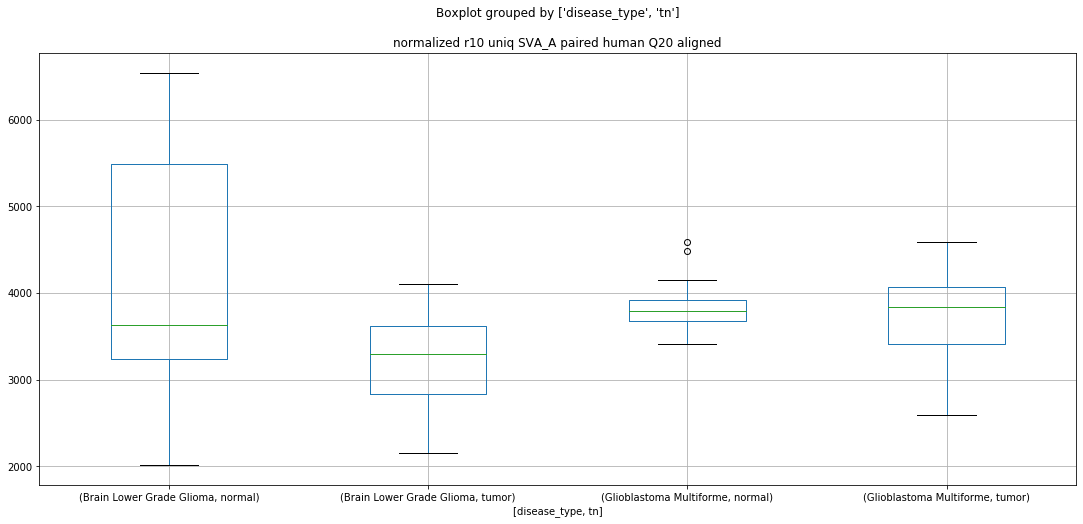

SVA_A:r100 


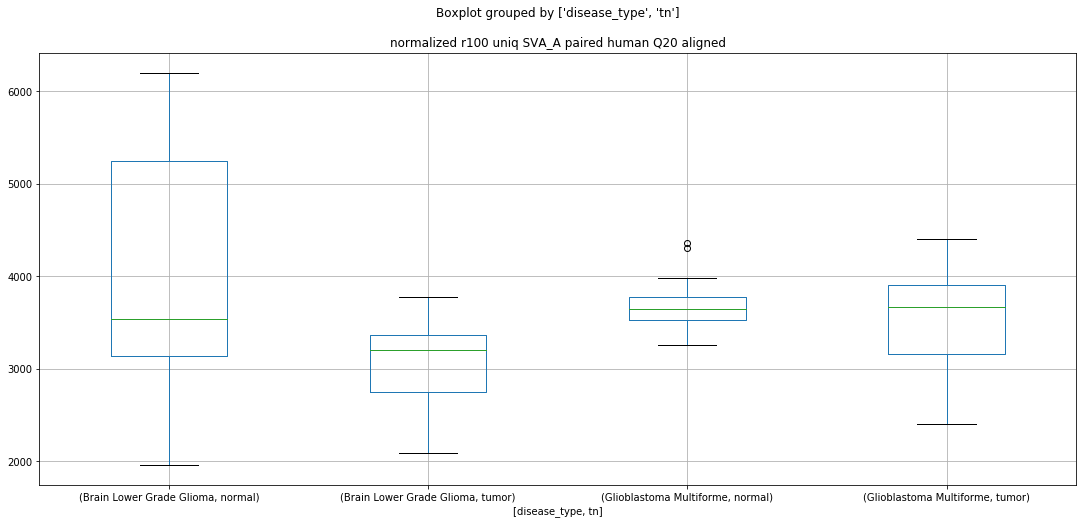

SVA_A:r1000 


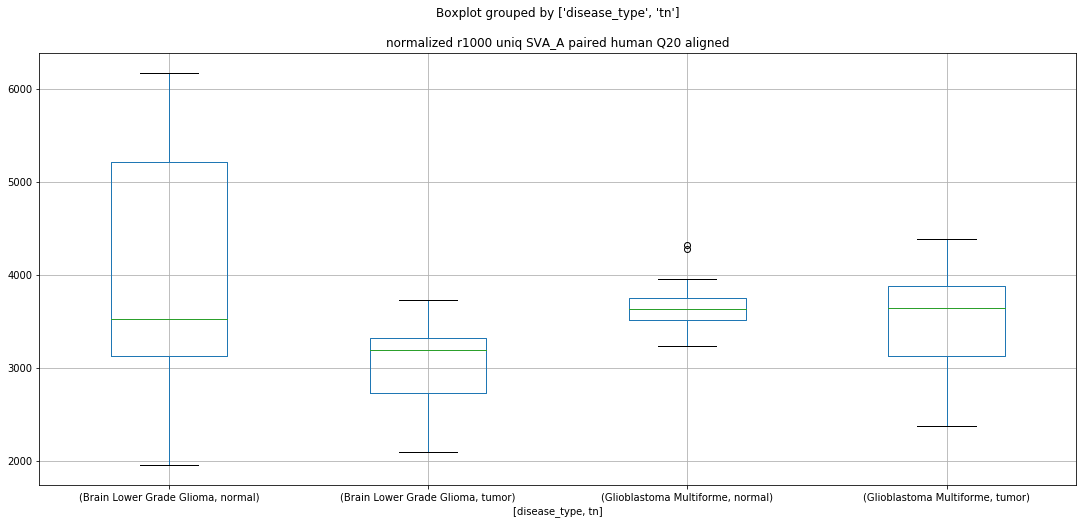

SVA_A:r10000 


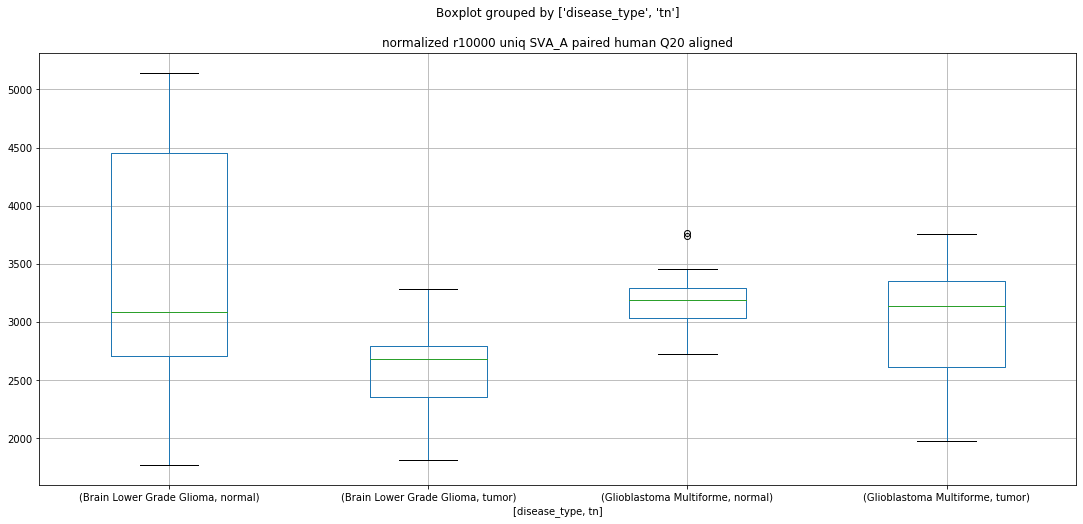

SVA_B:


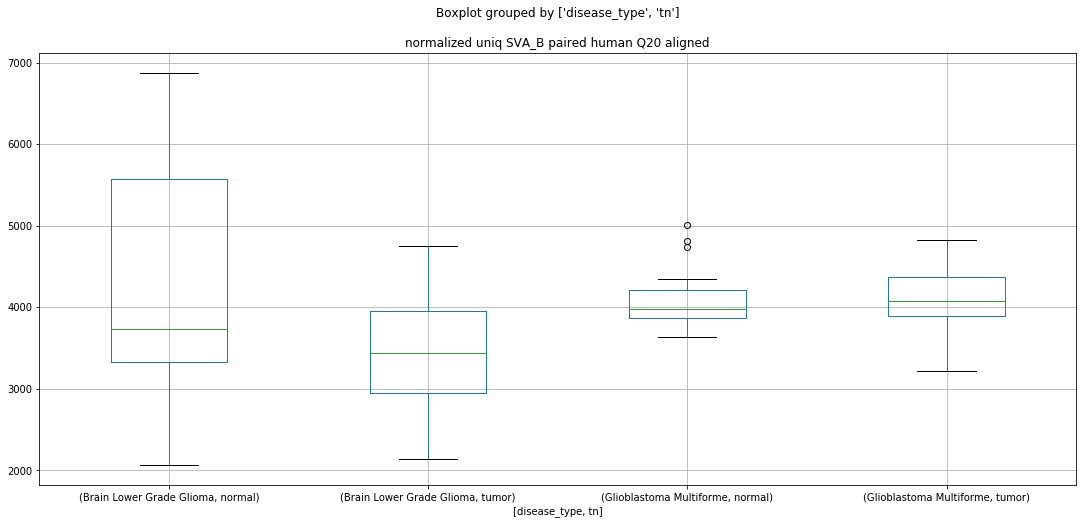

SVA_B:r10 


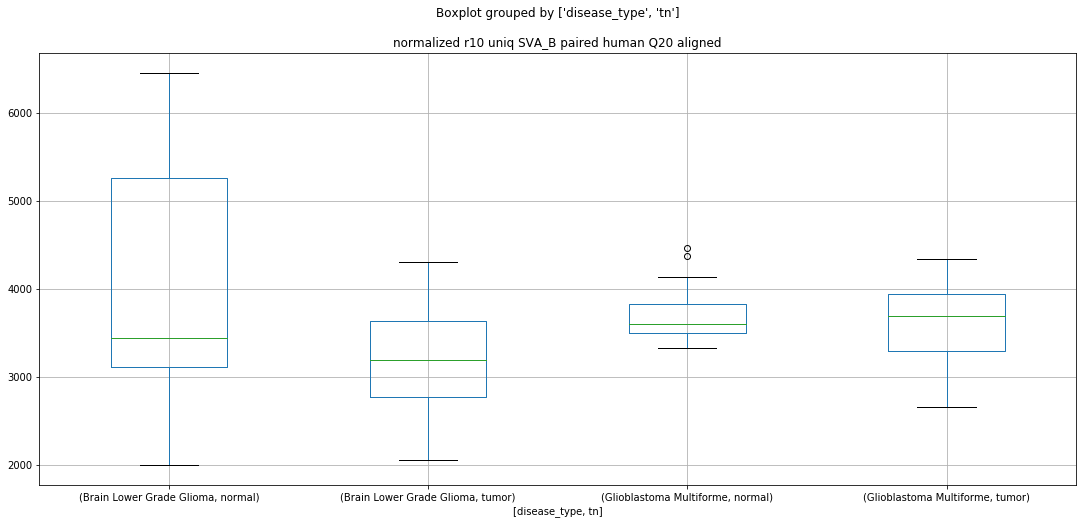

SVA_B:r100 


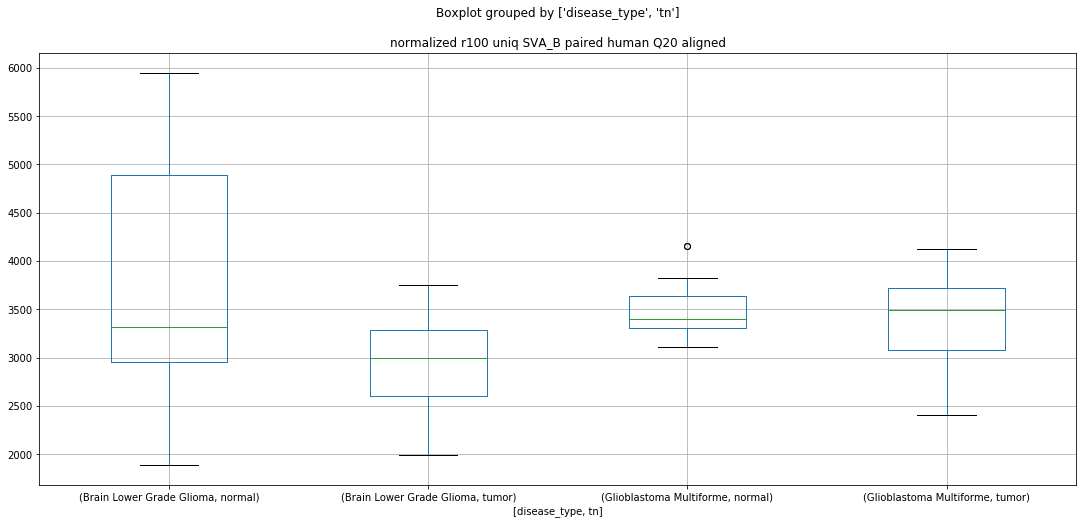

SVA_B:r1000 


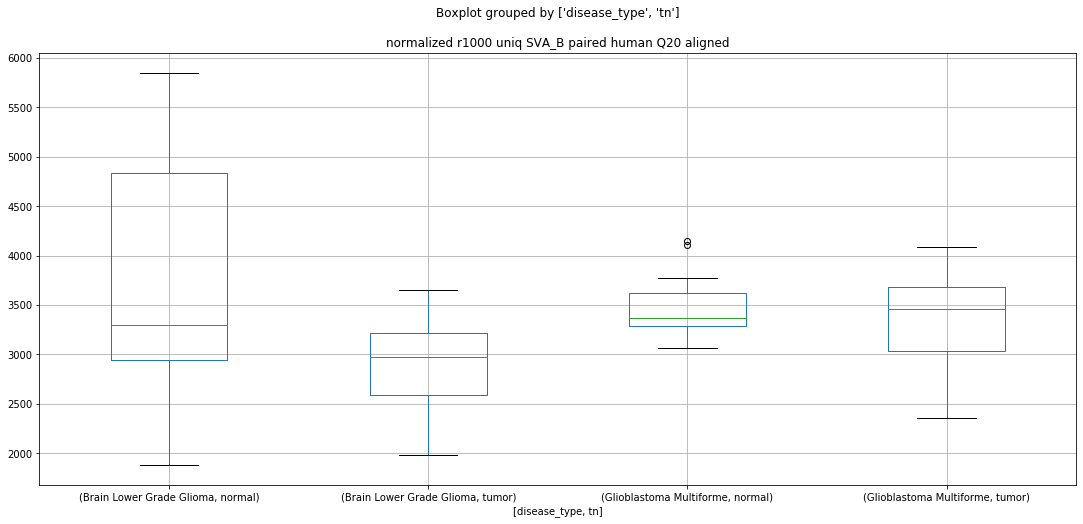

SVA_B:r10000 


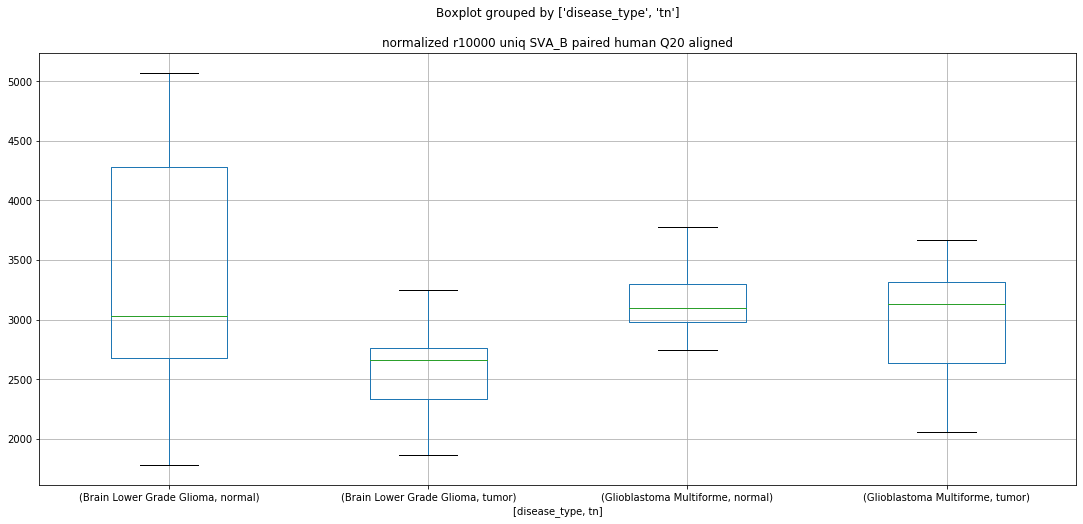

SVA_C:


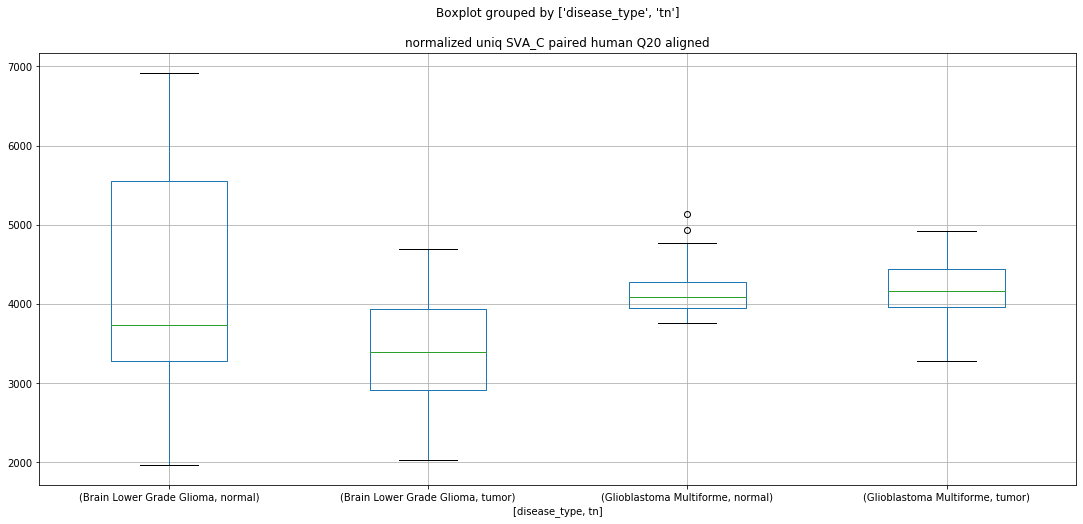

SVA_C:r10 


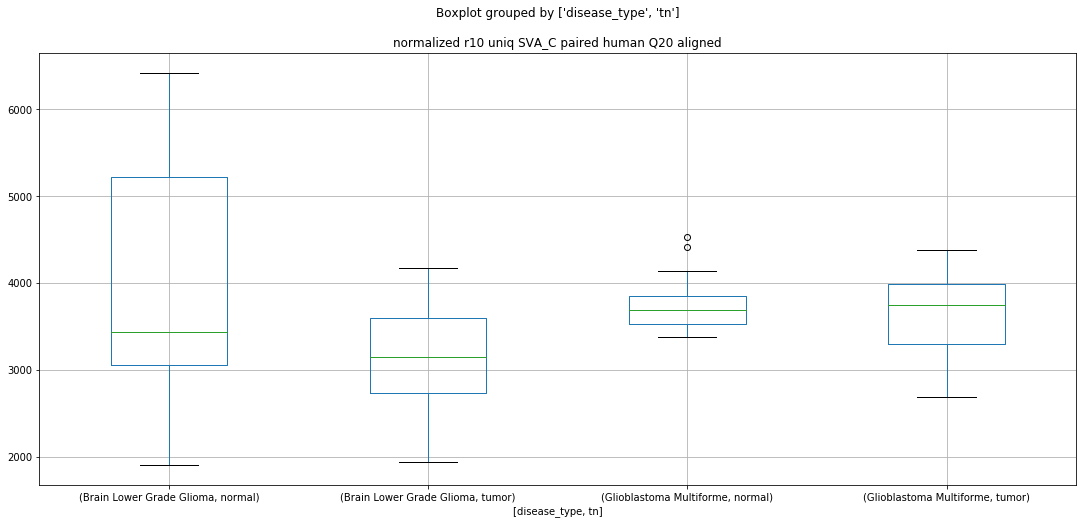

SVA_C:r100 


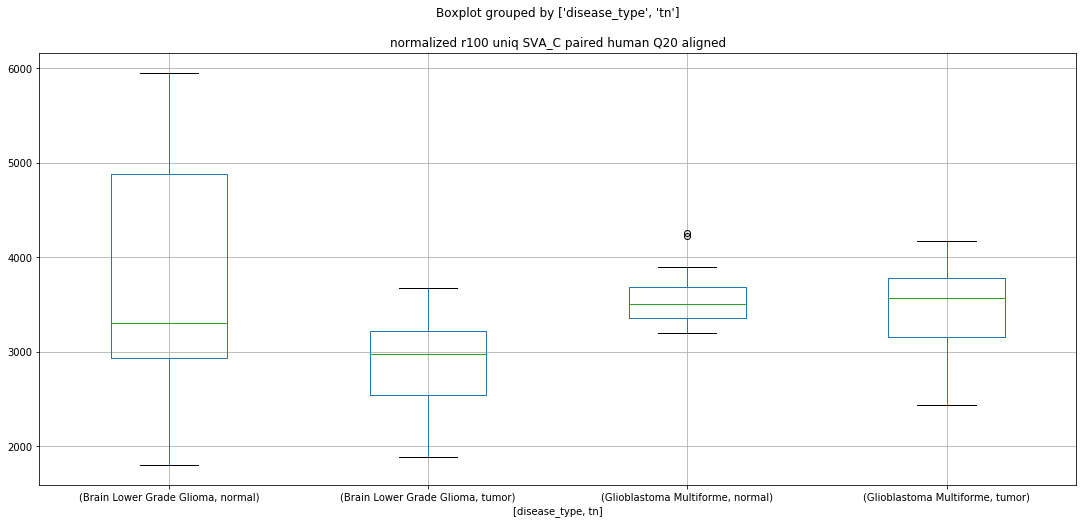

SVA_C:r1000 


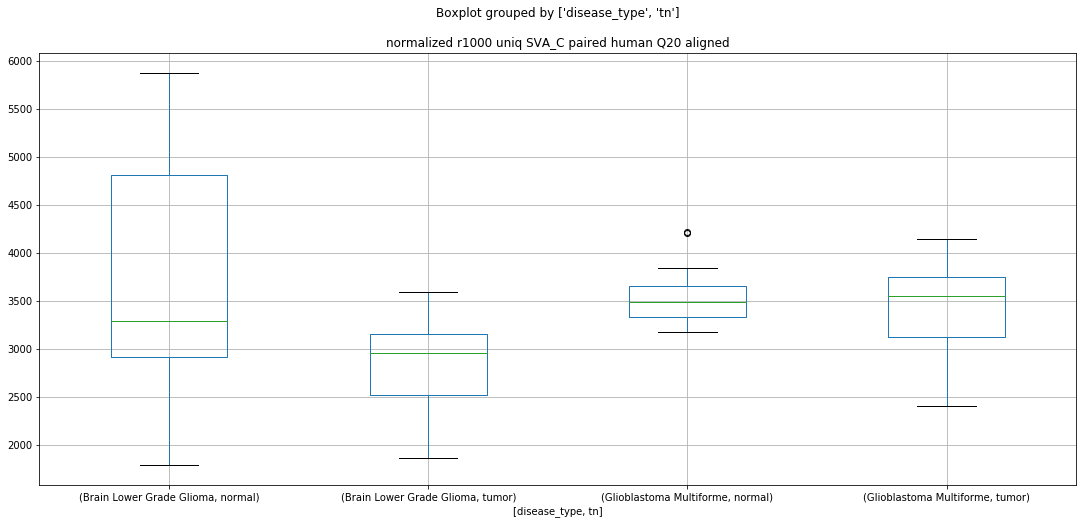

SVA_C:r10000 


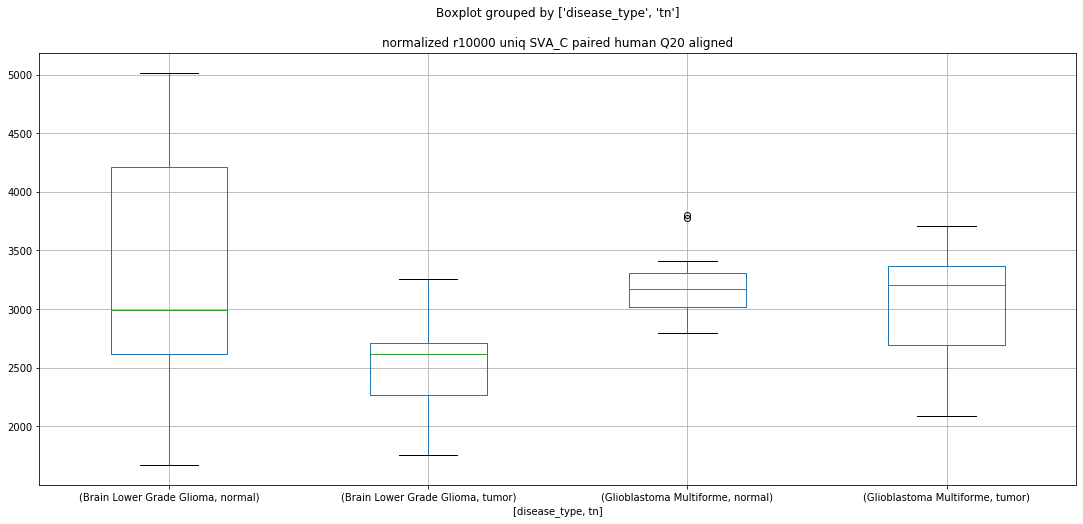

SVA_D:


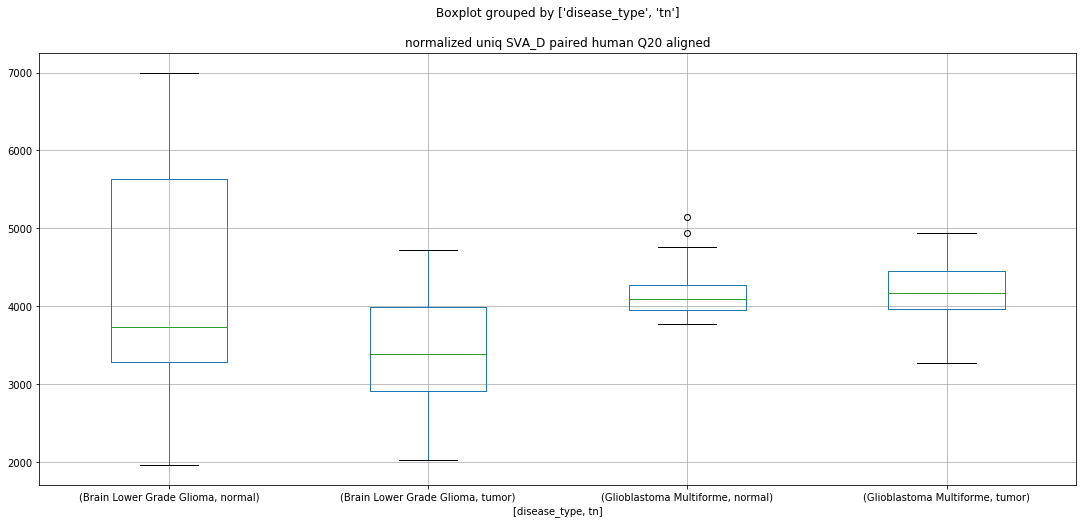

SVA_D:r10 


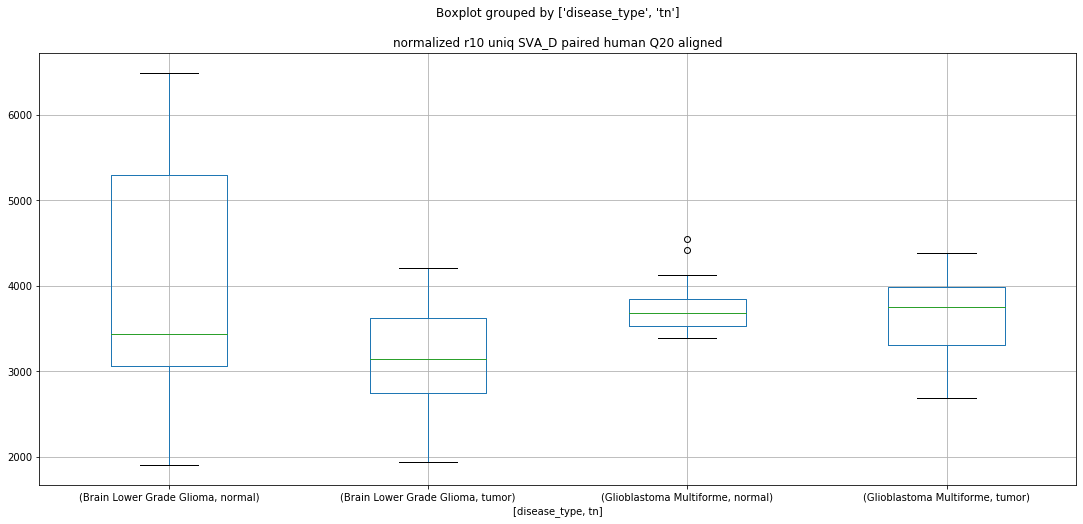

SVA_D:r100 


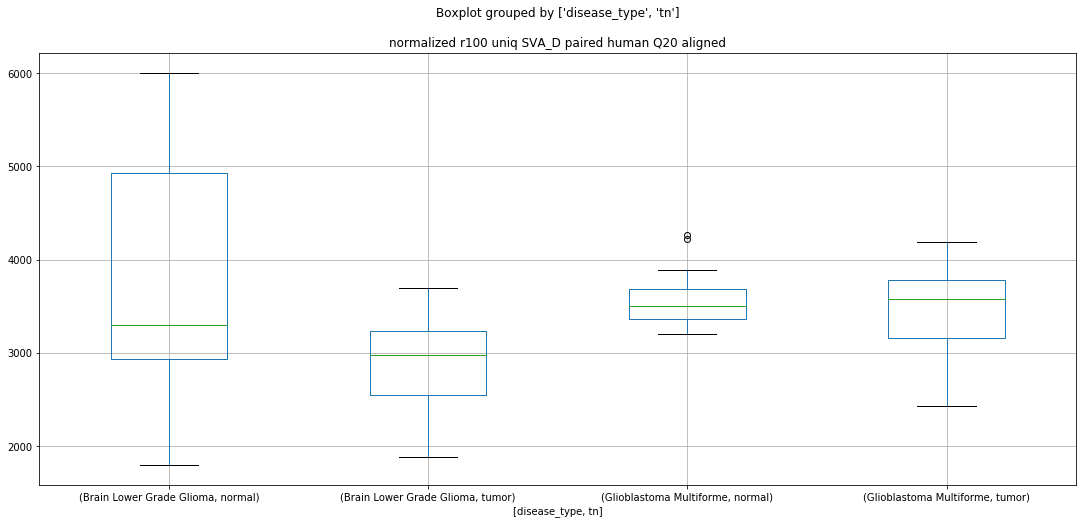

SVA_D:r1000 


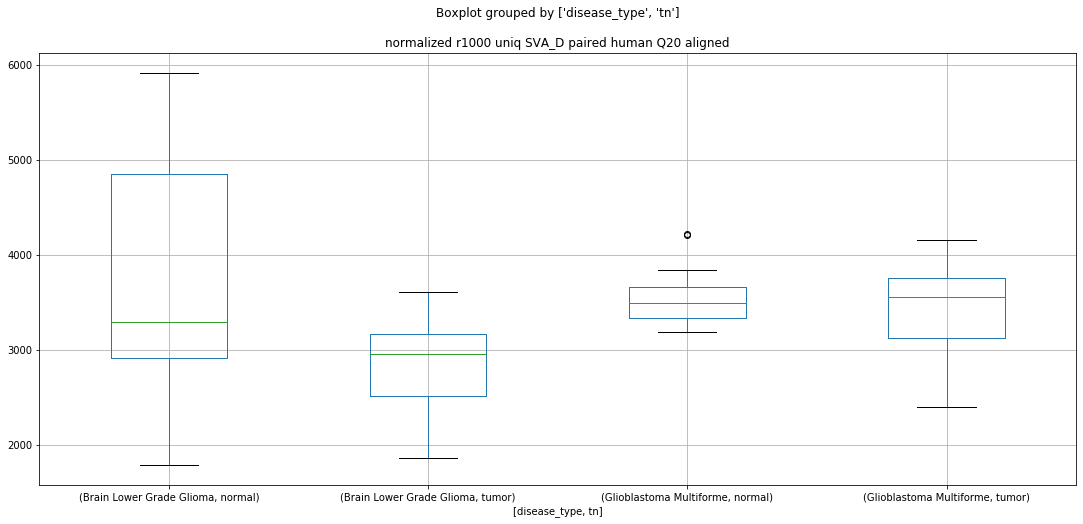

SVA_D:r10000 


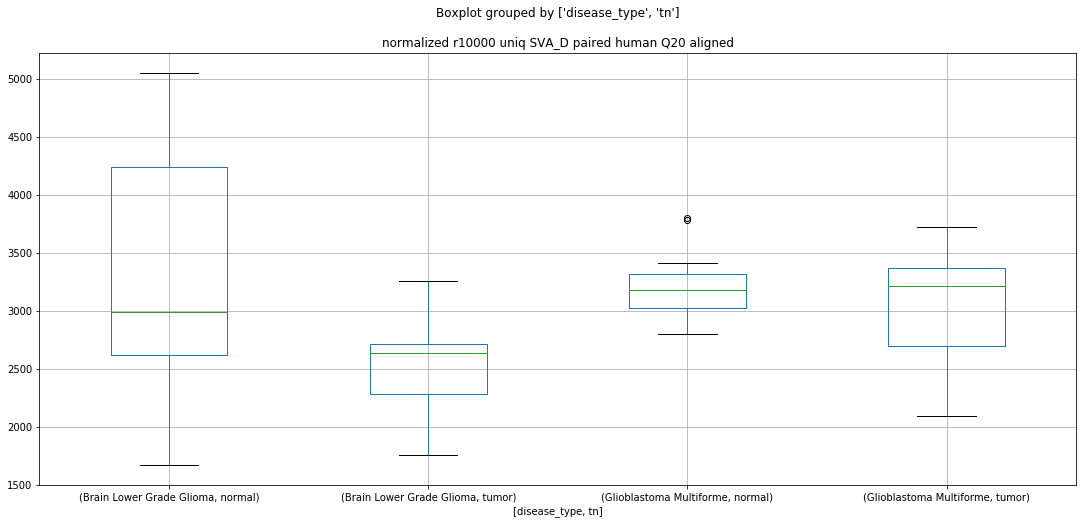

SVA_E:


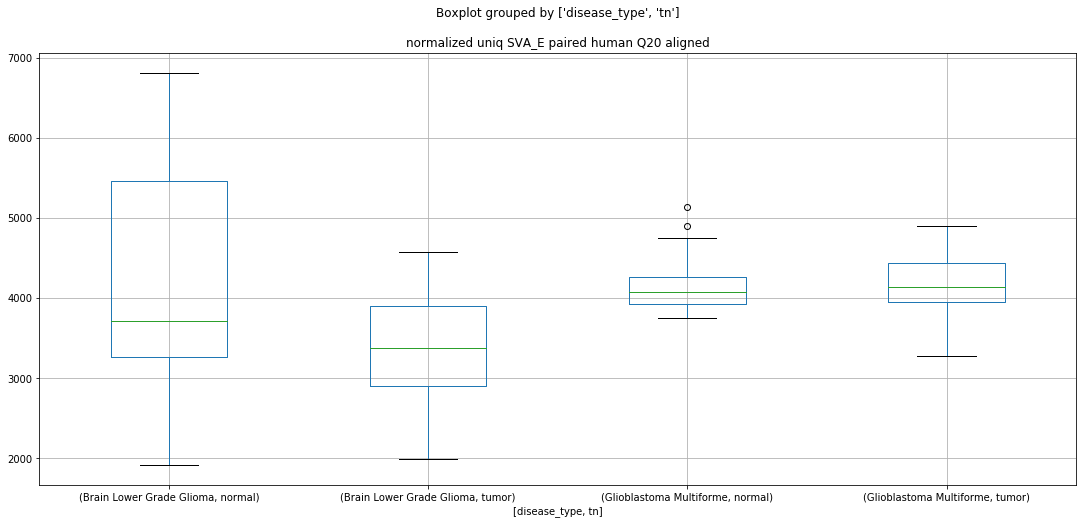

SVA_E:r10 


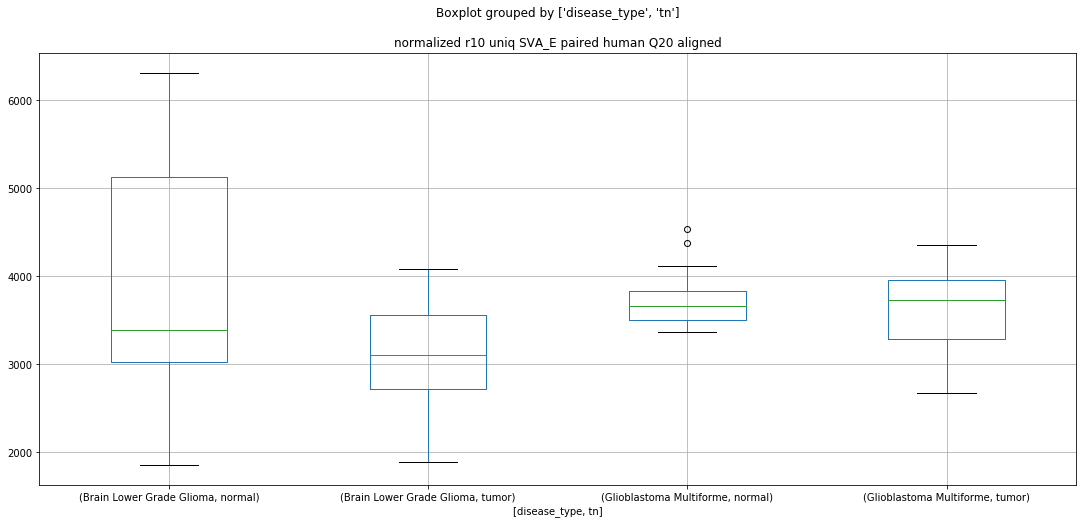

SVA_E:r100 


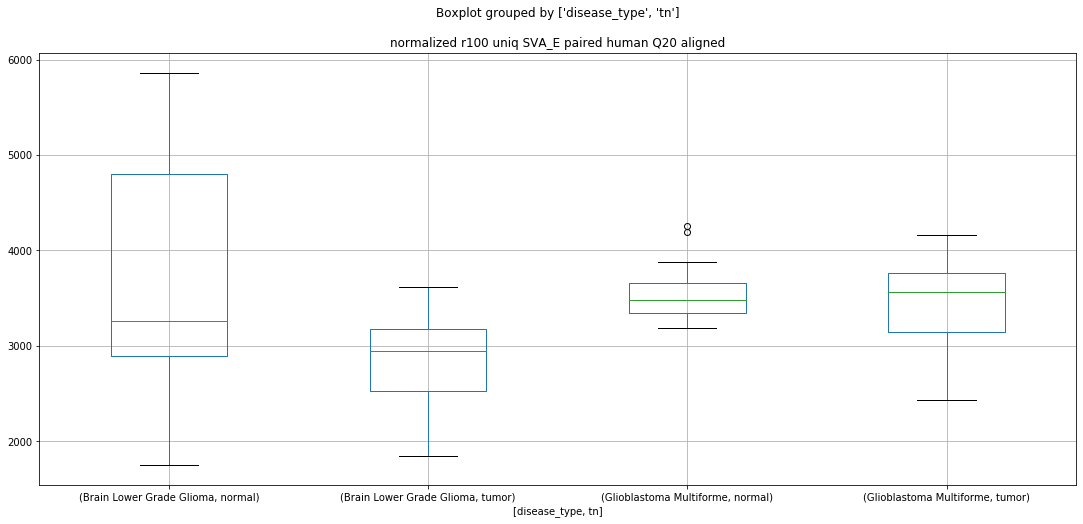

SVA_E:r1000 


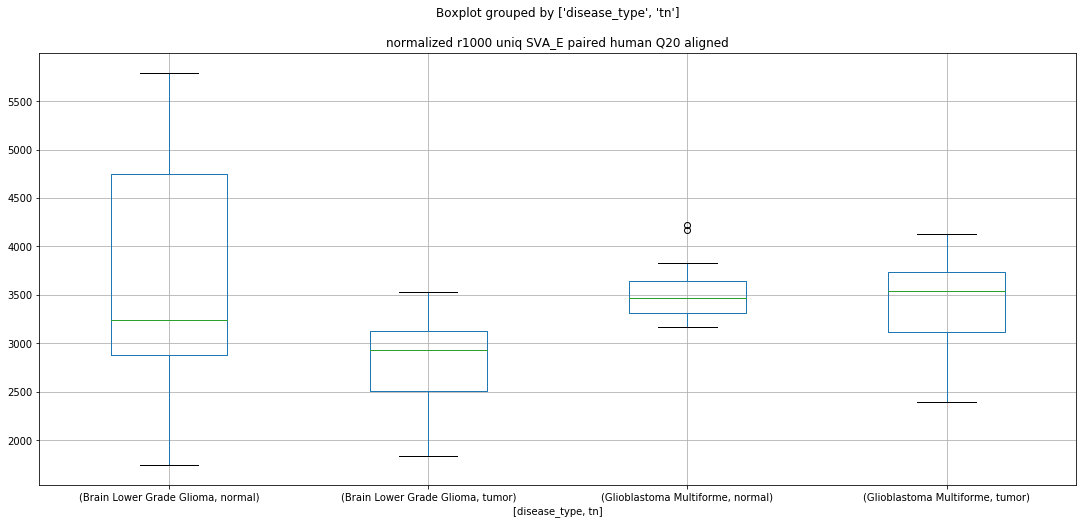

SVA_E:r10000 


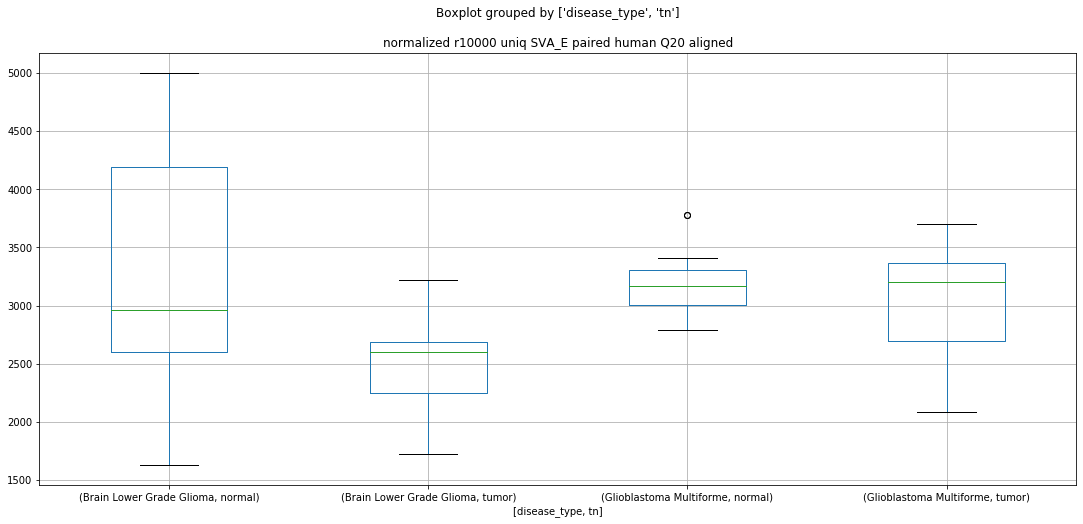

SVA_F:


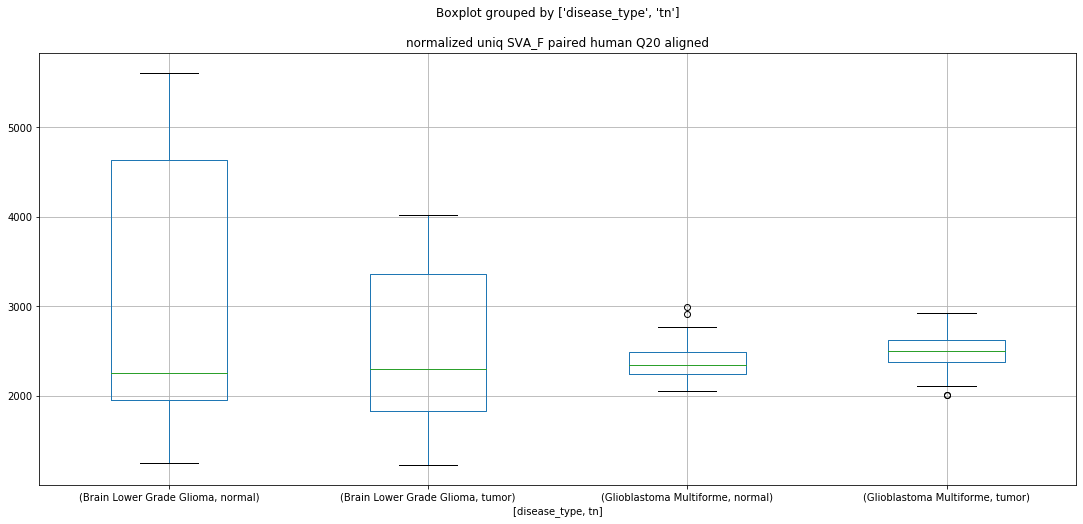

SVA_F:r10 


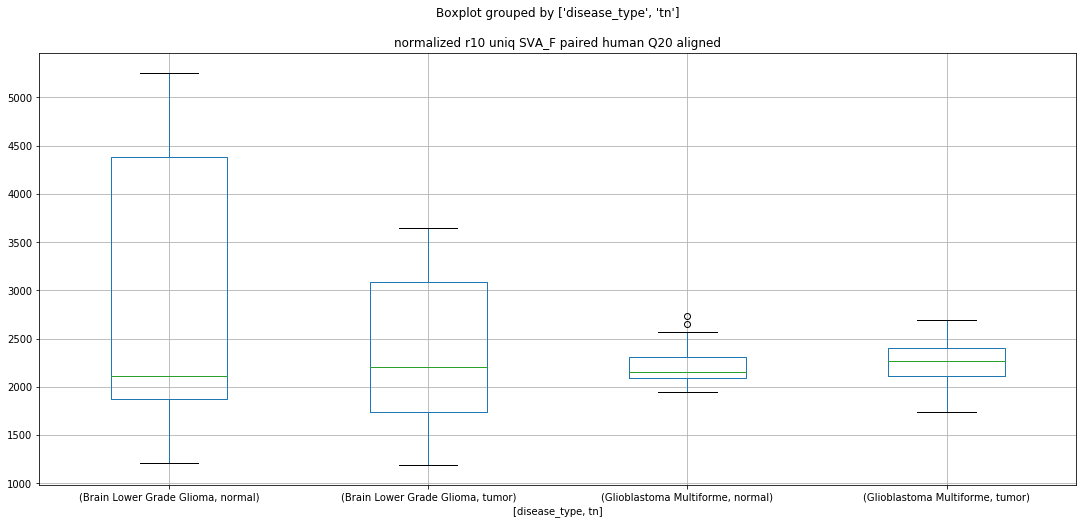

SVA_F:r100 


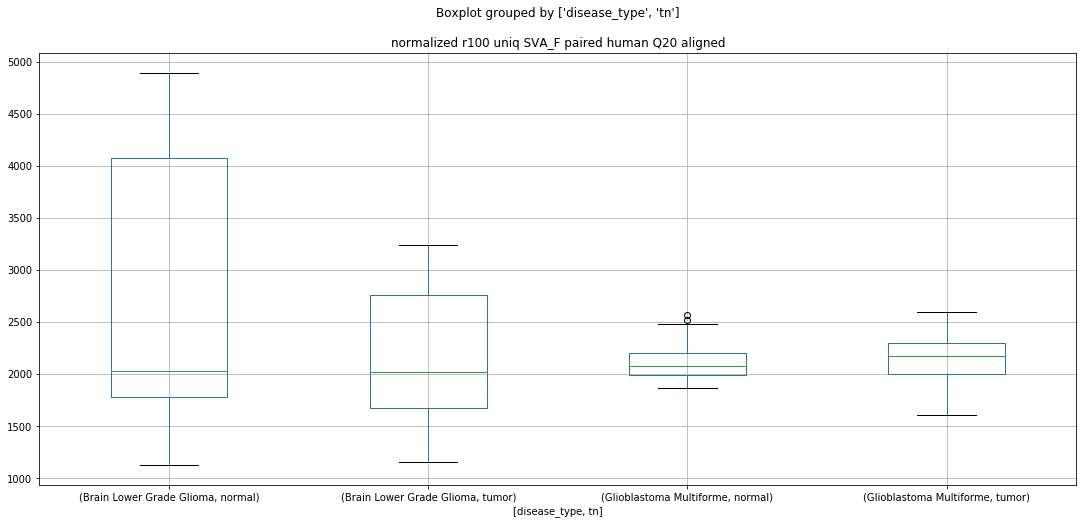

SVA_F:r1000 


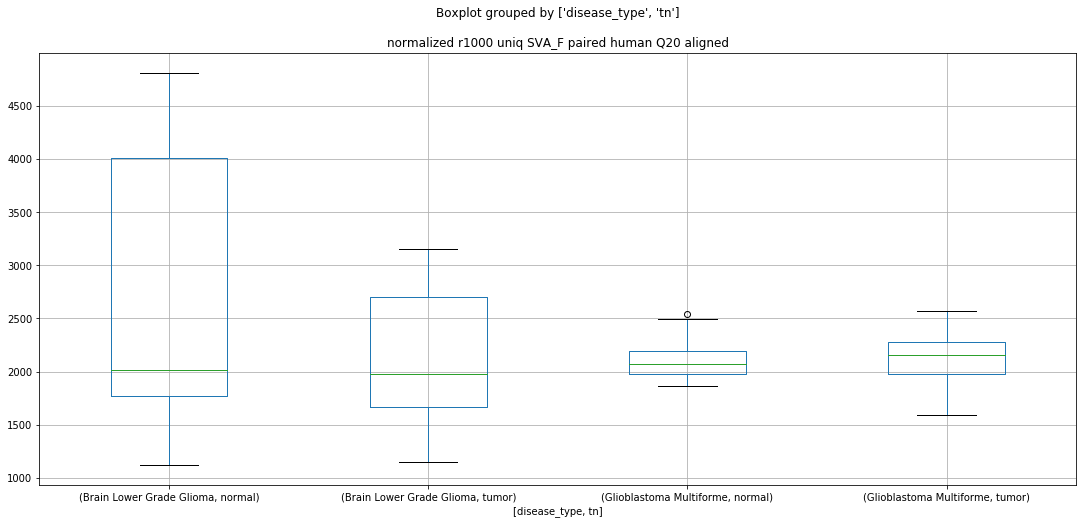

SVA_F:r10000 


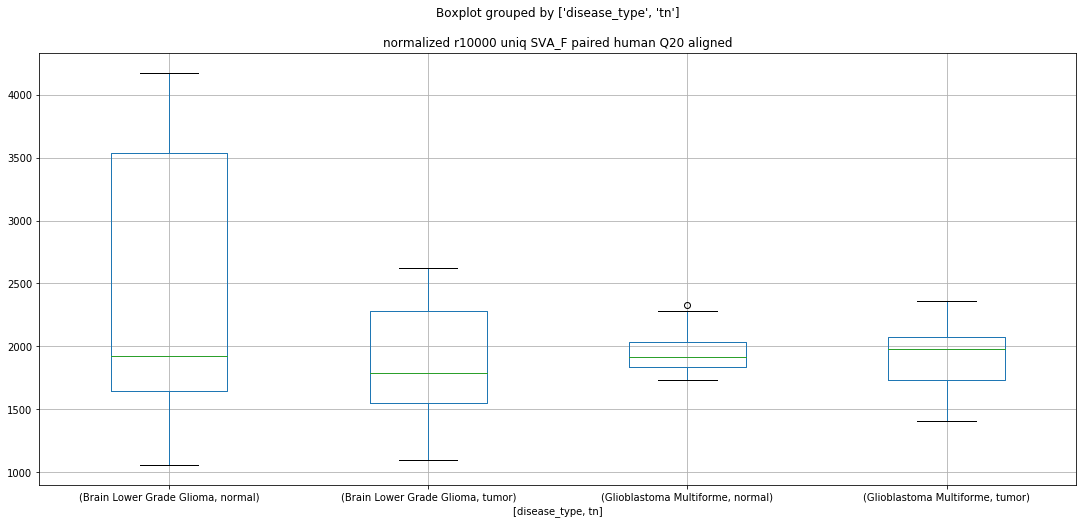

In [111]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+":"+s)
        df.boxplot(column=['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'],
                by=['disease_type','tn'])
        plt.show()

HERVK113:


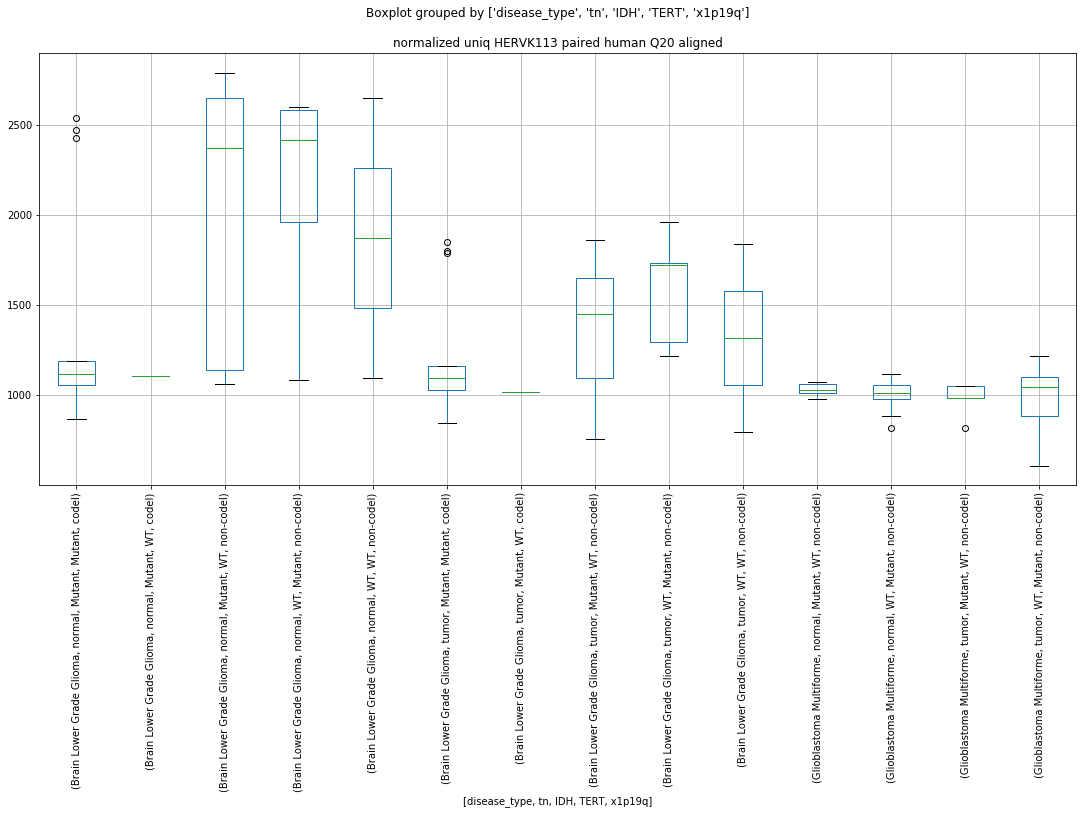

HERVK113:r10 


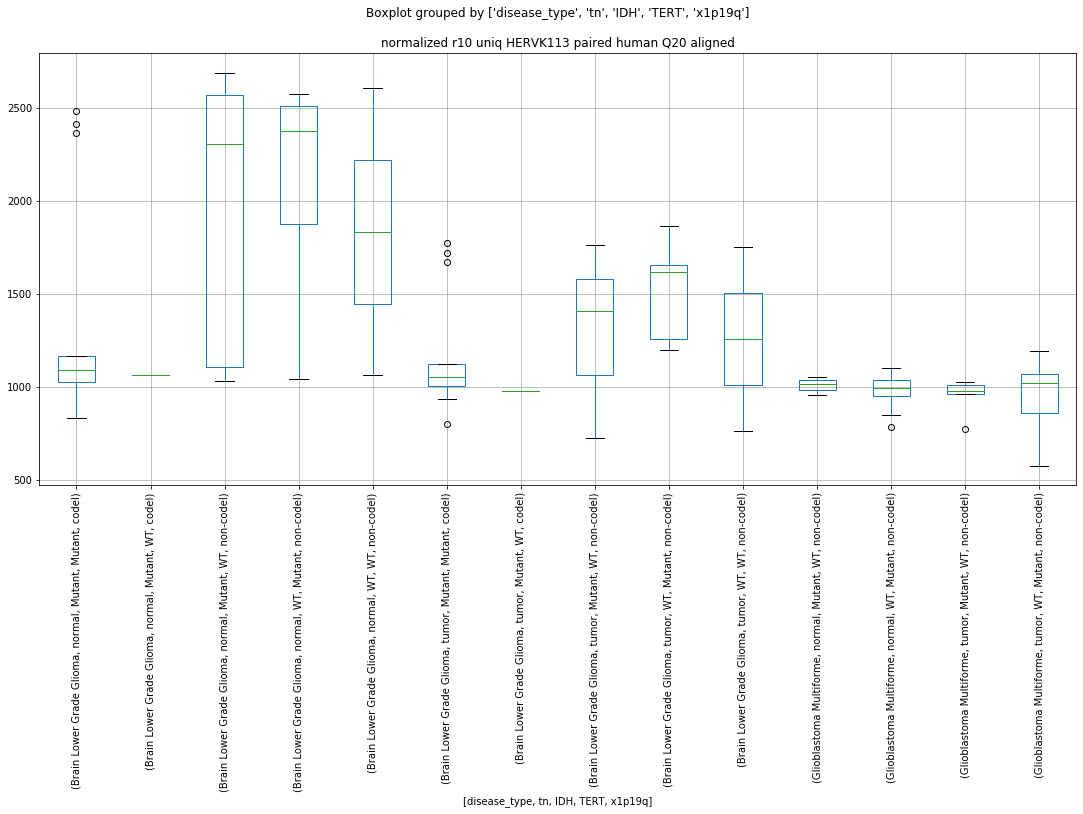

HERVK113:r100 


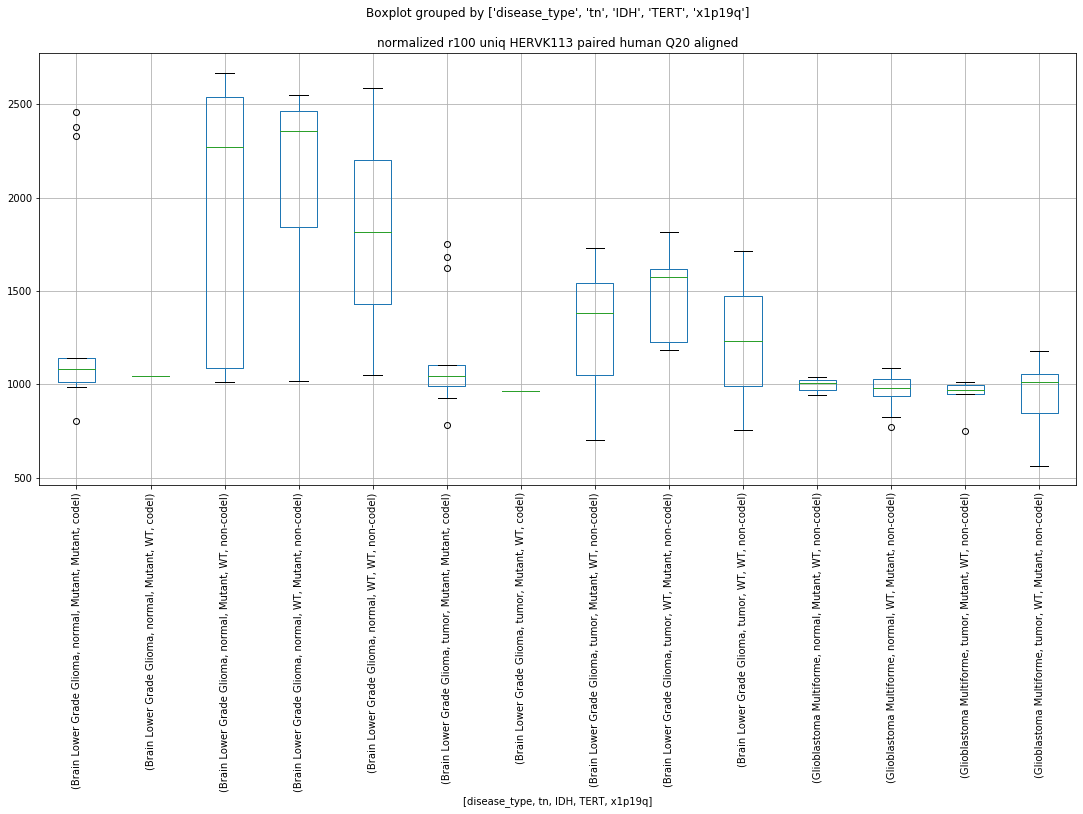

HERVK113:r1000 


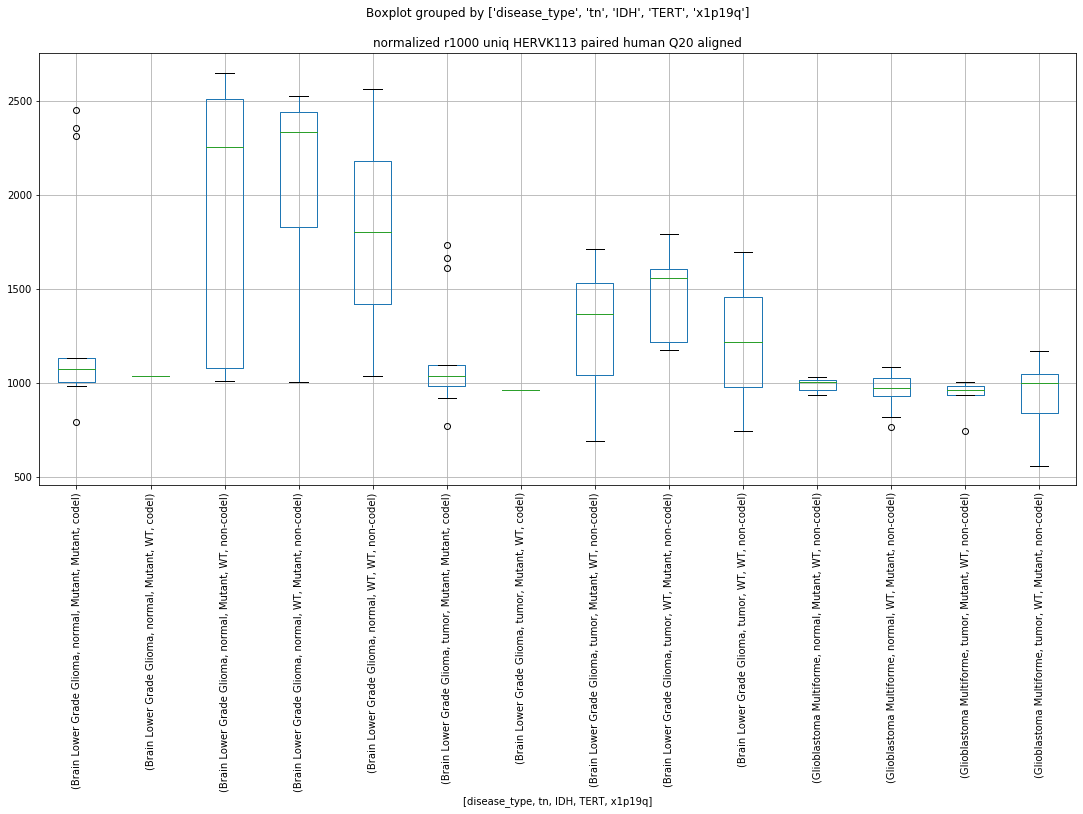

HERVK113:r10000 


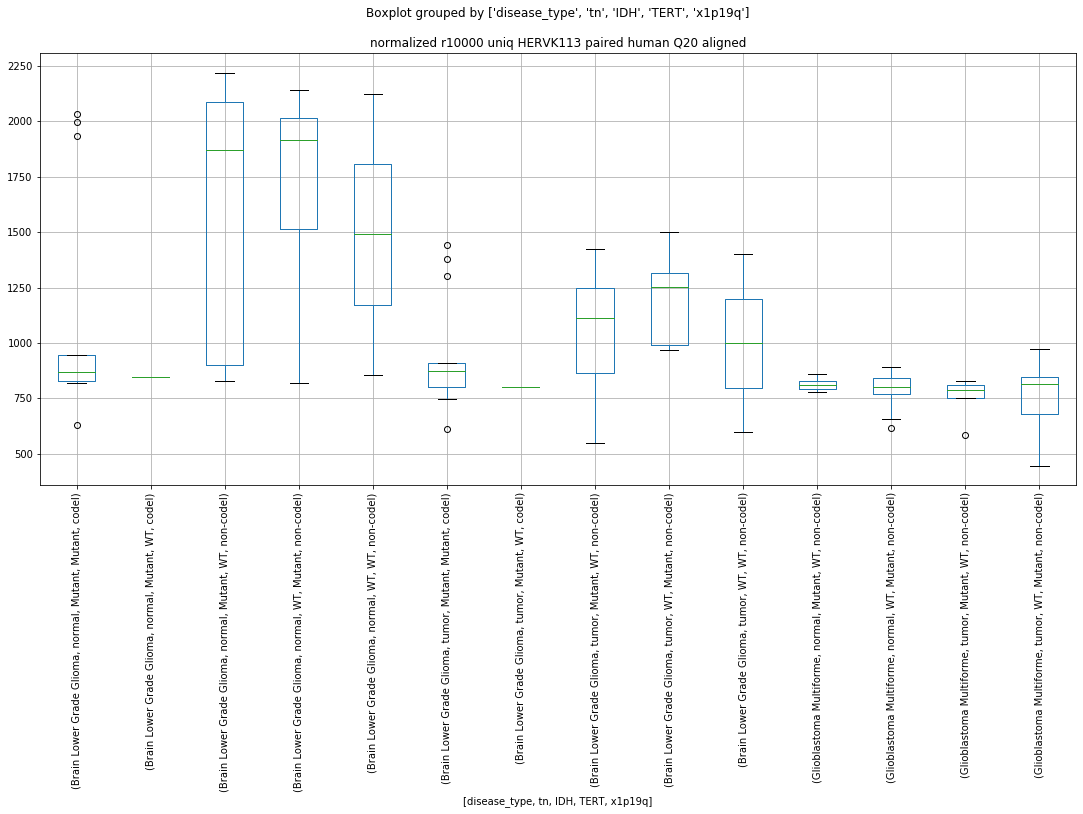

SVA_A:


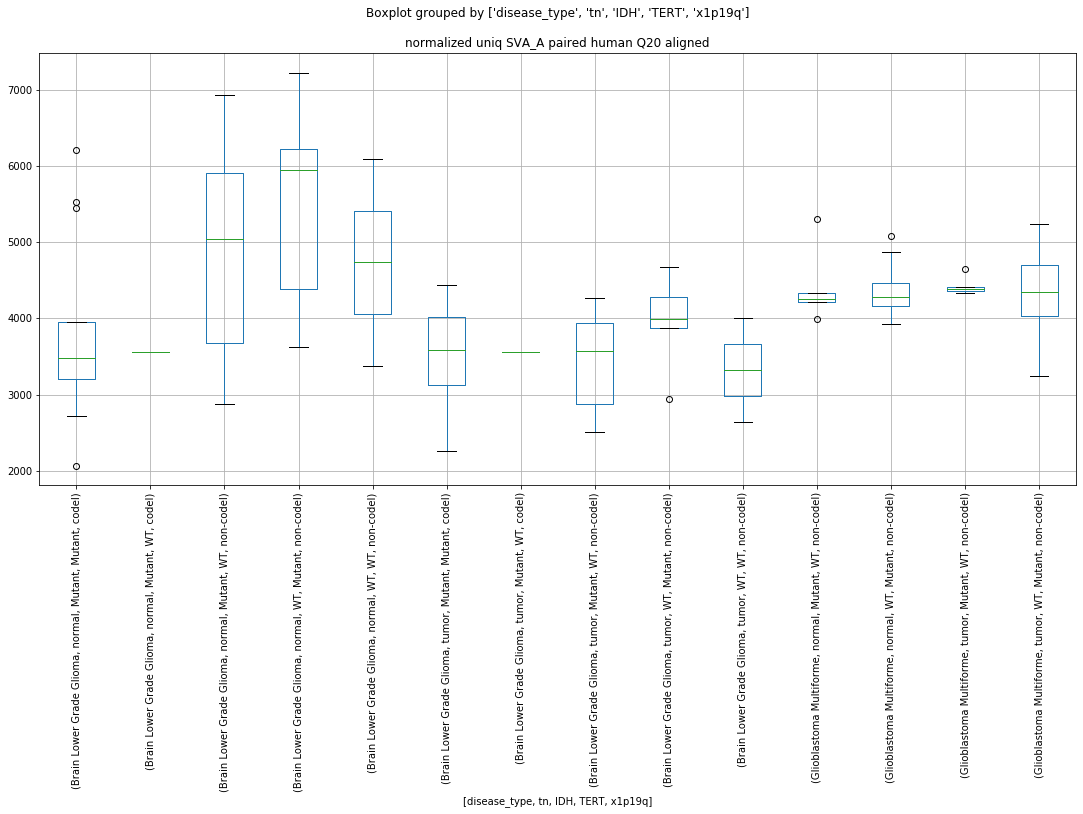

SVA_A:r10 


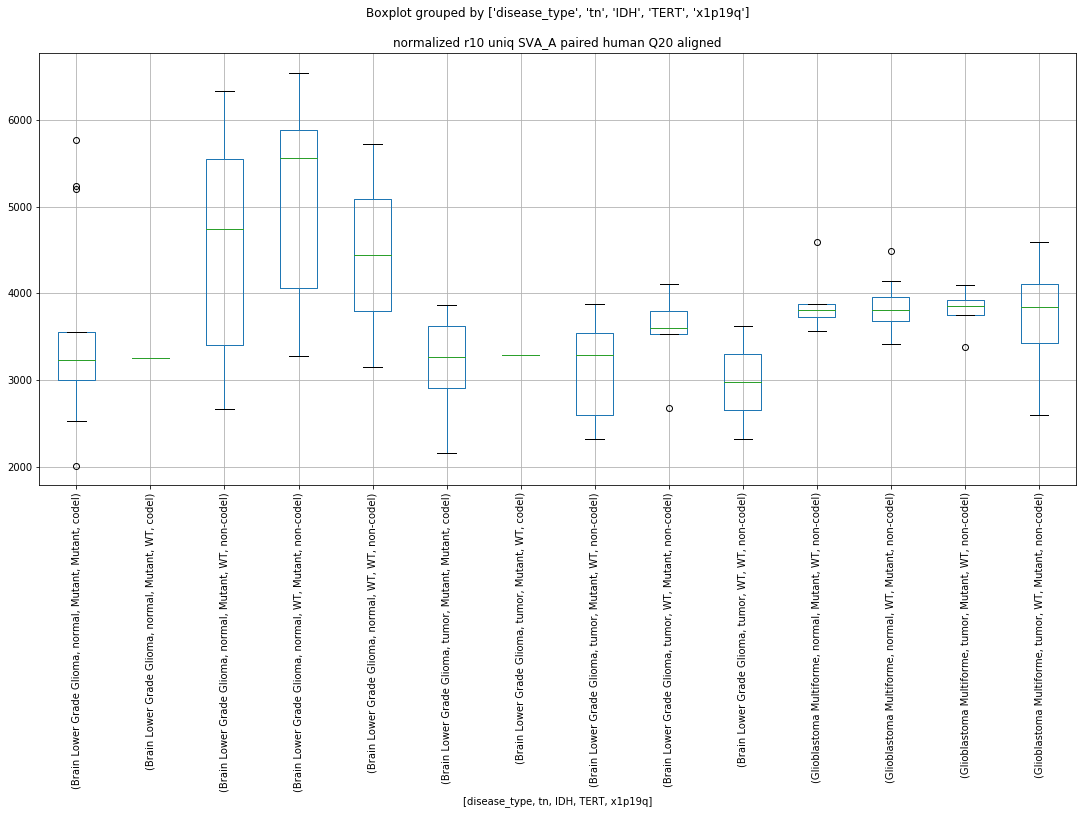

SVA_A:r100 


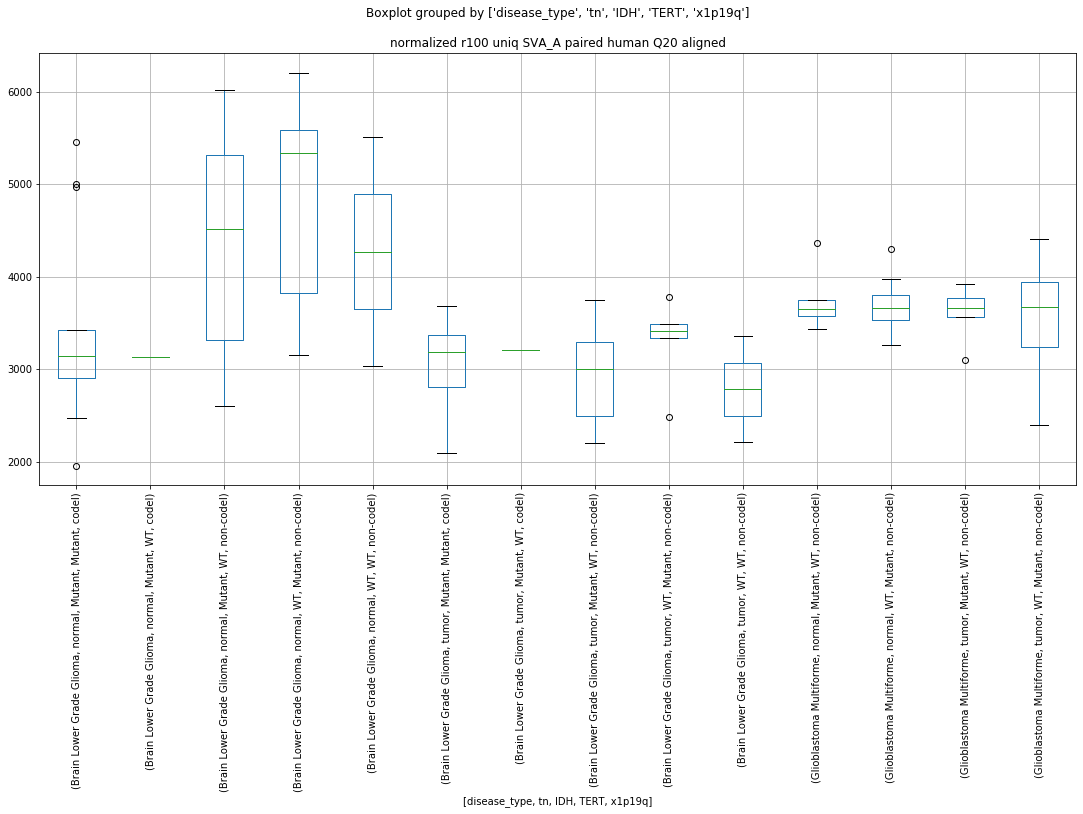

SVA_A:r1000 


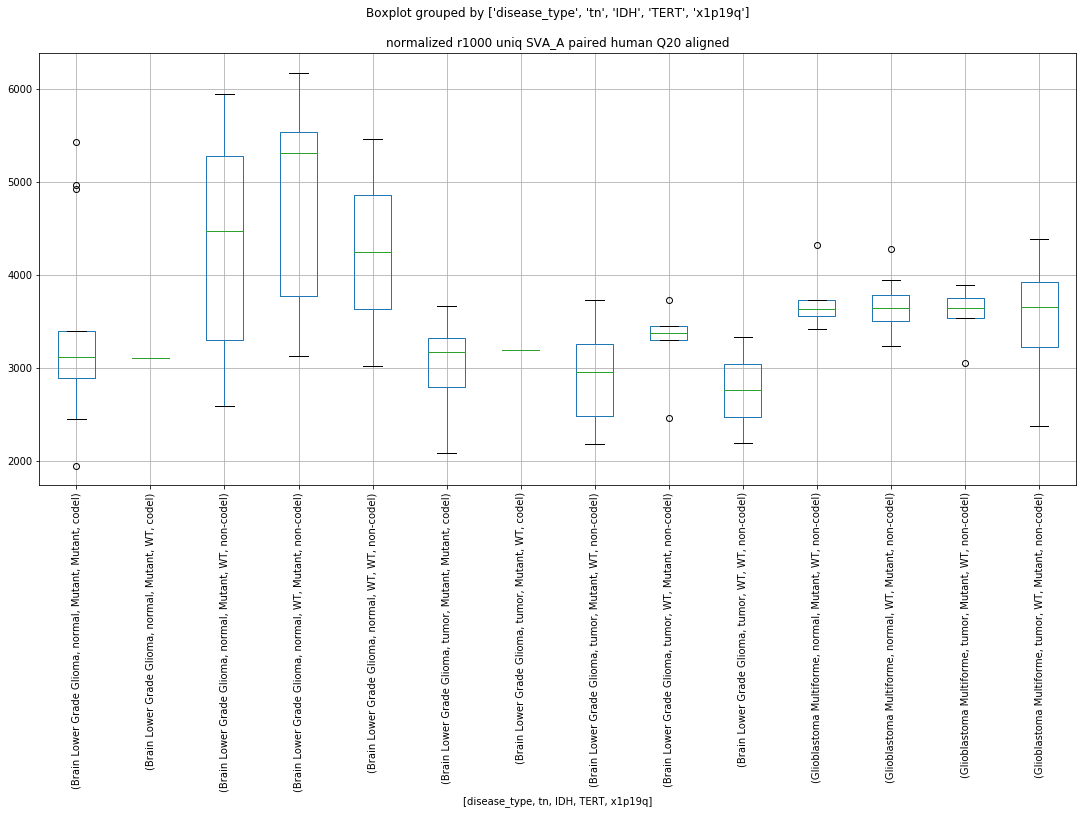

SVA_A:r10000 


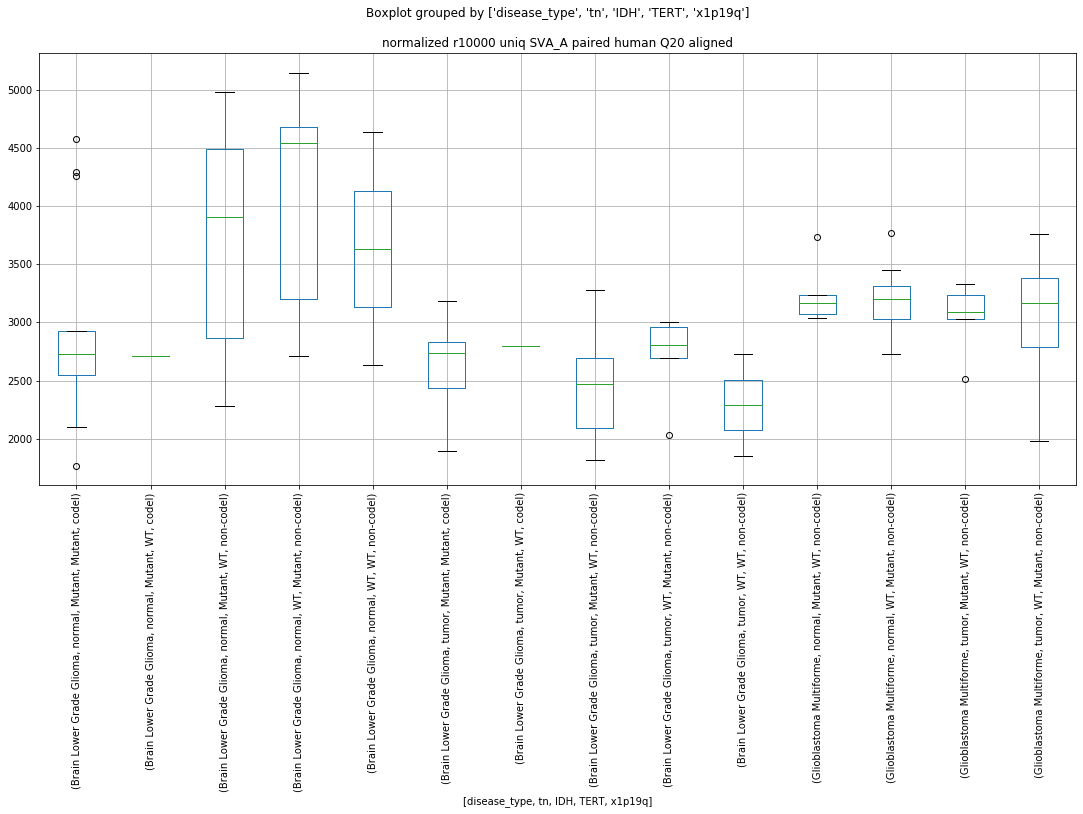

SVA_B:


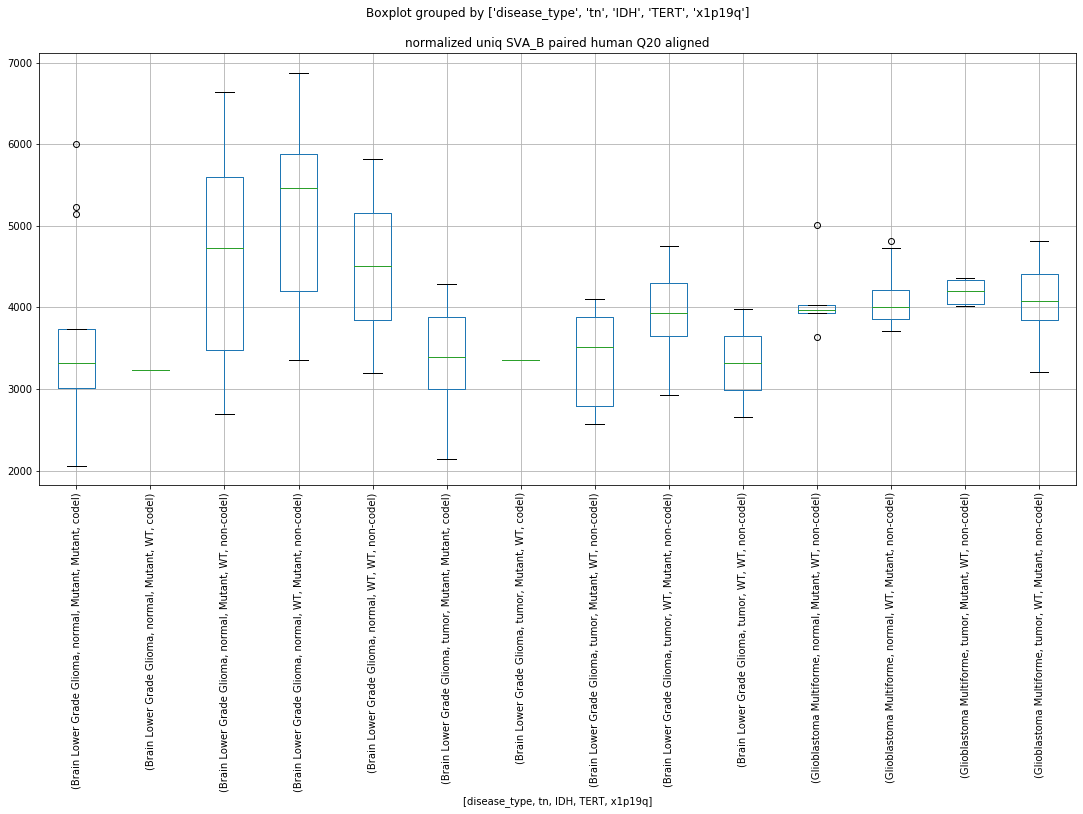

SVA_B:r10 


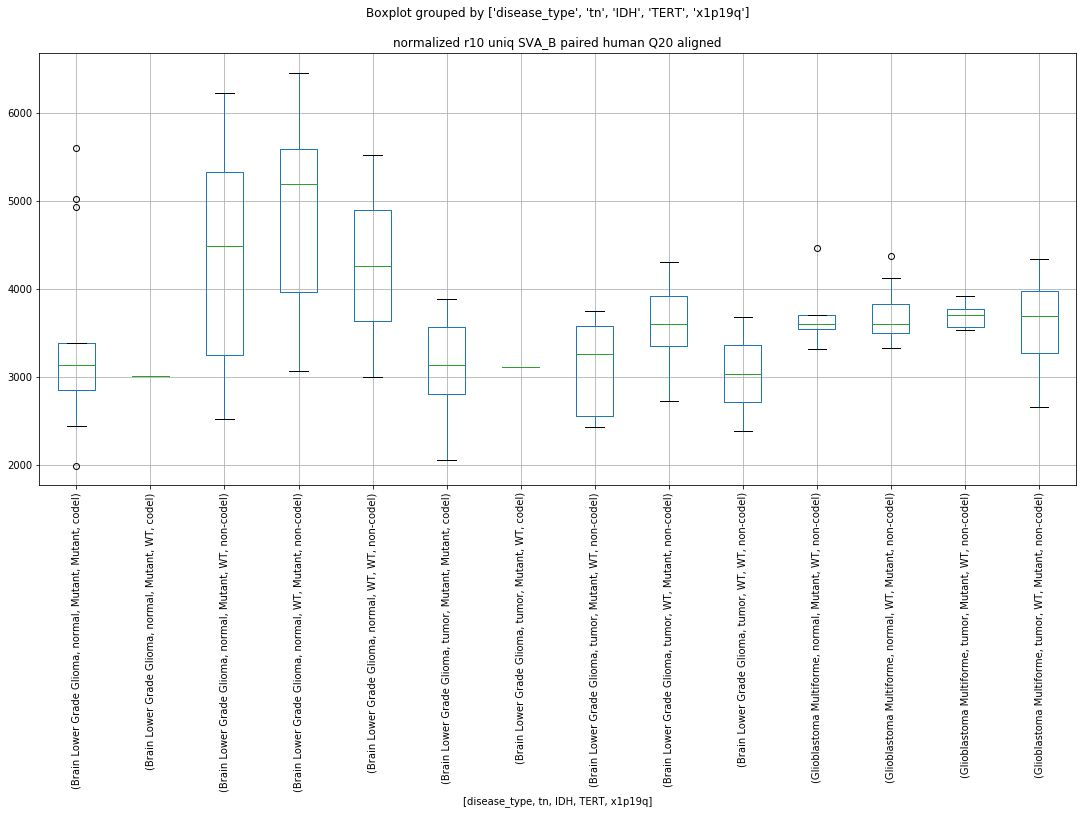

SVA_B:r100 


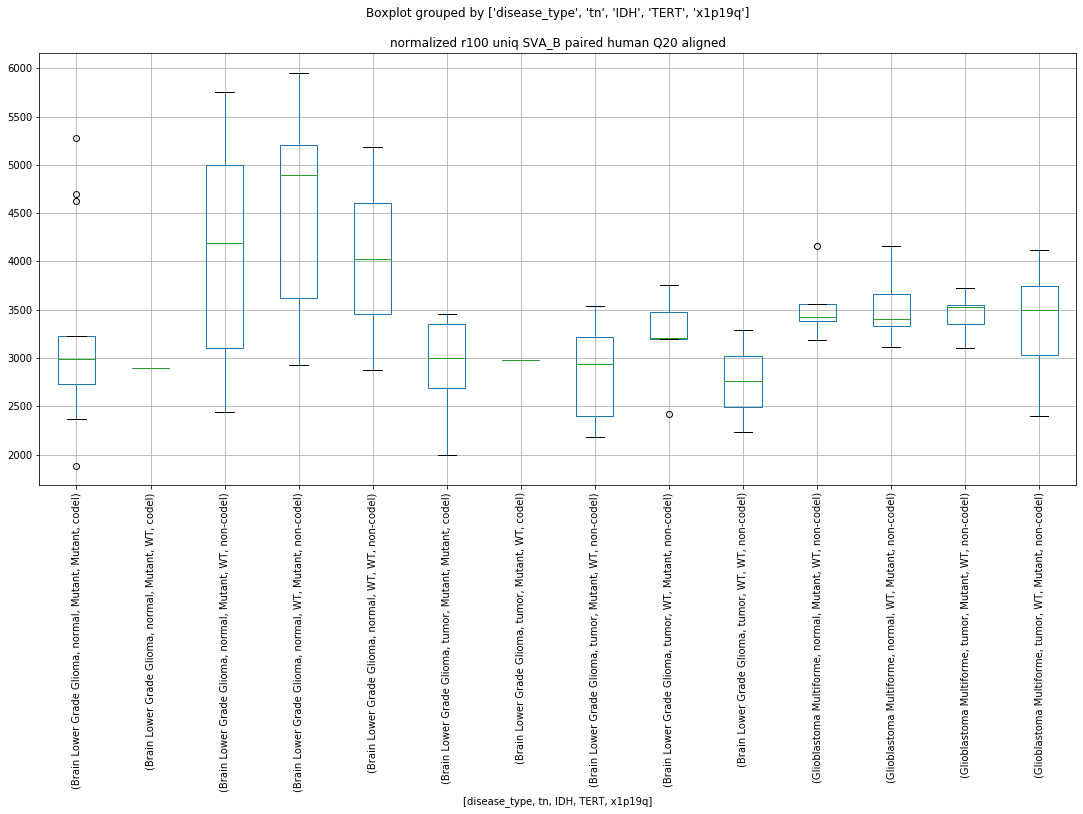

SVA_B:r1000 


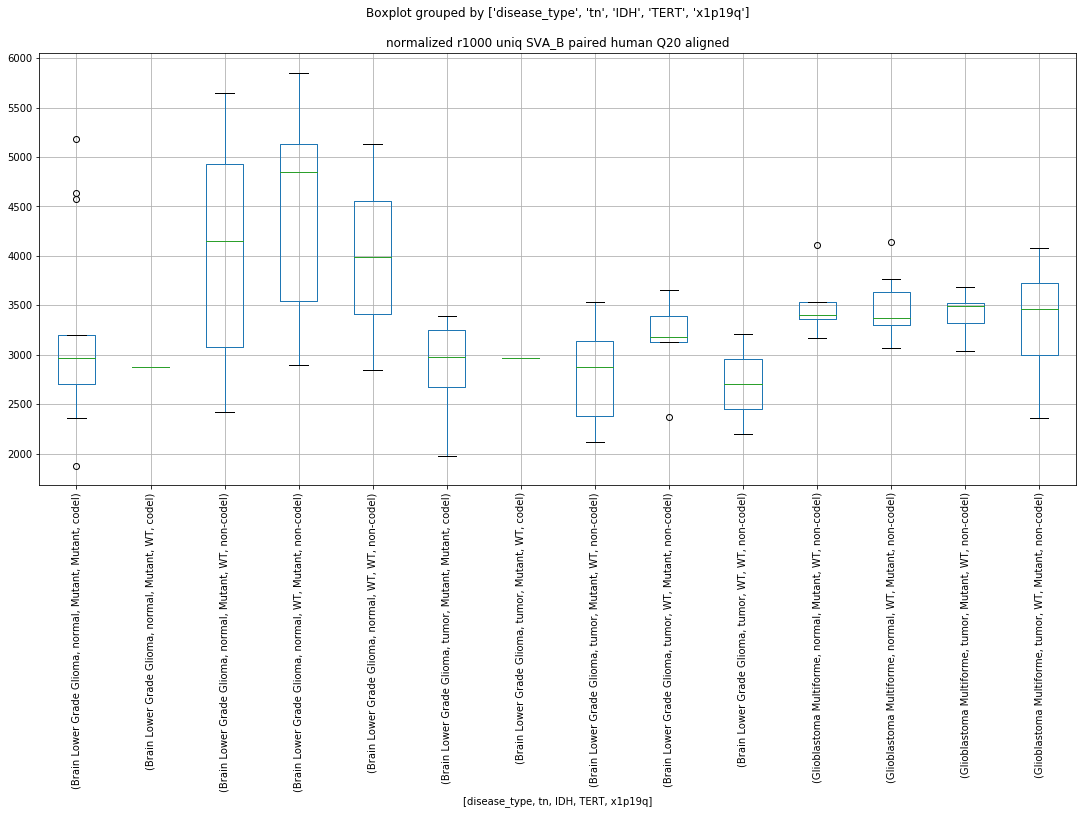

SVA_B:r10000 


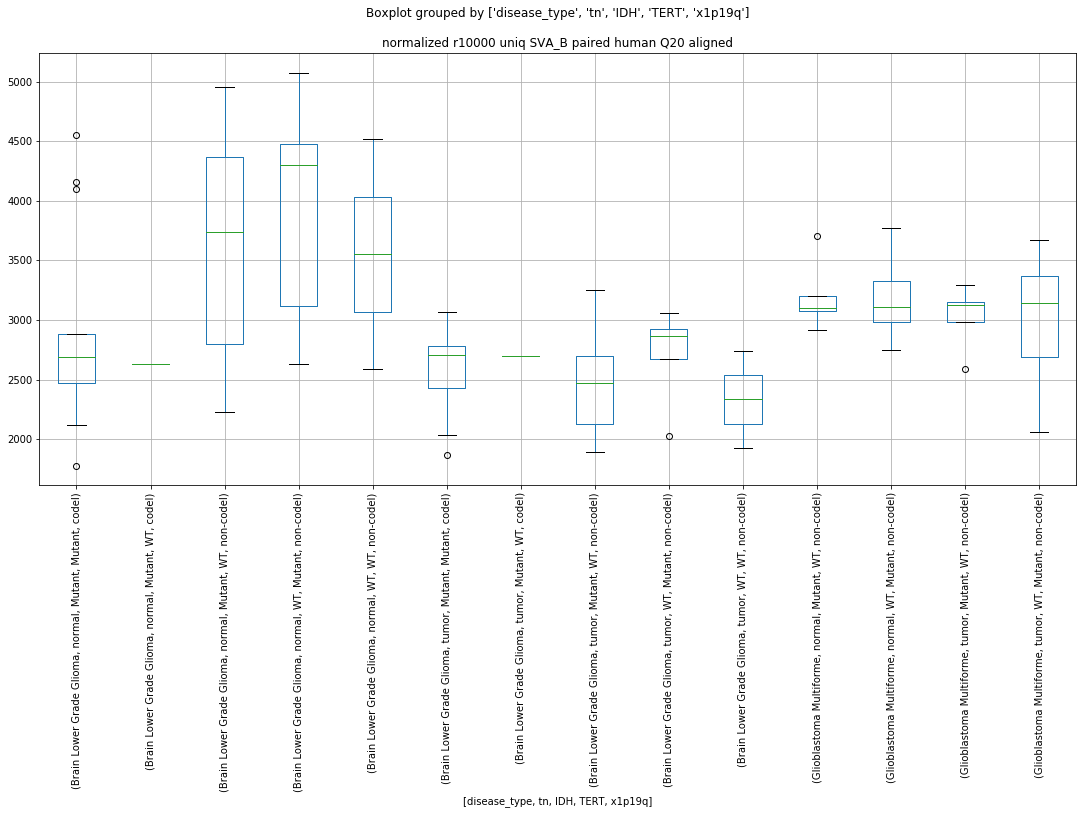

SVA_C:


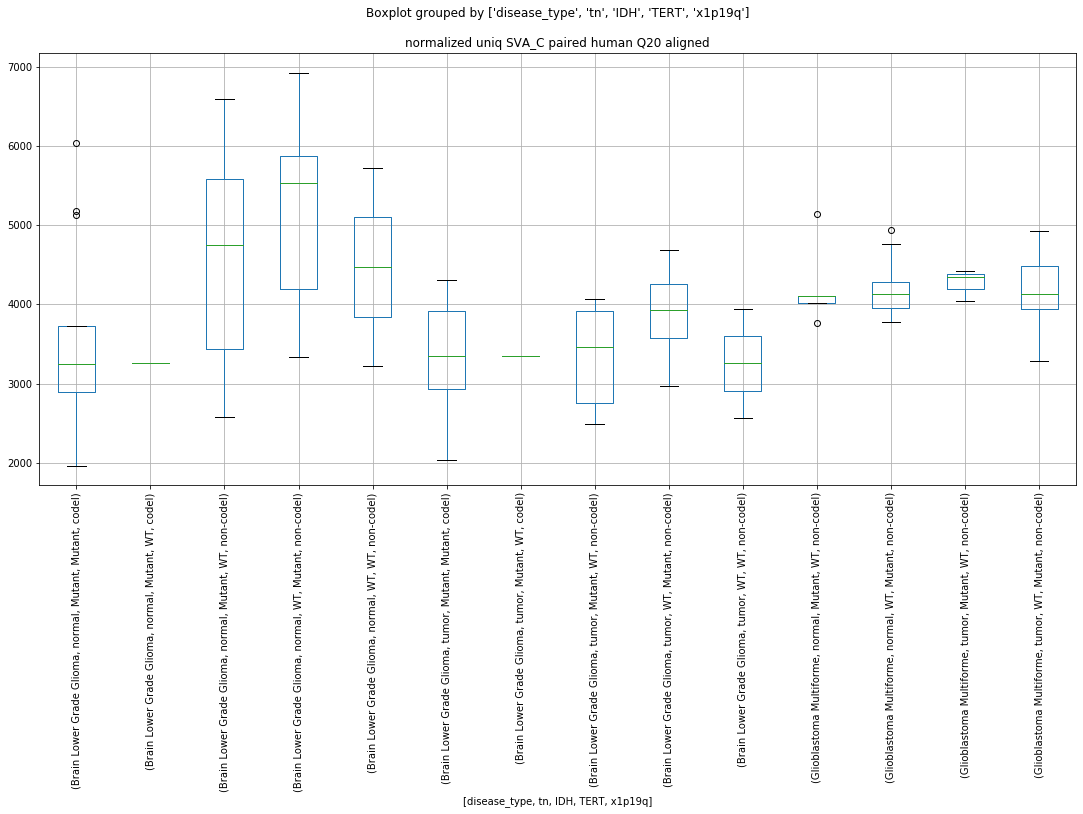

SVA_C:r10 


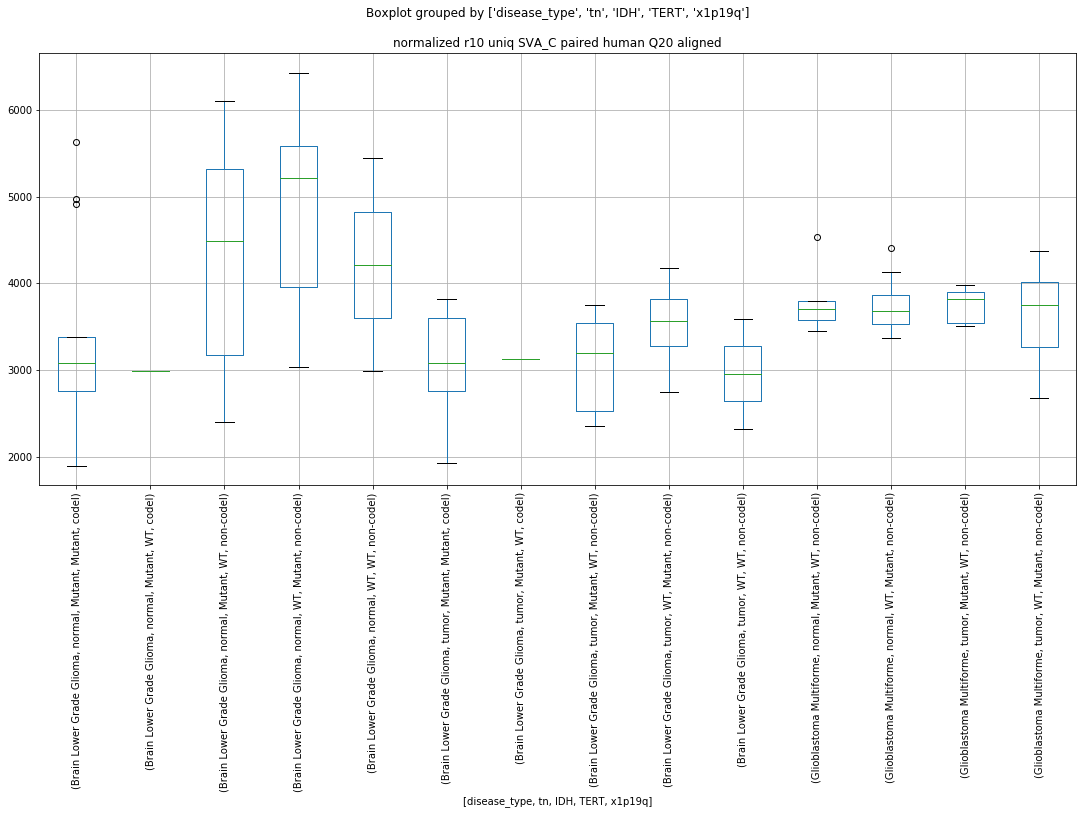

SVA_C:r100 


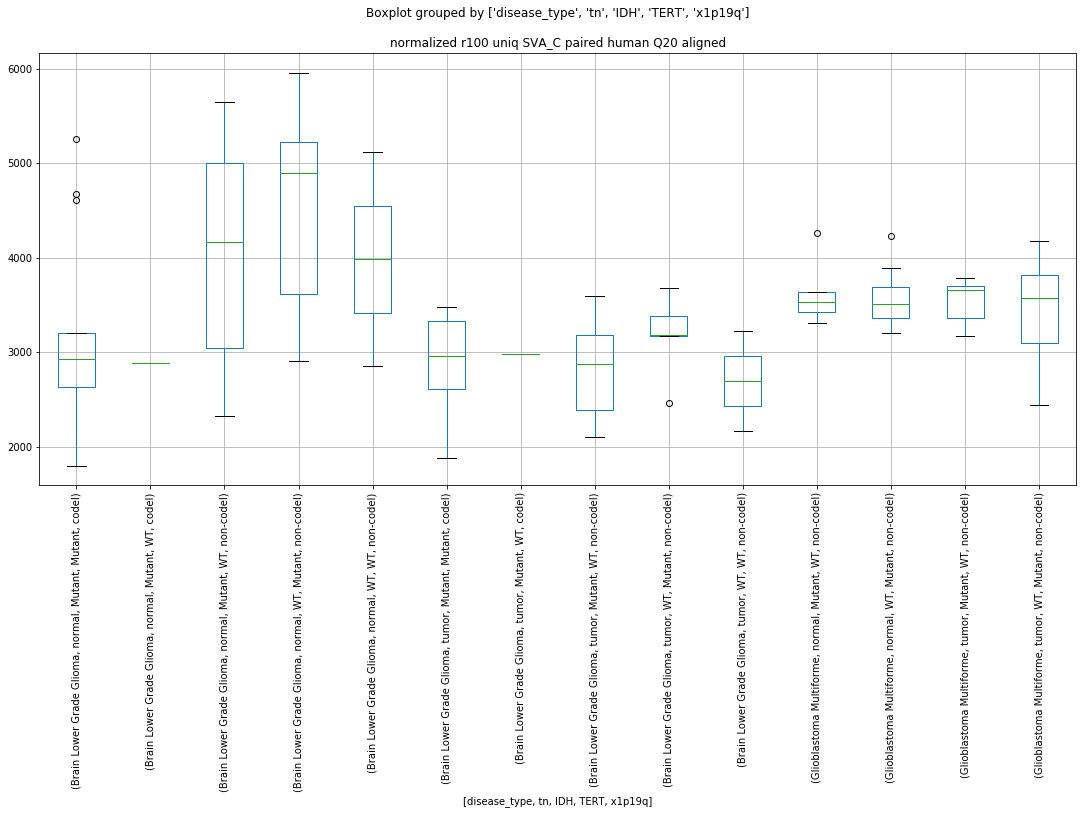

SVA_C:r1000 


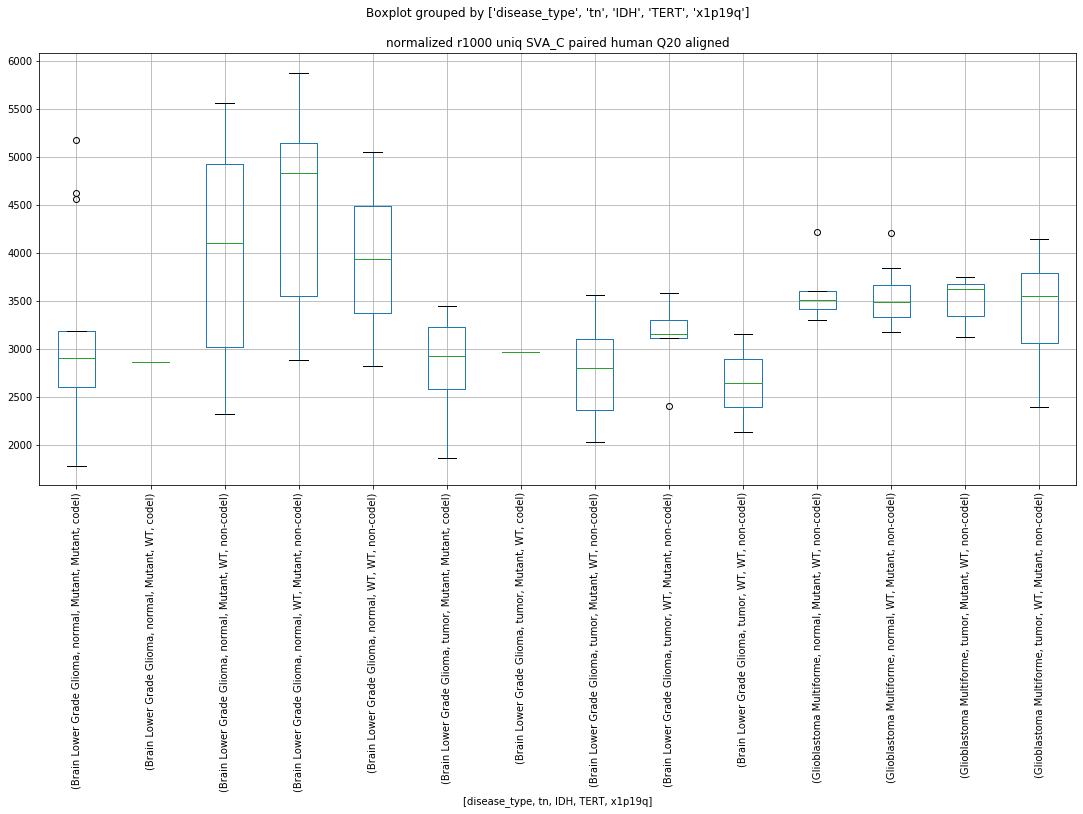

SVA_C:r10000 


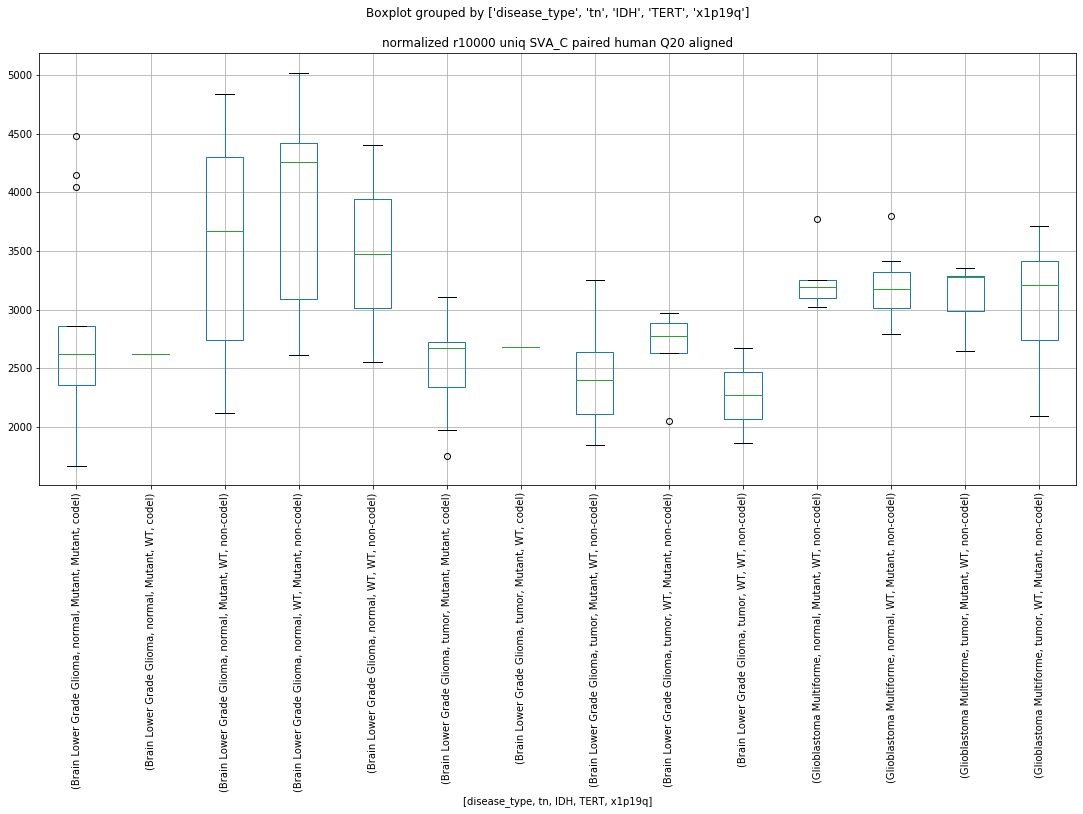

SVA_D:


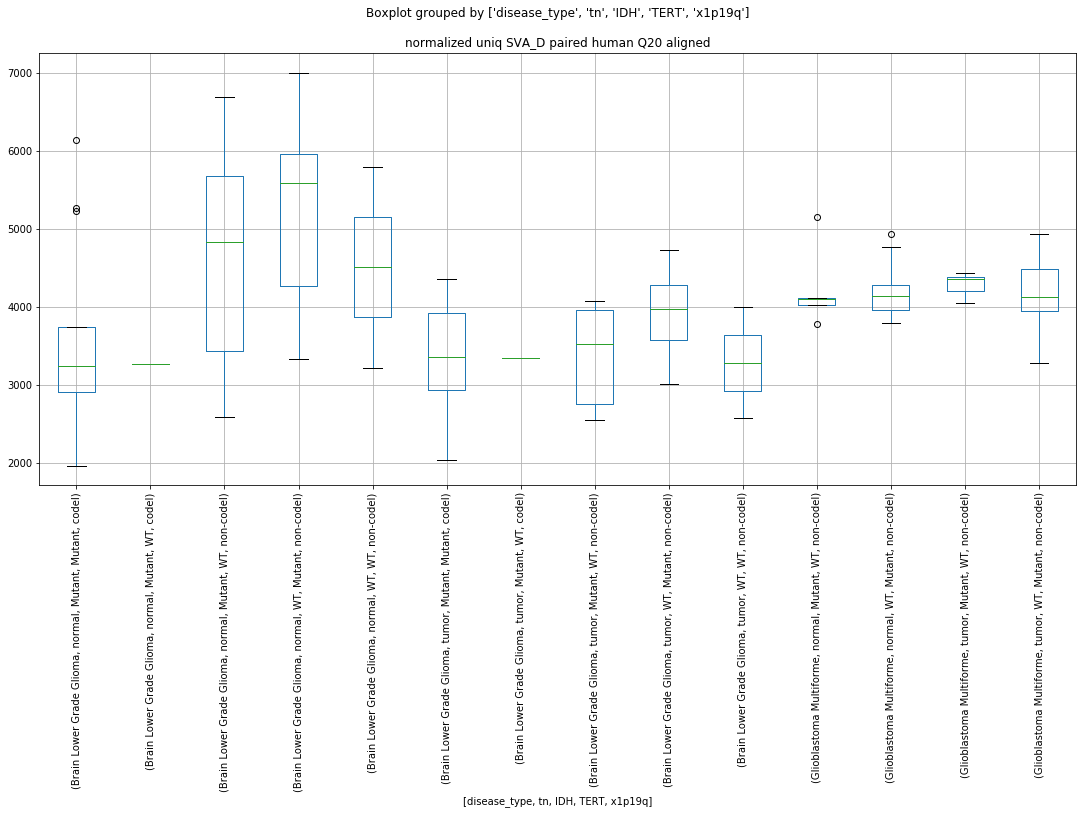

SVA_D:r10 


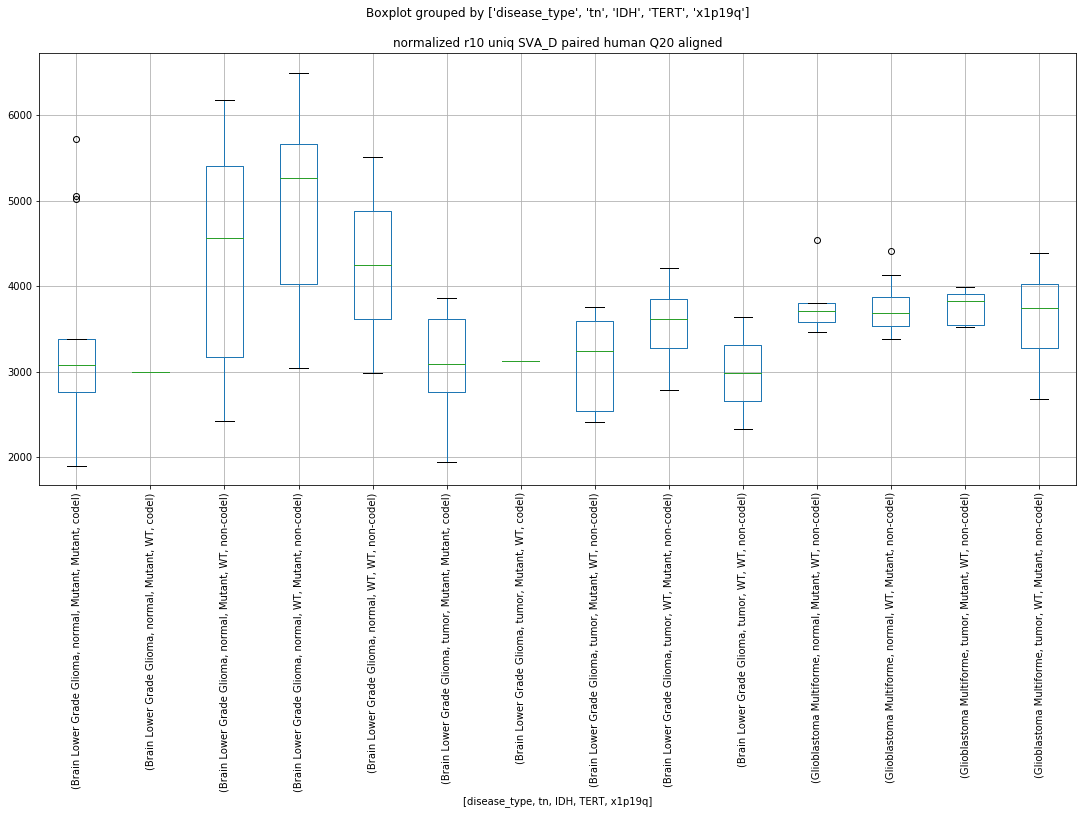

SVA_D:r100 


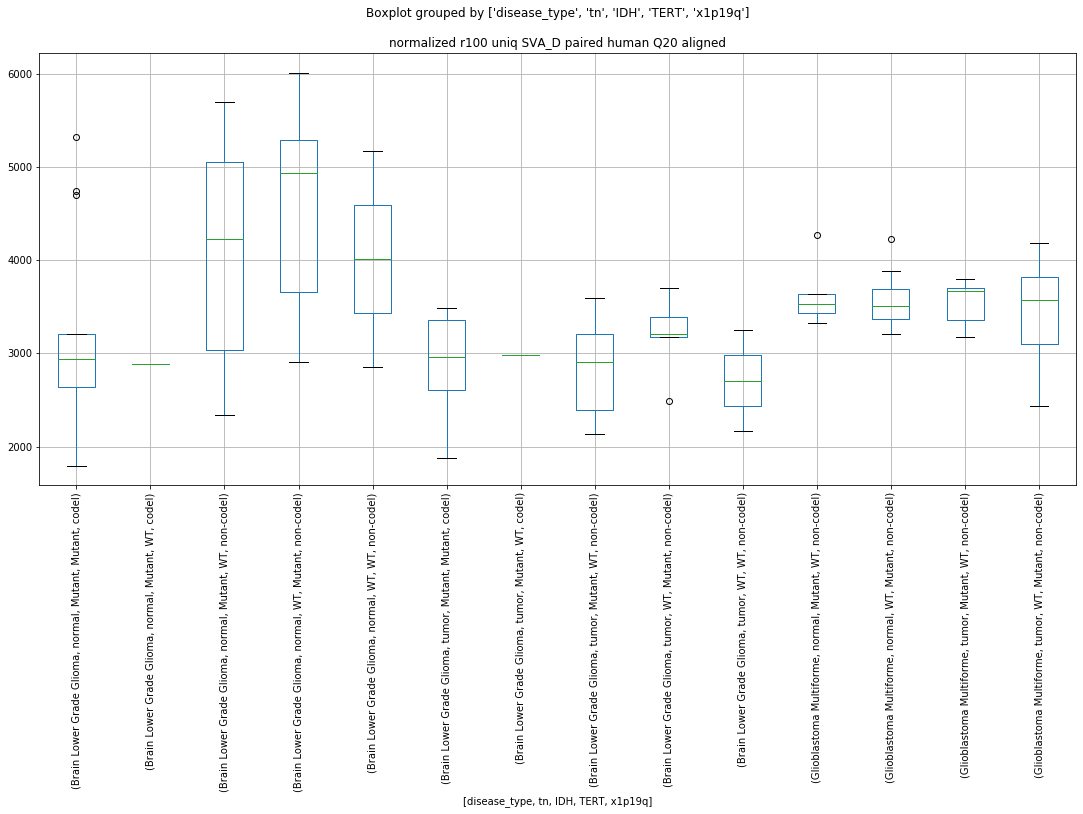

SVA_D:r1000 


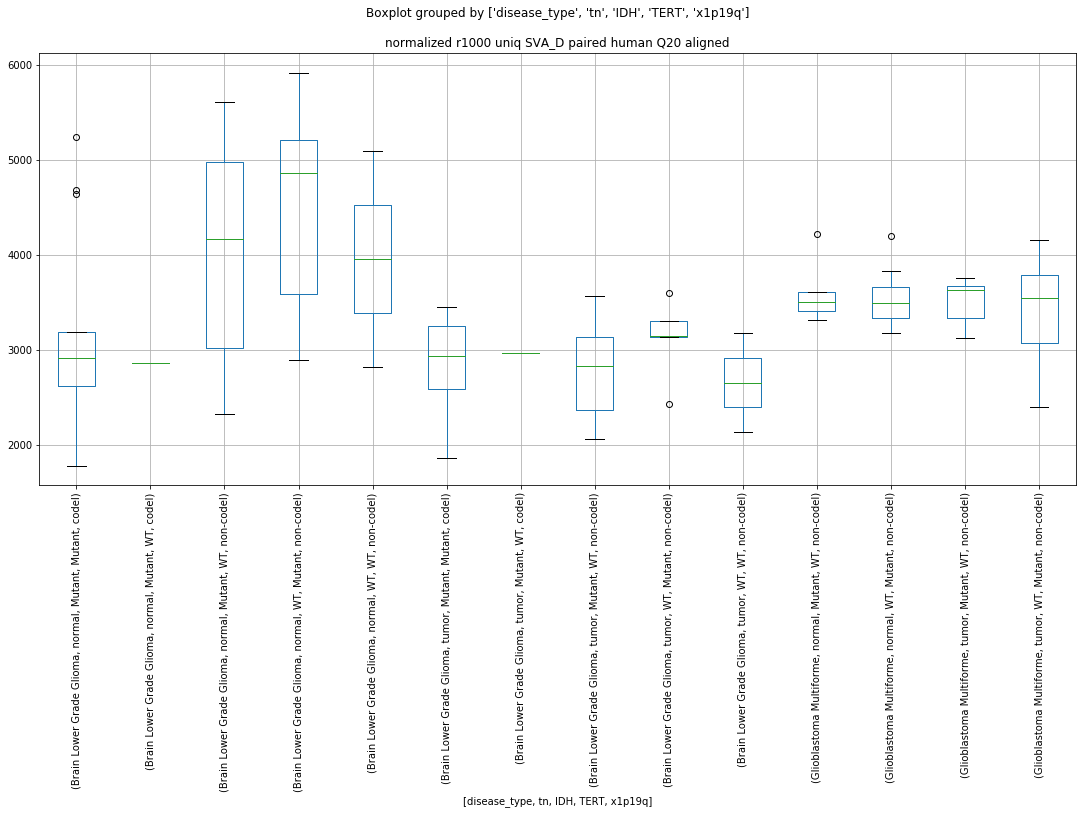

SVA_D:r10000 


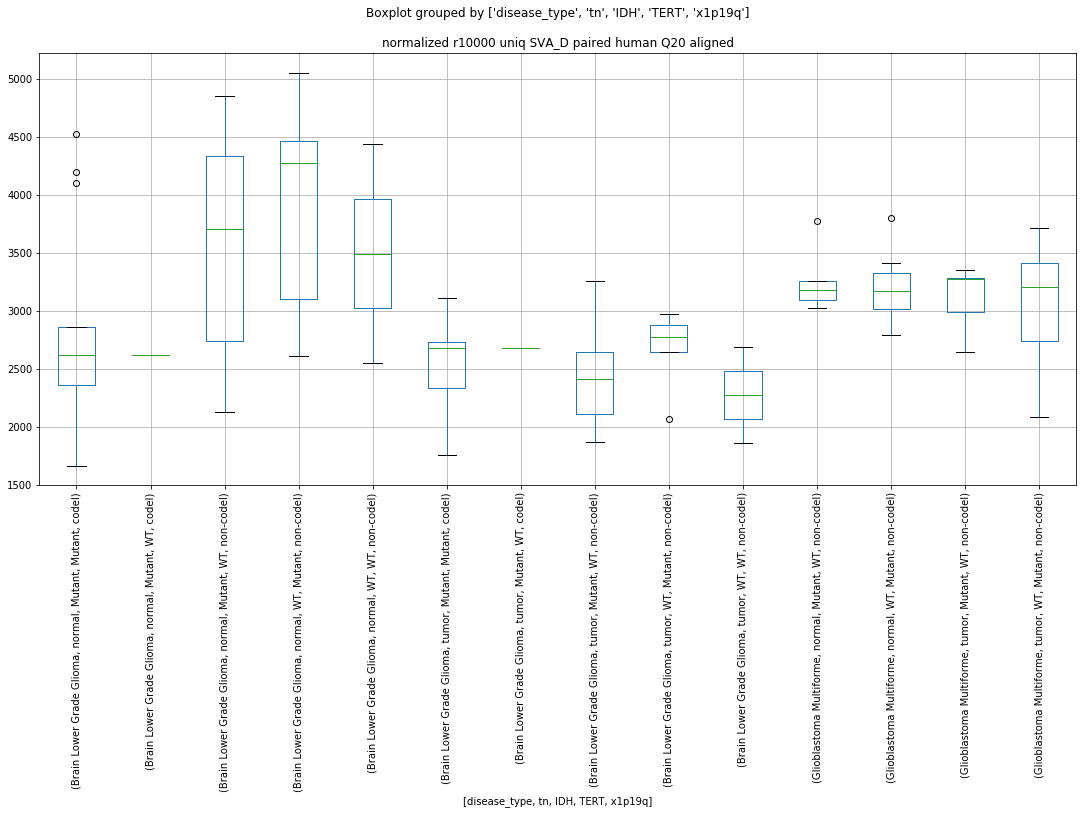

SVA_E:


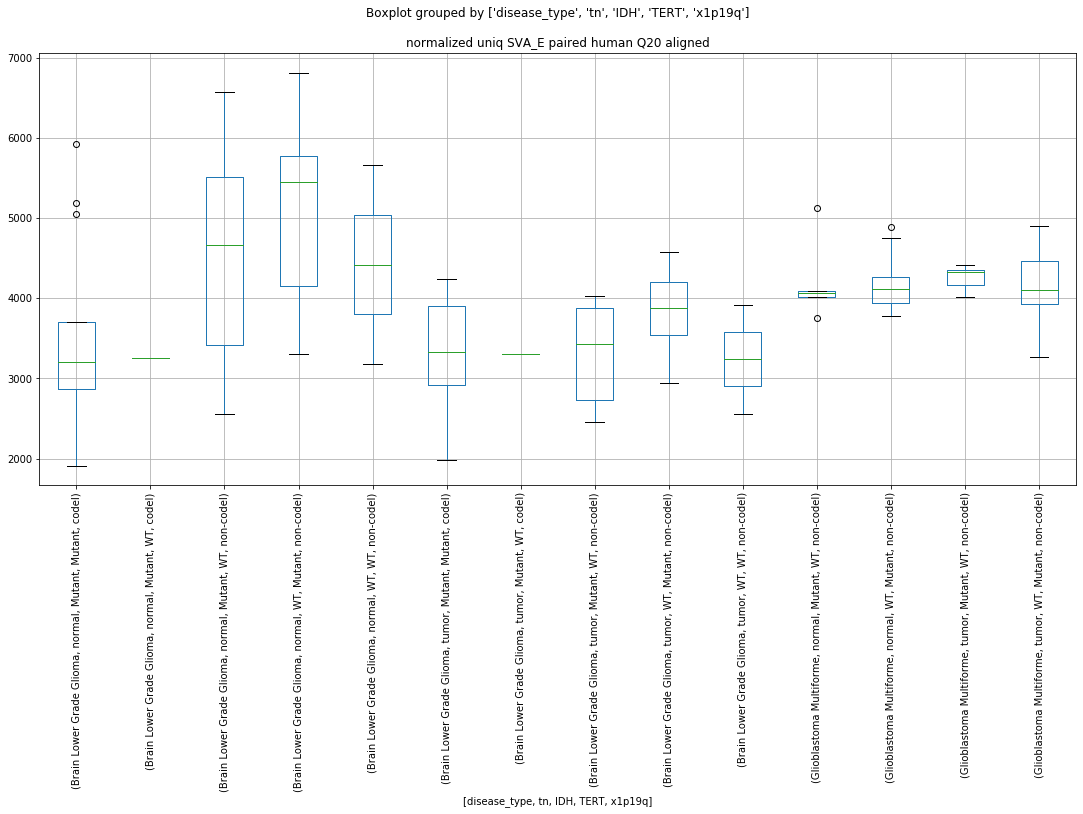

SVA_E:r10 


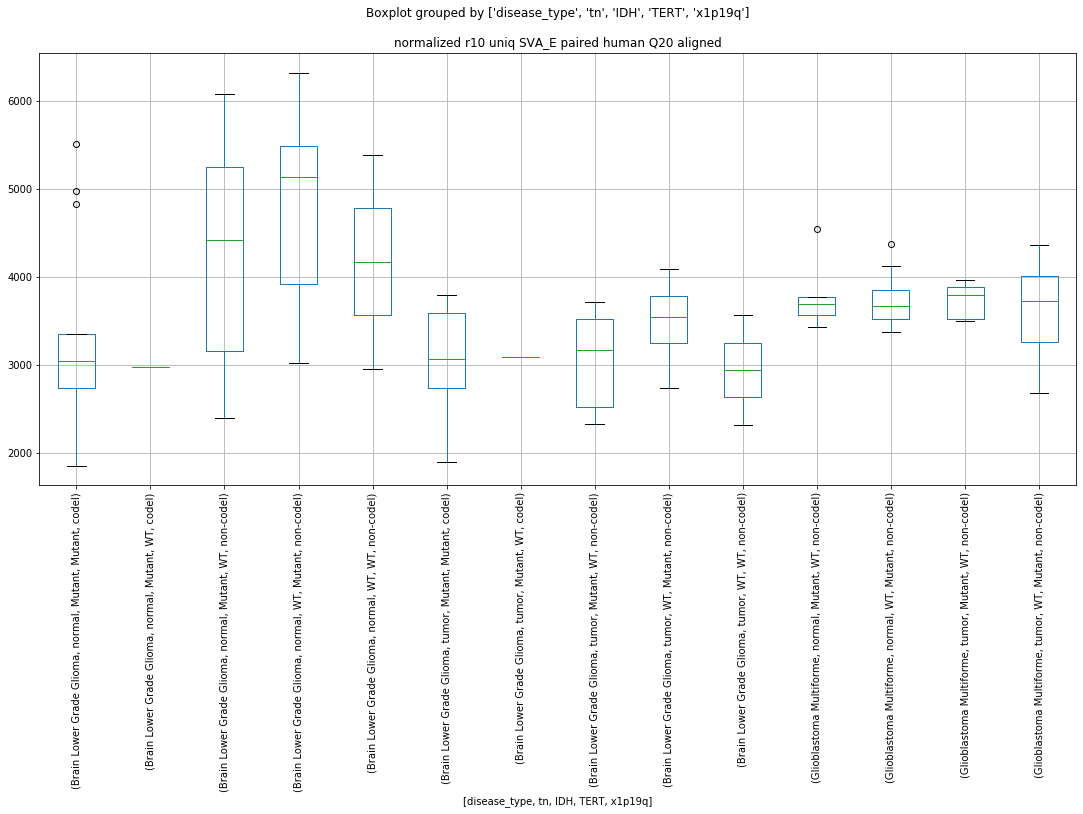

SVA_E:r100 


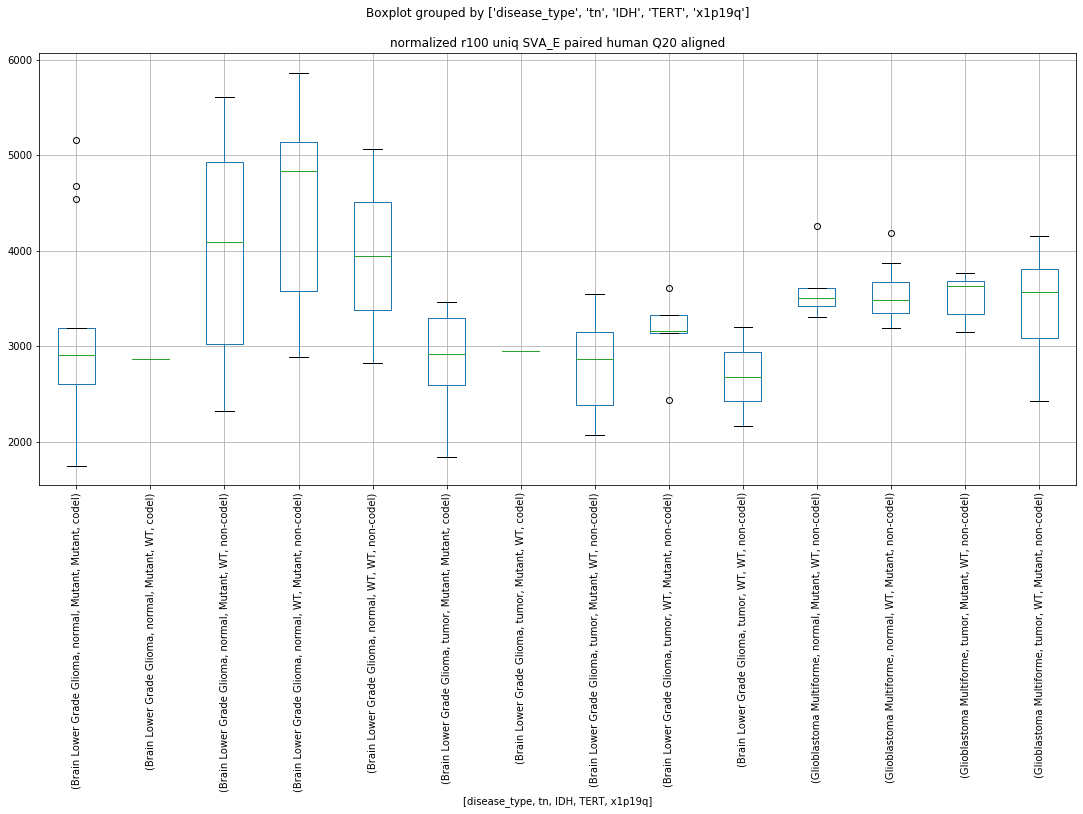

SVA_E:r1000 


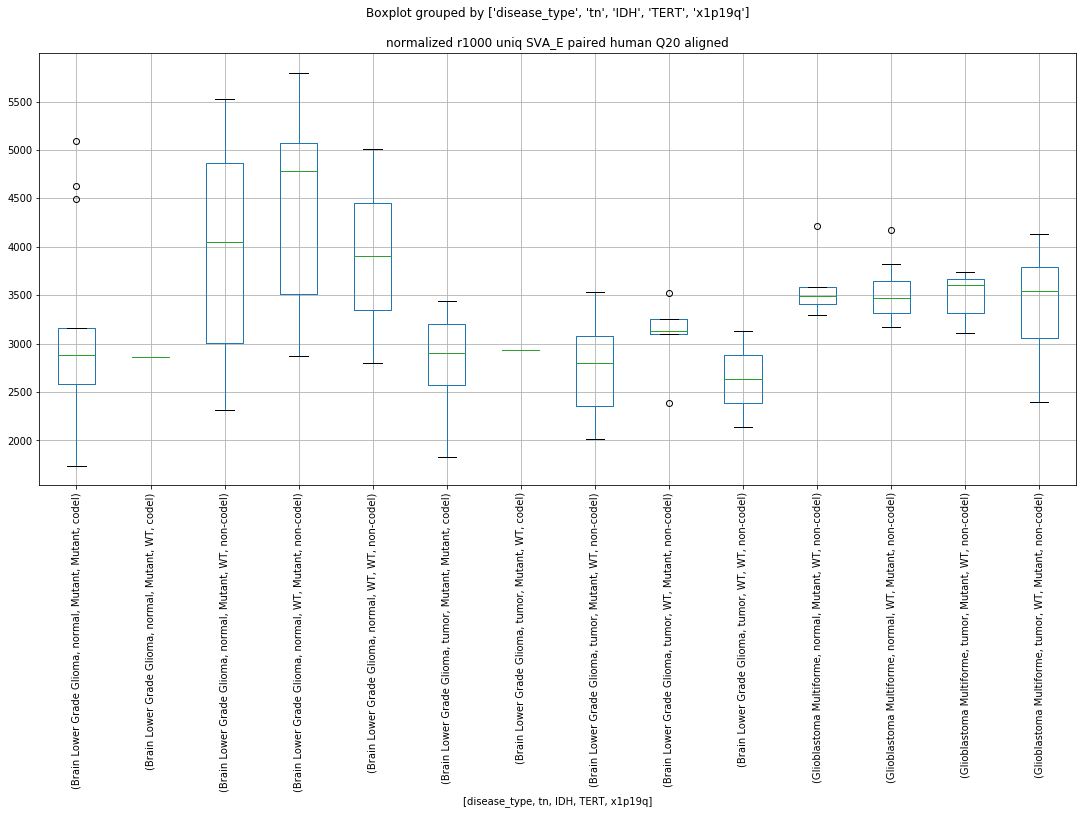

SVA_E:r10000 


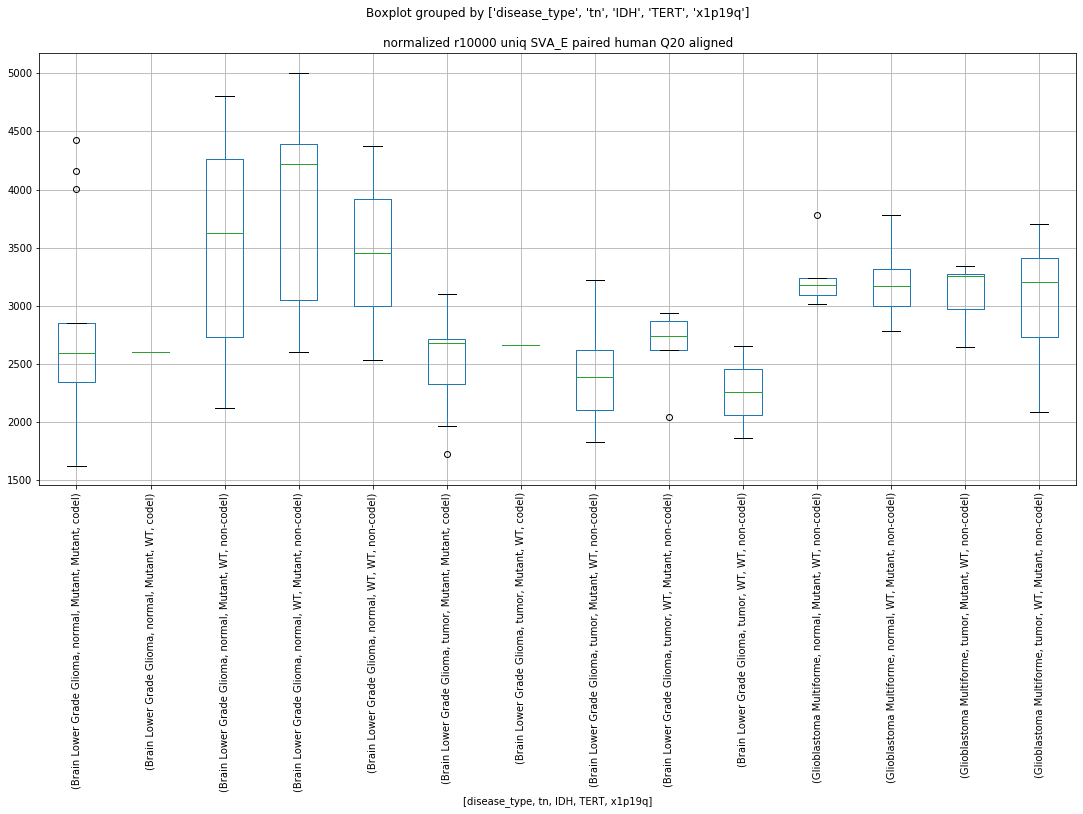

SVA_F:


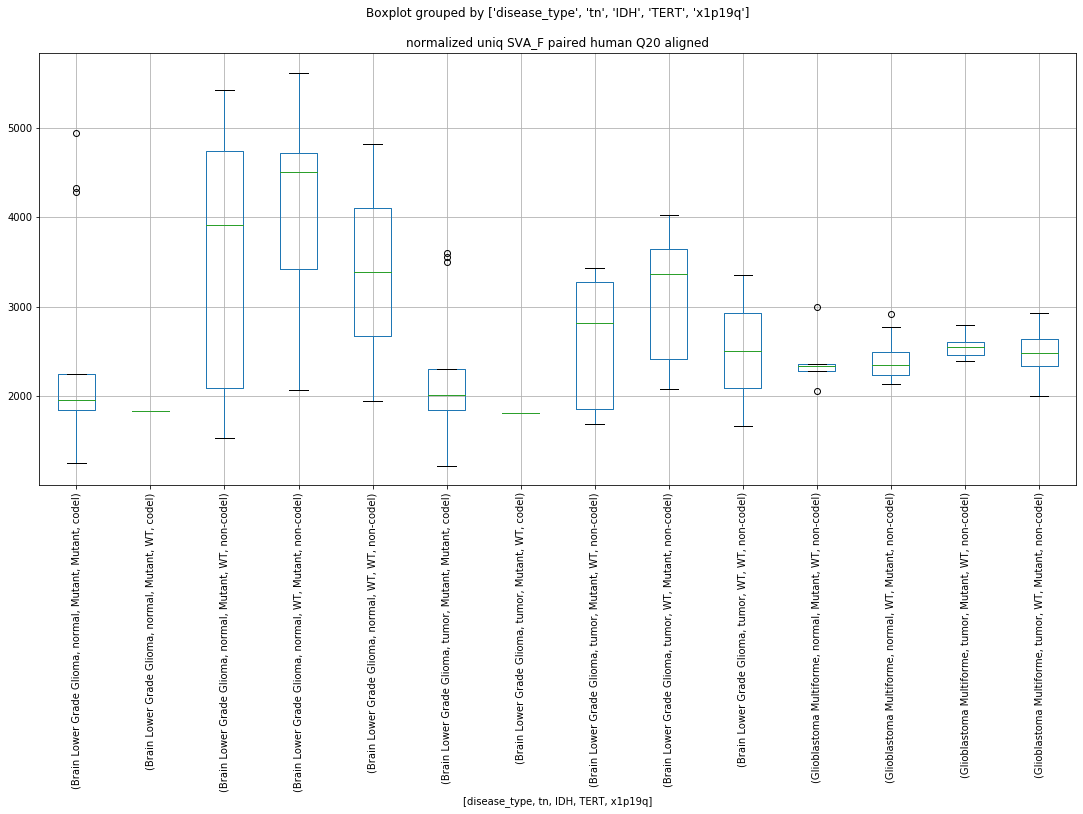

SVA_F:r10 


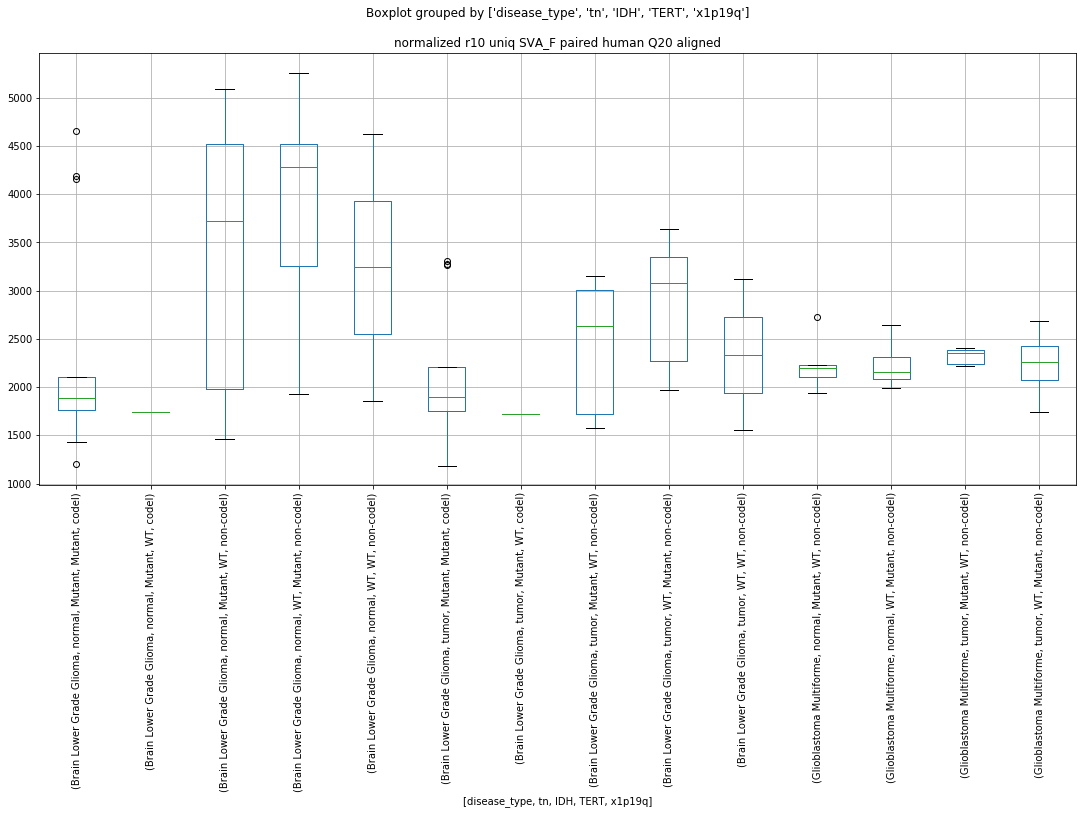

SVA_F:r100 


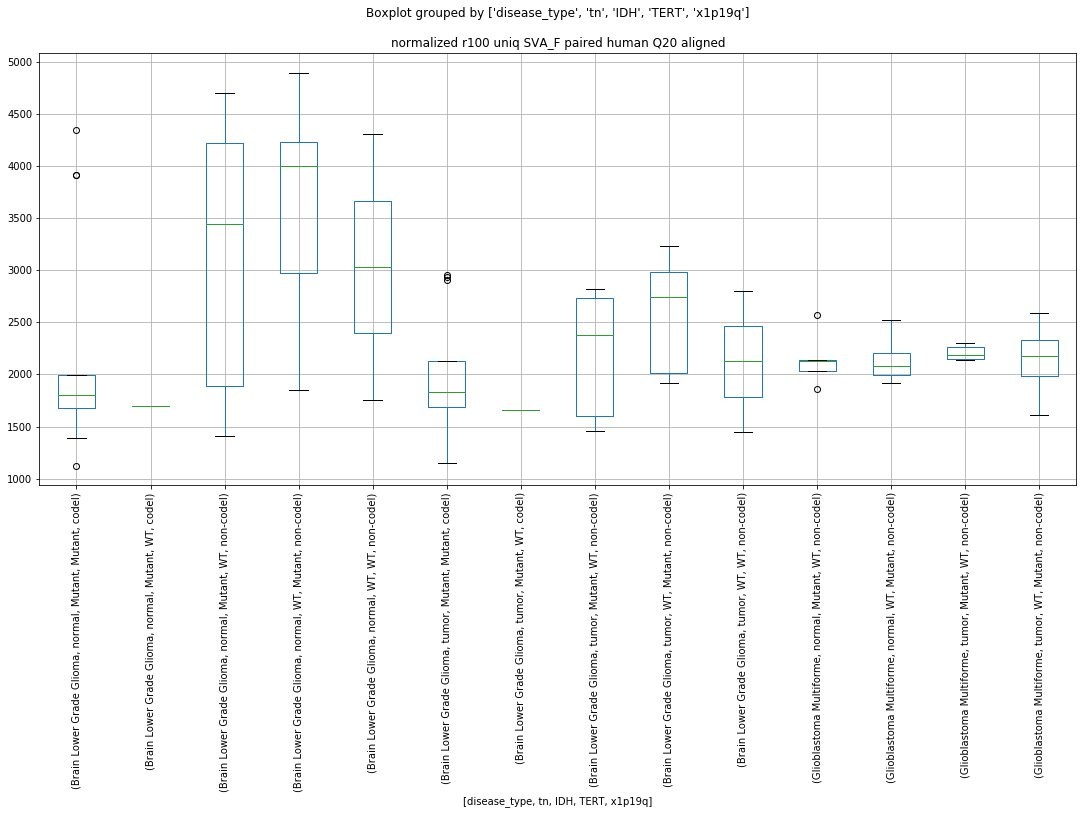

SVA_F:r1000 


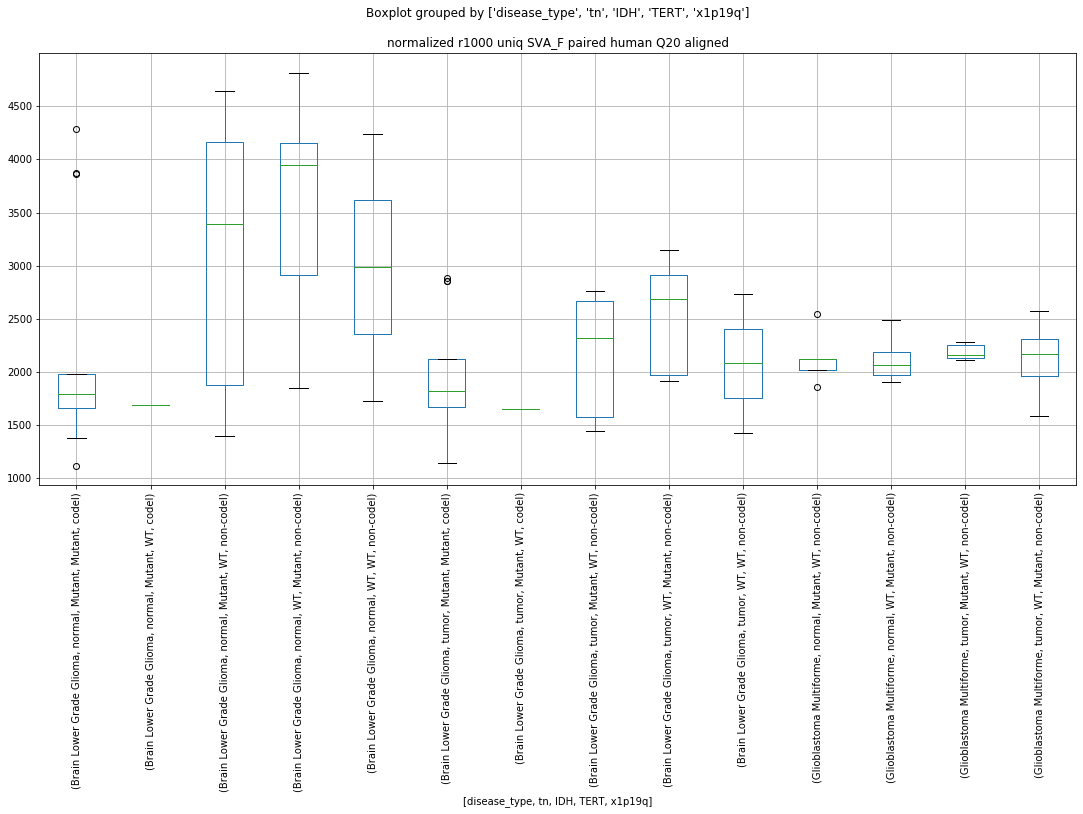

SVA_F:r10000 


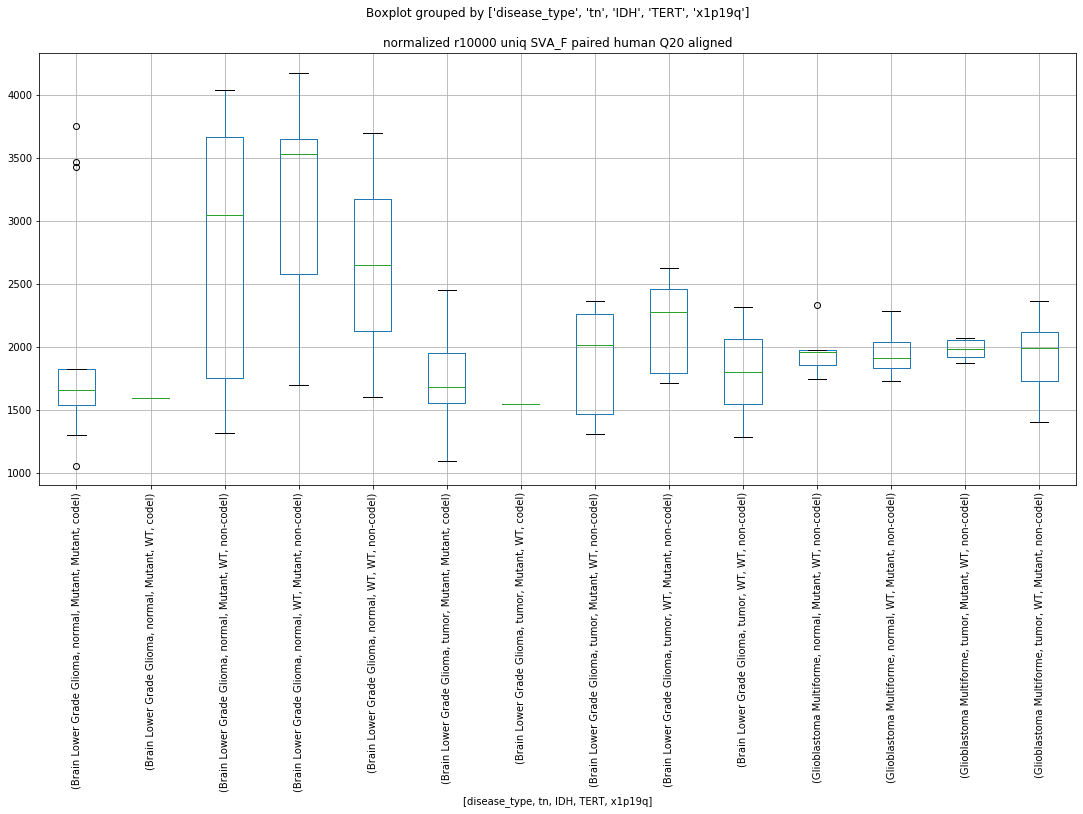

In [112]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+":"+s)
        df.boxplot(column=['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'],
                by=['disease_type','tn','IDH','TERT','x1p19q'])
        plt.xticks(rotation=90)
        plt.show()

In [113]:
import numpy as np
np.__version__

'1.19.5'

In [114]:
import scipy
scipy.__version__

'1.5.4'

In [115]:
from scipy import stats

In [116]:
## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)

In [117]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 7.146841714264776
p = 1.1745968796610812e-06


# Tumor/Normal T-Tests ( using ttest_rel )

In [118]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    print()
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+" : "+s)                
        t, p = stats.ttest_rel(
            tn['normalized '+s+'uniq '+hkle+' paired human Q20 aligned_normal'],
            tn['normalized '+s+'uniq '+hkle+' paired human Q20 aligned_tumor'])
        print("\tt = " + str(t))
        print("\tp = " + str(p))


HERVK113 : 
	t = 5.653401072736699
	p = 2.9659989852769803e-07
HERVK113 : r10 
	t = 5.774941667400011
	p = 1.8146425984052983e-07
HERVK113 : r100 
	t = 5.7901944916276875
	p = 1.7057308954586893e-07
HERVK113 : r1000 
	t = 5.802522288080196
	p = 1.6224397506564264e-07
HERVK113 : r10000 
	t = 5.951324519273615
	p = 8.843520754392477e-08

SVA_A : 
	t = 4.316221883168666
	p = 4.979373478301959e-05
SVA_A : r10 
	t = 5.127001833405771
	p = 2.3853880439302717e-06
SVA_A : r100 
	t = 5.375116059593493
	p = 9.01293403276945e-07
SVA_A : r1000 
	t = 5.405082035864607
	p = 8.003993626012958e-07
SVA_A : r10000 
	t = 5.7925585507900985
	p = 1.6894380059647313e-07

SVA_B : 
	t = 4.027569537268922
	p = 0.00013797286811241712
SVA_B : r10 
	t = 4.710845122584238
	p = 1.1689217170631217e-05
SVA_B : r100 
	t = 5.089318910993767
	p = 2.760999358940543e-06
SVA_B : r1000 
	t = 5.131425143827353
	p = 2.3447256185645057e-06
SVA_B : r10000 
	t = 5.579086113725797
	p = 3.998520572032217e-07

SVA_C : 
	t = 4.0053

In [119]:
#list(tn)

In [120]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    print()
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+" : "+s)                
        t, p = stats.ttest_rel(
            tn[tn['disease_type_tumor']=='Brain Lower Grade Glioma']['normalized '+s+'uniq '+hkle+' paired human Q20 aligned_normal'],
            tn[tn['disease_type_tumor']=='Brain Lower Grade Glioma']['normalized '+s+'uniq '+hkle+' paired human Q20 aligned_tumor'])
        print("\tt = " + str(t))
        print("\tp = " + str(p))


HERVK113 : 
	t = 6.634537762323416
	p = 7.710837742355449e-08
HERVK113 : r10 
	t = 6.679338557728861
	p = 6.699981529172835e-08
HERVK113 : r100 
	t = 6.6249037696624855
	p = 7.947512158442596e-08
HERVK113 : r1000 
	t = 6.635393270758173
	p = 7.690166498983354e-08
HERVK113 : r10000 
	t = 6.6876511660461935
	p = 6.527628005148321e-08

SVA_A : 
	t = 5.311860109489438
	p = 4.99378147193676e-06
SVA_A : r10 
	t = 5.806364817104772
	p = 1.0495539900473814e-06
SVA_A : r100 
	t = 5.942137678035428
	p = 6.834503815674807e-07
SVA_A : r1000 
	t = 5.948834782650981
	p = 6.691418852813388e-07
SVA_A : r10000 
	t = 6.214083416268158
	p = 2.8959489994729e-07

SVA_B : 
	t = 5.092818917787781
	p = 9.931435632946036e-06
SVA_B : r10 
	t = 5.478440820458946
	p = 2.9552397082109228e-06
SVA_B : r100 
	t = 5.699698118297852
	p = 1.4700760196209453e-06
SVA_B : r1000 
	t = 5.718018405405849
	p = 1.3874272818089425e-06
SVA_B : r10000 
	t = 5.992917034116838
	p = 5.821551504083637e-07

SVA_C : 
	t = 5.02336035413

In [121]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    print()
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+" : "+s)                
        t, p = stats.ttest_rel(
            tn[tn['disease_type_tumor']=='Glioblastoma Multiforme']['normalized '+s+'uniq '+hkle+' paired human Q20 aligned_normal'],
            tn[tn['disease_type_tumor']=='Glioblastoma Multiforme']['normalized '+s+'uniq '+hkle+' paired human Q20 aligned_tumor'])
        print("\tt = " + str(t))
        print("\tp = " + str(p))


HERVK113 : 
	t = 1.2623333055865729
	p = 0.21567727752633306
HERVK113 : r10 
	t = 1.5361670843973447
	p = 0.13403101886090005
HERVK113 : r100 
	t = 1.663079919261378
	p = 0.10576686247629398
HERVK113 : r1000 
	t = 1.6815902167924008
	p = 0.10208998044303905
HERVK113 : r10000 
	t = 1.9732073222422035
	p = 0.0568956033232183

SVA_A : 
	t = -0.06361976220138943
	p = 0.9496568081068407
SVA_A : r10 
	t = 1.1366235142477152
	p = 0.2638824283755997
SVA_A : r100 
	t = 1.483596946460043
	p = 0.14740492565069183
SVA_A : r1000 
	t = 1.535110539048829
	p = 0.13428980790840095
SVA_A : r10000 
	t = 1.974918766533408
	p = 0.05669240626907766

SVA_B : 
	t = -0.44575875351118877
	p = 0.6586824373518065
SVA_B : r10 
	t = 0.6638129456389464
	p = 0.511421475731096
SVA_B : r100 
	t = 1.1917141392040418
	p = 0.2418736142602284
SVA_B : r1000 
	t = 1.2573145179237826
	p = 0.21746555122276345
SVA_B : r10000 
	t = 1.8205939262819921
	p = 0.07774775686182772

SVA_C : 
	t = -0.3683140287701758
	p = 0.71499132267

1-   Total HERV/SVA load: We should examine the total load of HERV and SVA insertions together and separated by type (HERV-K, SVA-A,SVA-B, etc), in terms of clinical factors (subtype, age at Dx, etc), and survival (by subtype adjusted by age). We can just regress the total HERV/SVA load against the clinical variables and see if anything shows up.  
2-   Specific HERV/SVA locations: We will run into small numbers very quickly on this but its worth a shot. The primary question is- Are specific HERV/SVA insertions associated with glioma subtypes and/or poor outcomes?  
I think the simplest approach would be to take each location and run a simple statistical test by subtype compared to all other subtypes. For instance take a given insertion, say chr1:123,000, and test it in IDHmt against all other gliomas. We can iterate through all locations and subtypes. Then make a p-value cutoff that is reasonably strict to cull the majority of the data… and take a look!
Lets do all of these on the q30 data first to keep it simple. Lets also used the collapsed HERV/SVA locations to make sure we aren’t double counting, or making 2 locations where there is only one. I believe we did this at 1000bp groupings?

In [122]:
df.shape

(146, 126)

In [123]:
df['normalized uniq HERVK113 paired human Q20 aligned'].shape

(146,)

In [124]:
df[df['tn']=='normal'].shape

(73, 126)

In [125]:
df[df['tn']=='normal']['normalized uniq HERVK113 paired human Q20 aligned']

1      1011.558565
3      1085.932647
5       959.191222
7      1009.477302
9       820.432672
          ...     
239    1130.496931
241    2546.611280
243    2249.929839
245    2644.885015
247    2515.043637
Name: normalized uniq HERVK113 paired human Q20 aligned, Length: 73, dtype: float64

In [126]:
df[df['tn']=='normal']['normalized uniq HERVK113 paired human Q20 aligned'].shape

(73,)

In [127]:
df[df['tn']=='normal']['IDH'].value_counts()

Mutant    37
WT        35
Name: IDH, dtype: int64

In [128]:
df[((df['tn']=='normal') & (df['IDH']=='Mutant'))].shape

(37, 126)

# Mutant comparison

In [129]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    print()
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+" : "+s)                
        t, p = stats.ttest_ind(
            df[((df['tn']=='normal') & (df['IDH']=='Mutant'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'],
            df[((df['tn']=='normal') & (df['IDH']=='WT'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'])
        print("\tt = " + str(t))
        print("\tp = " + str(p))


HERVK113 : 
	t = 2.7030101666888893
	p = 0.008617013391386768
HERVK113 : r10 
	t = 2.6800444833386154
	p = 0.00917066630816398
HERVK113 : r100 
	t = 2.6577814717512744
	p = 0.009738148900110731
HERVK113 : r1000 
	t = 2.666521823468116
	p = 0.009511650700555692
HERVK113 : r10000 
	t = 2.6908125647399435
	p = 0.008907152642071111

SVA_A : 
	t = -0.4147615711119107
	p = 0.6795848543739996
SVA_A : r10 
	t = 0.18930772581590788
	p = 0.8503994760026425
SVA_A : r100 
	t = 0.2351105307881789
	p = 0.8148093743981976
SVA_A : r1000 
	t = 0.21738257830864957
	p = 0.8285425916615353
SVA_A : r10000 
	t = 0.19951448558945137
	p = 0.8424387460232582

SVA_B : 
	t = -0.24072673112121823
	p = 0.8104705819808008
SVA_B : r10 
	t = 0.26074150752562253
	p = 0.7950573893087405
SVA_B : r100 
	t = 0.2595310246230616
	p = 0.7959873196771137
SVA_B : r1000 
	t = 0.24549940215920193
	p = 0.8067881218369022
SVA_B : r10000 
	t = 0.16655073780412258
	p = 0.8682037143563

SVA_C : 
	t = -0.568696134635768
	p = 0.571382

In [130]:
df[df['tn']=='normal']['TERT'].value_counts()

Mutant    47
WT        26
Name: TERT, dtype: int64

# TERT Comparison

In [131]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    print()
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+" : "+s)                
        t, p = stats.ttest_ind(
            df[((df['tn']=='normal') & (df['TERT']=='Mutant'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'],
            df[((df['tn']=='normal') & (df['TERT']=='WT'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'])
        print("\tt = " + str(t))
        print("\tp = " + str(p))


HERVK113 : 
	t = -3.444984477001812
	p = 0.0009625145743297955
HERVK113 : r10 
	t = -3.414087756891313
	p = 0.0010611209369415719
HERVK113 : r100 
	t = -3.4145190464415456
	p = 0.001059681061378211
HERVK113 : r1000 
	t = -3.4141012533235737
	p = 0.0010610758506217396
HERVK113 : r10000 
	t = -3.398517562294372
	p = 0.0011143576494202013

SVA_A : 
	t = -1.8048919529221916
	p = 0.07533182477287131
SVA_A : r10 
	t = -2.163944297611353
	p = 0.03383432116548339
SVA_A : r100 
	t = -2.203331603814094
	p = 0.03081701798904044
SVA_A : r1000 
	t = -2.191039225656358
	p = 0.03173232952250497
SVA_A : r10000 
	t = -2.1750930977985217
	p = 0.032955118662397295

SVA_B : 
	t = -1.8534924653844456
	p = 0.06796658930941626
SVA_B : r10 
	t = -2.168447693218236
	p = 0.033476743953704154
SVA_B : r100 
	t = -2.1853152975353907
	p = 0.03216660662363909
SVA_B : r1000 
	t = -2.181720711005268
	p = 0.0324419806482509
SVA_B : r10000 
	t = -2.143471138954349
	p = 0.03550228288707302

SVA_C : 
	t = -1.678709752131

In [132]:
df[df['tn']=='normal']['x1p19q'].value_counts()

non-codel    59
codel        14
Name: x1p19q, dtype: int64

# 1p19q Comparison

In [133]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    print()
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+" : "+s)                
        t, p = stats.ttest_ind(
            df[((df['tn']=='normal') & (df['x1p19q']=='non-codel'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'],
            df[((df['tn']=='normal') & (df['x1p19q']=='codel'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'])
        print("\tt = " + str(t))
        print("\tp = " + str(p))


HERVK113 : 
	t = 0.2406846030827947
	p = 0.8104932159395049
HERVK113 : r10 
	t = 0.23256389278116074
	p = 0.816769160547956
HERVK113 : r100 
	t = 0.25430243877436415
	p = 0.7999969853905244
HERVK113 : r1000 
	t = 0.24358733387081338
	p = 0.8082528847314994
HERVK113 : r10000 
	t = 0.21074563956775758
	p = 0.8336894370184238

SVA_A : 
	t = 2.882412976398409
	p = 0.005217556837711459
SVA_A : r10 
	t = 2.336351634271272
	p = 0.022300241942078455
SVA_A : r100 
	t = 2.3001770564204147
	p = 0.02438040775335779
SVA_A : r1000 
	t = 2.3090450321836276
	p = 0.02385516898398872
SVA_A : r10000 
	t = 2.3246390443325775
	p = 0.022955825716841814

SVA_B : 
	t = 2.707975258146732
	p = 0.008475814570057114
SVA_B : r10 
	t = 2.2861265066040395
	p = 0.02523357086015127
SVA_B : r100 
	t = 2.276704472573785
	p = 0.02582036648650021
SVA_B : r1000 
	t = 2.2883613040001225
	p = 0.02509613111189064
SVA_B : r10000 
	t = 2.351053015598071
	p = 0.021500929370679236

SVA_C : 
	t = 3.0030460757551554
	p = 0.0036890

In [134]:
df[df['tn']=='normal']['disease_type'].value_counts()

Brain Lower Grade Glioma    39
Glioblastoma Multiforme     34
Name: disease_type, dtype: int64

# Disease Type Comparison

In [135]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    print()
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+" : "+s)                
        t, p = stats.ttest_ind(
            df[((df['tn']=='normal') & (df['disease_type']=='Brain Lower Grade Glioma'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'],
            df[((df['tn']=='normal') & (df['disease_type']=='Glioblastoma Multiforme'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'])
        print("\tt = " + str(t))
        print("\tp = " + str(p))


HERVK113 : 
	t = 6.0757298684229415
	p = 5.5242447381818576e-08
HERVK113 : r10 
	t = 6.042011687442645
	p = 6.34215193012243e-08
HERVK113 : r100 
	t = 5.993400982929977
	p = 7.736126051846232e-08
HERVK113 : r1000 
	t = 5.992997322524115
	p = 7.748885566217526e-08
HERVK113 : r10000 
	t = 6.004915309767724
	p = 7.380782308063076e-08

SVA_A : 
	t = 0.9396832319147491
	p = 0.35056604672924674
SVA_A : r10 
	t = 1.8379878789451338
	p = 0.07024764661772089
SVA_A : r100 
	t = 1.8858384772999914
	p = 0.06340764008336505
SVA_A : r1000 
	t = 1.86331276742403
	p = 0.06655423880415591
SVA_A : r10000 
	t = 1.7418296793791457
	p = 0.08586898424652692

SVA_B : 
	t = 1.168262793842052
	p = 0.246608696466509
SVA_B : r10 
	t = 1.9047102039374129
	p = 0.06086898096323071
SVA_B : r100 
	t = 1.860696446040743
	p = 0.06692808340513473
SVA_B : r1000 
	t = 1.8213556465154266
	p = 0.07276556824777809
SVA_B : r10000 
	t = 1.6198550469175397
	p = 0.10969701197115522

SVA_C : 
	t = 0.6841113052619533
	p = 0.49613

In [136]:
df[df['tn']=='normal']['gender_mt'].value_counts()

male      41
female    32
Name: gender_mt, dtype: int64

# Gender comparison

In [137]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    print()
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+" : "+s)                
        t, p = stats.ttest_ind(
            df[((df['tn']=='normal') & (df['gender_mt']=='male'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'],
            df[((df['tn']=='normal') & (df['gender_mt']=='female'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'])
        print("\tt = " + str(t))
        print("\tp = " + str(p))


HERVK113 : 
	t = -1.5822867120839754
	p = 0.11802887944015926
HERVK113 : r10 
	t = -1.6099305322542081
	p = 0.11185053087332386
HERVK113 : r100 
	t = -1.6015163626346964
	p = 0.11370288316446812
HERVK113 : r1000 
	t = -1.591851901841173
	p = 0.11586084023348693
HERVK113 : r10000 
	t = -1.6076592740817084
	p = 0.11234812948316597

SVA_A : 
	t = -1.1728179046943052
	p = 0.24478871752740422
SVA_A : r10 
	t = -1.317729904819601
	p = 0.19183026015717597
SVA_A : r100 
	t = -1.3430501106397805
	p = 0.18353336145830024
SVA_A : r1000 
	t = -1.336291821336853
	p = 0.18572088936650272
SVA_A : r10000 
	t = -1.191049213883616
	p = 0.23760087608086422

SVA_B : 
	t = -1.2881037825737027
	p = 0.20189208446971768
SVA_B : r10 
	t = -1.4122632897929026
	p = 0.16224065914549515
SVA_B : r100 
	t = -1.3805529186032905
	p = 0.17174734628093324
SVA_B : r1000 
	t = -1.3615453211591246
	p = 0.1776465252508894
SVA_B : r10000 
	t = -1.210514476295975
	p = 0.23009595839692845

SVA_C : 
	t = -1.1325570548791013
	p